In [1]:
import pandas as pd
import numpy as np
import math
import pickle
import collections

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

import platform
from os import listdir
from os.path import isfile, join
from glob import glob
from pathlib import Path
import sys
import os
import copy
import traceback
from pathlib import Path


import matplotlib.pyplot as plt

import SMOTE
import feature_selector
import DE
import CFS
import birch
import metrics.abcd
import birch_bellwether

import metrices
import measures

import sys
import traceback
import warnings
warnings.filterwarnings("ignore")

In [2]:
def cluster_driver(df,print_tree = False):
    X = df.apply(pd.to_numeric)
    cluster = birch.birch(branching_factor=20)
        #X.set_index('Project Name',inplace=True)
    cluster.fit(X)
    cluster_tree,max_depth = cluster.get_cluster_tree()
        #cluster_tree = cluster.model_adder(cluster_tree)
    if print_tree:
        cluster.show_clutser_tree()
    return cluster,cluster_tree,max_depth

def build_BIRCH(attr_df):
    cluster,cluster_tree,_ = cluster_driver(attr_df)
    return cluster,cluster_tree

In [3]:
#get cluster wise data for summarzation using median
def find_bellwether(data_source1,data_source2,other_projects,path,fold):
    df_train = pd.read_pickle(data_source1 + '/train_data.pkl')
    cluster,cluster_tree = build_BIRCH(df_train)
    for _ in range(1):
        df = pd.read_csv(data_source1 + '/bellwether_cdom_0.csv')
        _cluster = {}
        for j in range(df.shape[0]):
            cluster_id = df.iloc[j,0]
            _bellwether = [df.iloc[j,7]]
            _cluster[cluster_id] = [_bellwether,list(df_train.iloc[cluster_tree[0].data_points].index)]
        bell = birch_bellwether.bellwether(path,df)
        for _bell_cluster in _cluster:
            #print(_cluster[_bell_cluster][0],_cluster[_bell_cluster][1])
            final_score = bell.bellwether(_cluster[_bell_cluster][0],_cluster[_bell_cluster][1])
            _results = {}
            goals = ['f1','g','recall','precision','pf']
            for goal in goals:
                for s_project in final_score.keys():
                    if s_project not in _results.keys():
                        _results[s_project] = {}
                    for d_projects in final_score[s_project].keys():
                        if goal == 'g':
                            _goal = 'g-score'
                        else:
                            _goal = goal
                        _results[s_project][d_projects] = np.median(final_score[s_project][d_projects][_goal])
                data_path = data_source2 + '/' + str(0)
                if not Path(data_path).is_dir():
                    os.makedirs(Path(data_path))
                _df_results = pd.DataFrame.from_dict(_results, orient='index')
                _df_results = _df_results.to_csv(data_path +'/bellwether_' + goal +'.csv')
                _df_results = pd.read_csv(data_path +'/bellwether_' + goal +'.csv')
        

0
superwaba.csv
1 82
plt


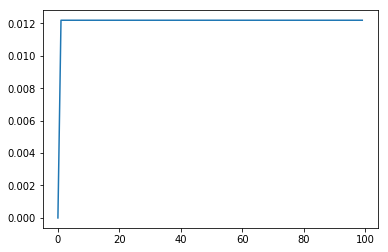

1 51
2 51
3 51
4 51
5 51
6 51
7 51
8 51
9 51
10 51
11 51
12 51
13 51
14 51
15 51
16 51
17 51
18 51
19 51
20 51
21 51
22 51
23 51
24 51
25 51
26 51
27 51
28 51
29 51
30 51
31 51
32 51
33 51
34 51
35 51
36 51
37 51
38 51
39 51
40 51
41 51
42 51
43 51
44 51
45 51
46 51
plt


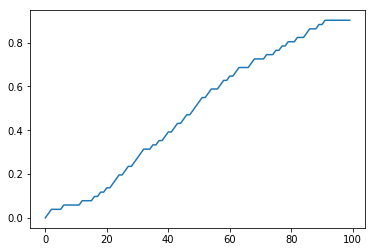

1 202
2 202
3 202
plt


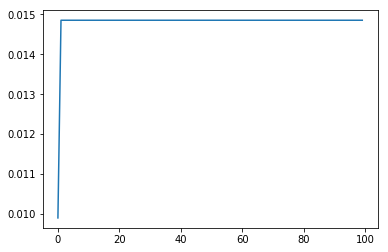

1 179
2 179
plt


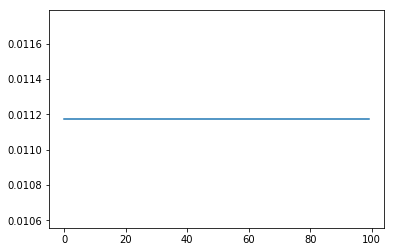

1 197
2 197
3 197
4 197
5 197
6 197
7 197
8 197
9 197
10 197
11 197
12 197
13 197
14 197
15 197
plt


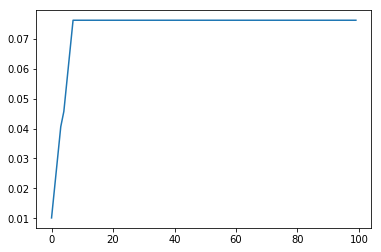

1 299
2 299
3 299
4 299
5 299
6 299
7 299
8 299
9 299
10 299
11 299
12 299
13 299
14 299
15 299
16 299
17 299
18 299
19 299
20 299
21 299
22 299
23 299
24 299
25 299
26 299
27 299
28 299
29 299
30 299
31 299
32 299
33 299
34 299
35 299
36 299
37 299
38 299
39 299
40 299
41 299
42 299
43 299
44 299
45 299
46 299
47 299
48 299
49 299
50 299
51 299
52 299
53 299
54 299
55 299
56 299
57 299
58 299
59 299
60 299
61 299
62 299
63 299
64 299
65 299
66 299
67 299
68 299
69 299
70 299
71 299
72 299
73 299
74 299
75 299
76 299
77 299
78 299
79 299
80 299
81 299
82 299
83 299
84 299
85 299
86 299
87 299
88 299
89 299
90 299
91 299
92 299
93 299
94 299
95 299
96 299
97 299
98 299
99 299
100 299
101 299
102 299
103 299
104 299
105 299
106 299
107 299
108 299
109 299
110 299
111 299
112 299
113 299
114 299
115 299
116 299
117 299
118 299
119 299
120 299
121 299
122 299
123 299
124 299
125 299
126 299
127 299
128 299
129 299
130 299
131 299
132 299
133 299
134 299
135 299
136 299
137 299
138 299
139 

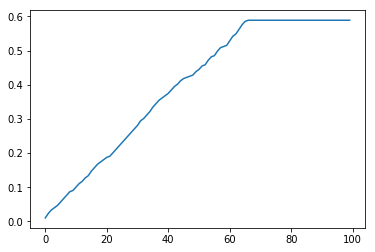

1 130
plt


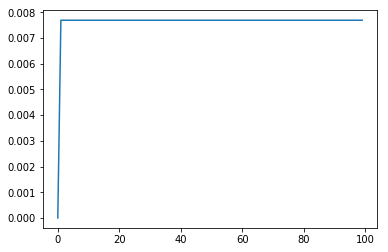

1 196
plt


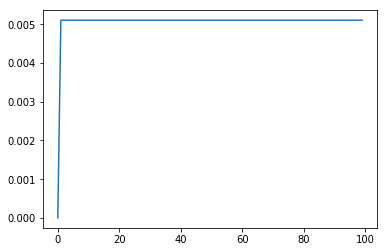

1 73
2 73
3 73
4 73
5 73
plt


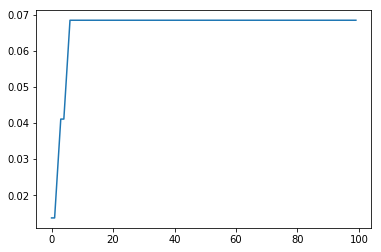

1 174
2 174
plt


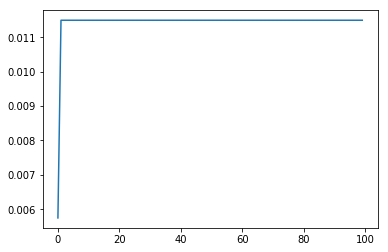

1 174
plt


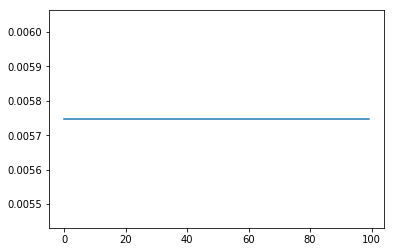

1 56
2 56
3 56
4 56
plt


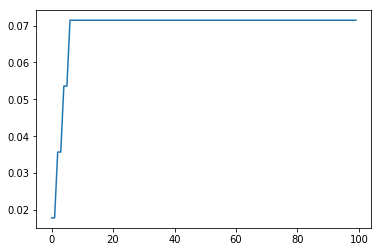

1 49
plt


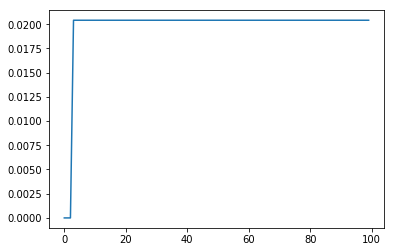

1 120
2 120
3 120
4 120
5 120
6 120
7 120
8 120
9 120
10 120
11 120
12 120
13 120
14 120
15 120
16 120
17 120
18 120
19 120
20 120
plt


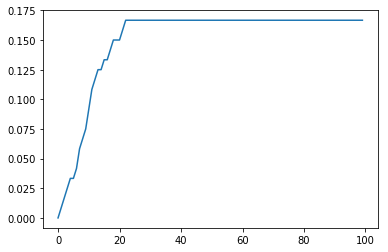

1 220
2 220
3 220
plt


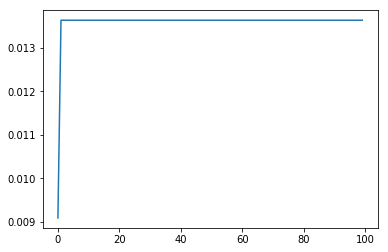

1 62
2 62
3 62
4 62
5 62
6 62
7 62
8 62
9 62
10 62
11 62
12 62
13 62
14 62
15 62
16 62
17 62
18 62
19 62
20 62
21 62
22 62
23 62
plt


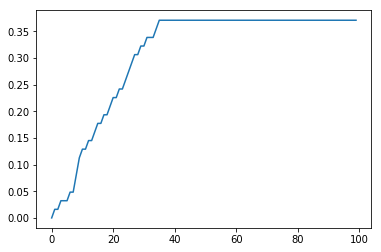

1 2231
2 2231
plt


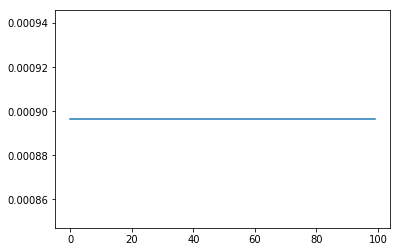

1 67
plt


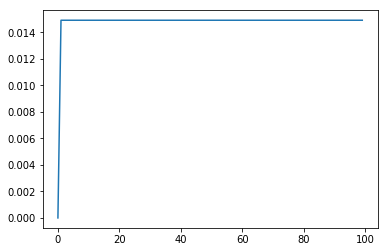

1 203
plt


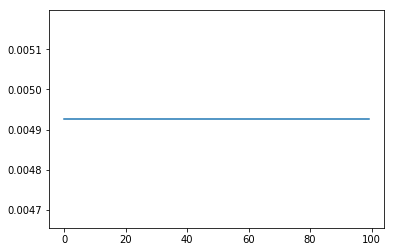

1 465
2 465
plt


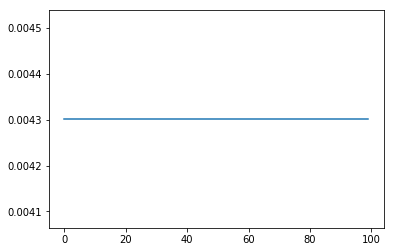

1 991
2 991
plt


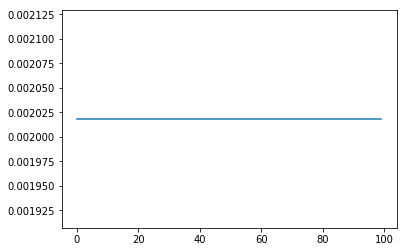

1 43
2 43
plt


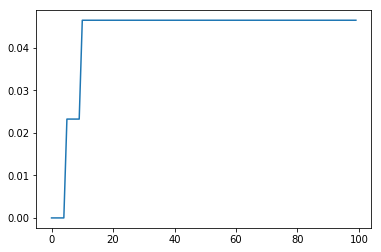

1 109
2 109
plt


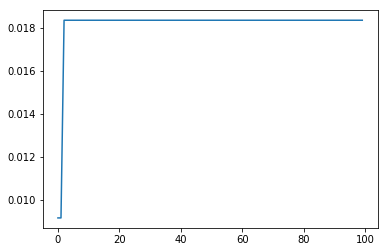

1 82
plt


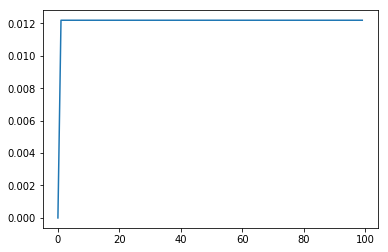

1 42
2 42
3 42
4 42
5 42
6 42
plt


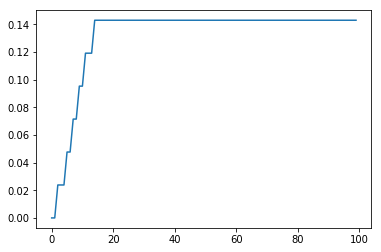

1 41
plt


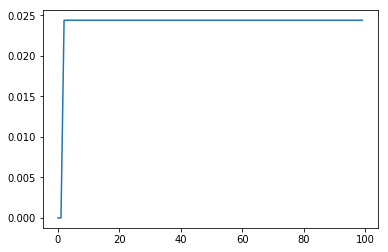

1 66
plt


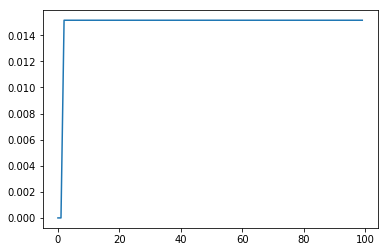

1 73
2 73
3 73
4 73
plt


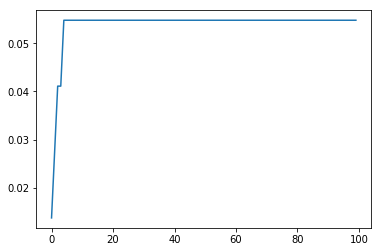

1 447
plt


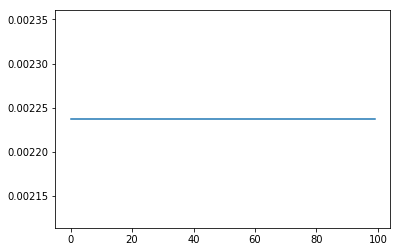

1 23
plt


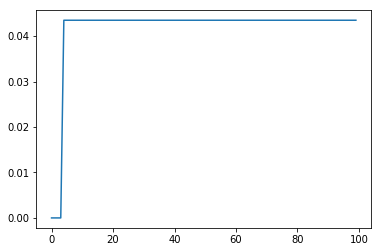

1 72
2 72
plt


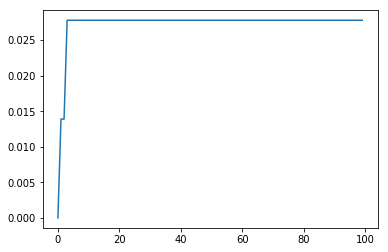

1 59
2 59
3 59
4 59
5 59
6 59
7 59
plt


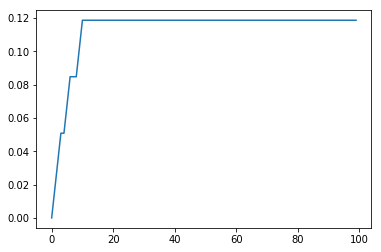

1 217
2 217
plt


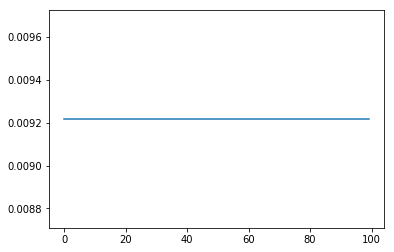

1 31
plt


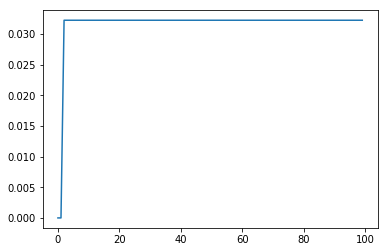

1 115
2 115
3 115
4 115
5 115
6 115
7 115
8 115
9 115
10 115
11 115
12 115
13 115
14 115
15 115
16 115
plt


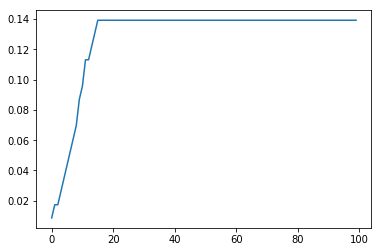

1 178
2 178
plt


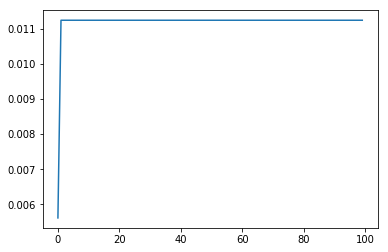

1 68
2 68
plt


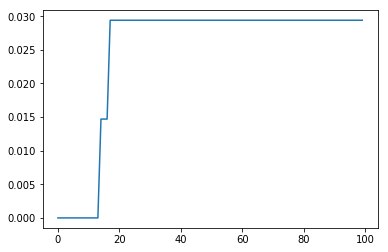

1 58
2 58
3 58
4 58
5 58
6 58
7 58
8 58
9 58
10 58
11 58
12 58
13 58
14 58
15 58
16 58
17 58
18 58
19 58
20 58
21 58
22 58
23 58
24 58
25 58
plt


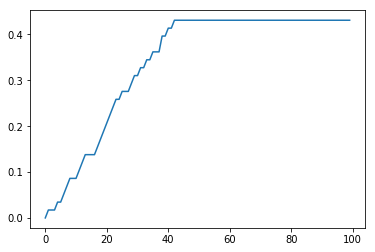

1 90
plt


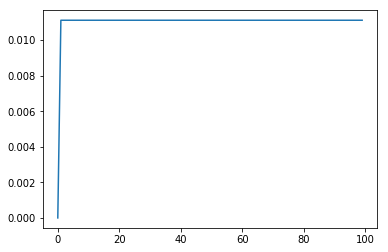

1 70
plt


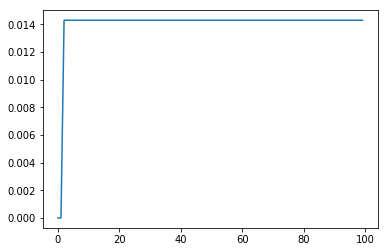

1 221
plt


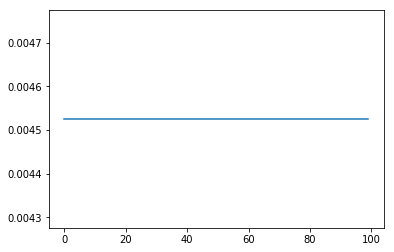

1 43
2 43
3 43
4 43
5 43
6 43
plt


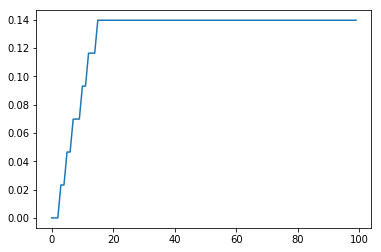

1 35
plt


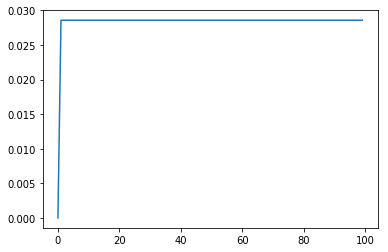

1 32
2 32
plt


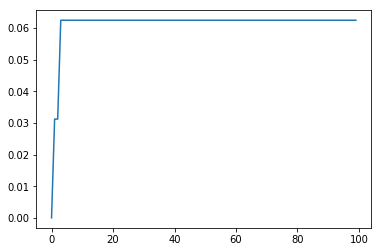

1 34
2 34
3 34
4 34
5 34
6 34
7 34
8 34
9 34
10 34
11 34
12 34
13 34
14 34
15 34
16 34
17 34
18 34
19 34
plt


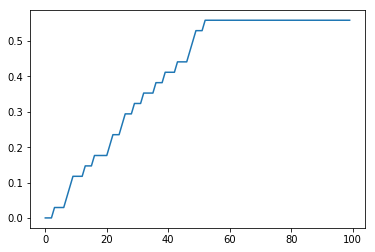

1 104
plt


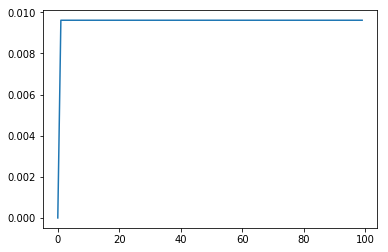

1 56
plt


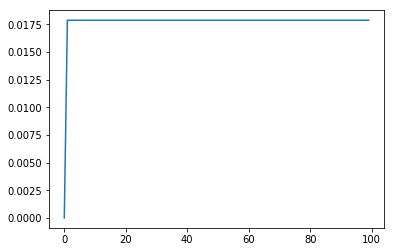

1 56
plt


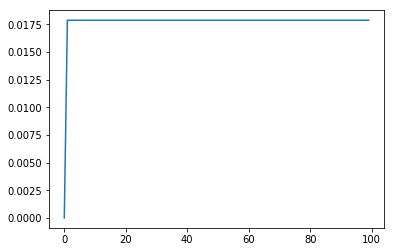

1 23
plt


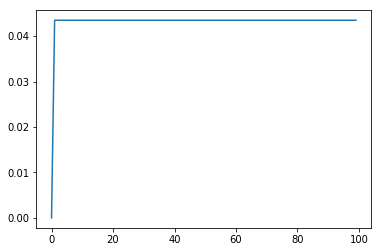

1 75
2 75
plt


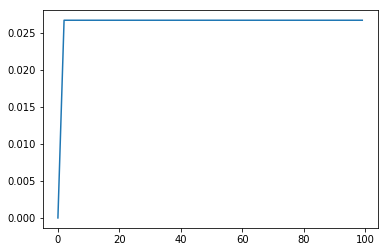

1 177
plt


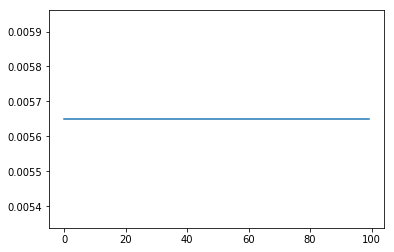

1 142
2 142
plt


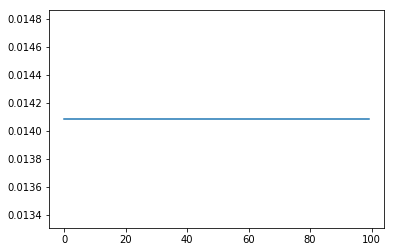

1 311
plt


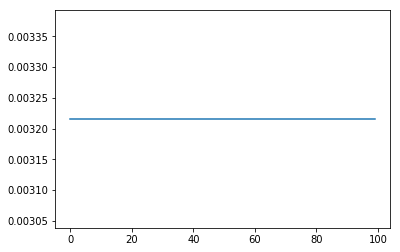

1 72
2 72
plt


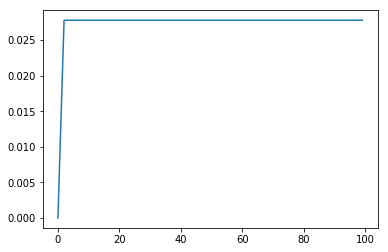

1 71
2 71
3 71
plt


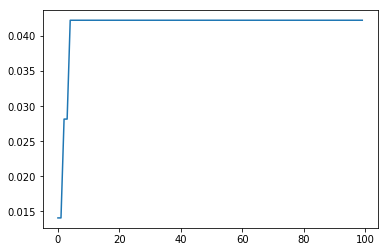

1 5
plt


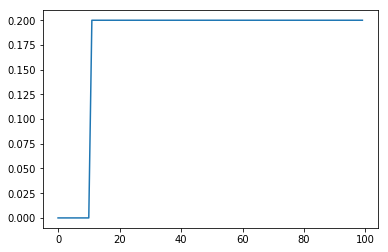

1 57
2 57
3 57
4 57
5 57
6 57
7 57
8 57
plt


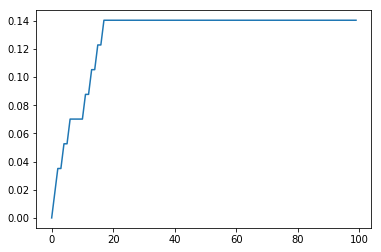

1 97
plt


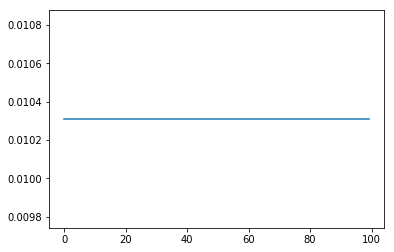

1 42
plt


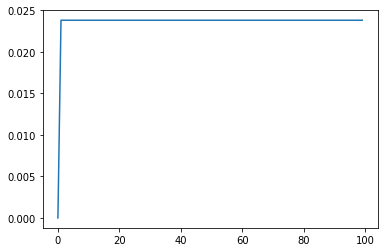

1 73
2 73
3 73
4 73
5 73
6 73
7 73
8 73
plt


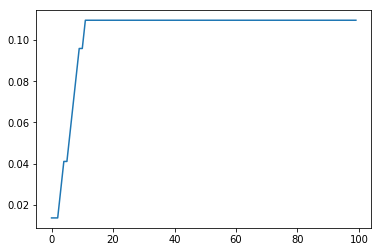

1 75
2 75
plt


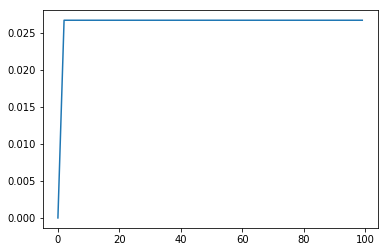

1 66
2 66
plt


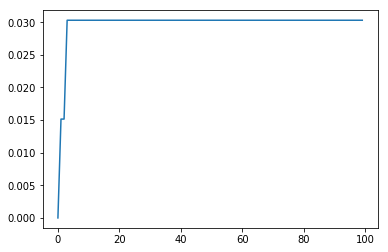

1 377
2 377
3 377
4 377
5 377
6 377
7 377
8 377
9 377
10 377
plt


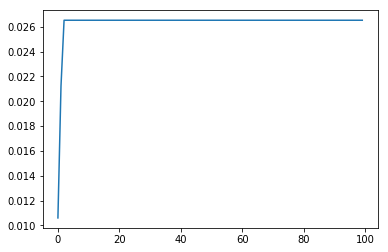

1 46
2 46
plt


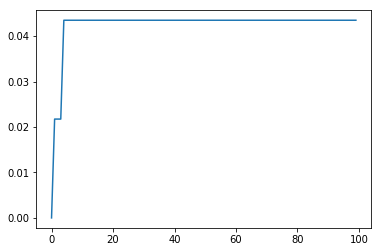

1 44
plt


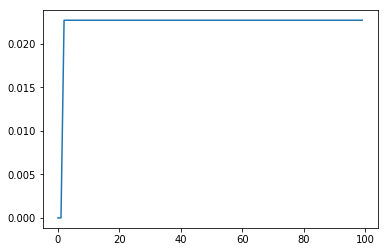

1 48
2 48
3 48
4 48
5 48
6 48
7 48
8 48
9 48
10 48
11 48
plt


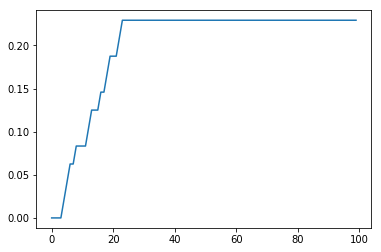

1 146
plt


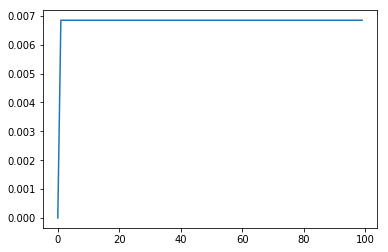

1 55
plt


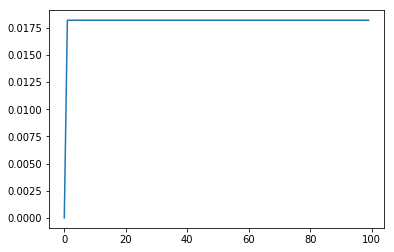

1 86
2 86
3 86
4 86
5 86
plt


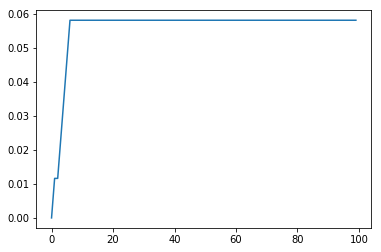

1 46
2 46
3 46
plt


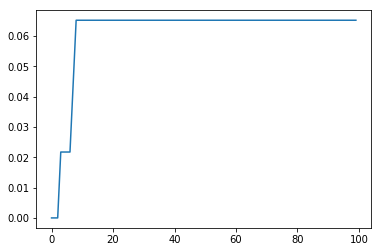

1 23
plt


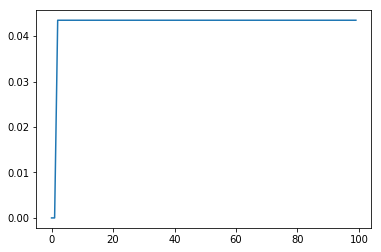

1 29
2 29
3 29
4 29
5 29
6 29
7 29
8 29
9 29
10 29
11 29
12 29
13 29
14 29
15 29
16 29
17 29
18 29
plt


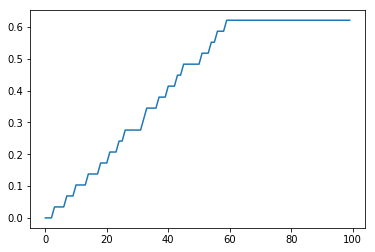

1 62
2 62
3 62
4 62
5 62
6 62
7 62
8 62
9 62
plt


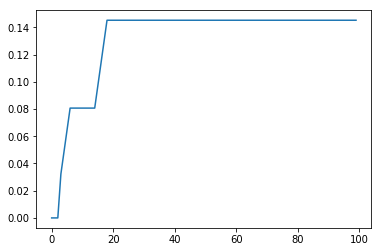

1 42
plt


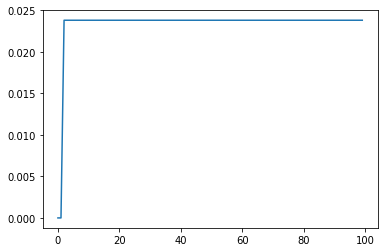

1 32
plt


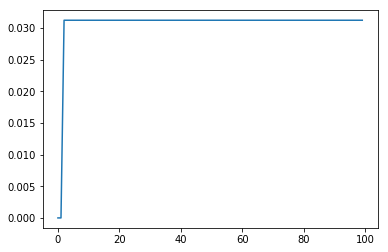

1 227
2 227
3 227
plt


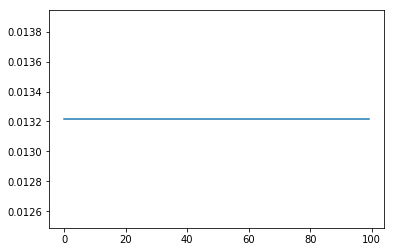

1 66
plt


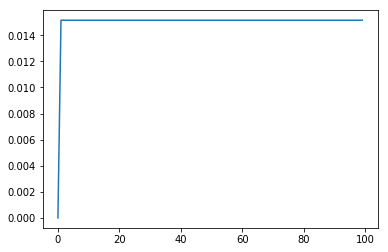

1 64
plt


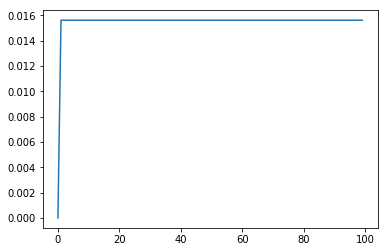

1 75
2 75
3 75
4 75
5 75
6 75
7 75
8 75
9 75
10 75
11 75
12 75
13 75
14 75
15 75
16 75
17 75
18 75
19 75
20 75
21 75
22 75
23 75
24 75
25 75
26 75
27 75
28 75
29 75
30 75
31 75
32 75
33 75
34 75
35 75
36 75
37 75
38 75
39 75
40 75
plt


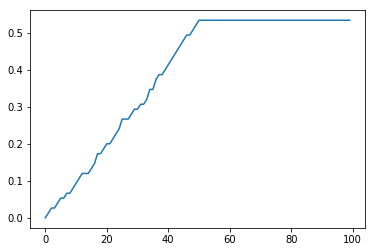

1 47
2 47
3 47
plt


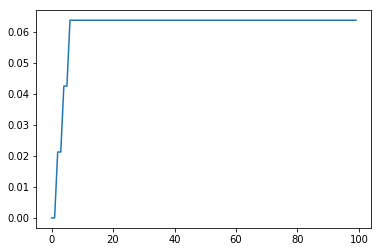

1 61
plt


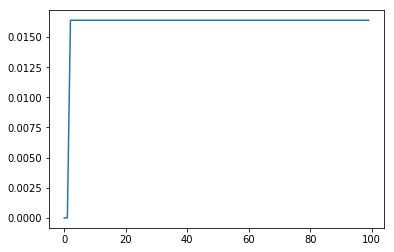

1 97
plt


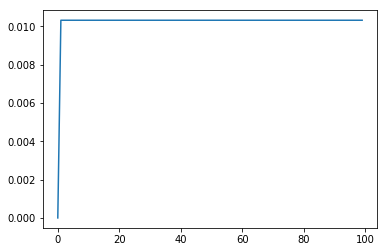

1 64
2 64
3 64
4 64
5 64
6 64
7 64
8 64
9 64
10 64
11 64
12 64
13 64
14 64
15 64
16 64
17 64
18 64
plt


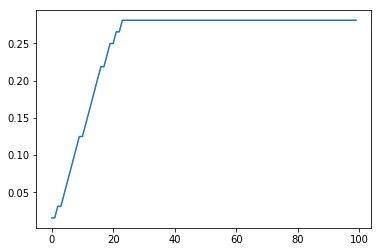

1 41
plt


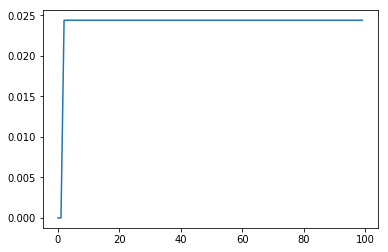

1 85
2 85
3 85
4 85
5 85
6 85
plt


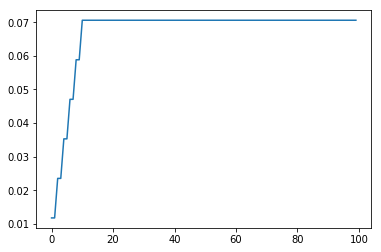

1 43
2 43
3 43
plt


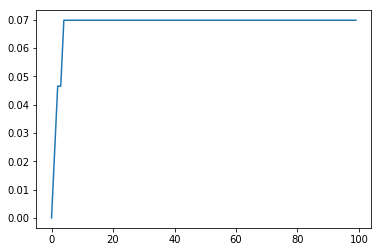

1 60
plt


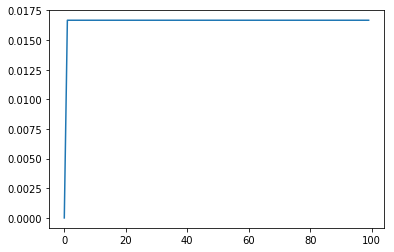

1 363
2 363
3 363
4 363
5 363
6 363
7 363
8 363
9 363
10 363
11 363
12 363
13 363
14 363
15 363
16 363
17 363
18 363
19 363
20 363
21 363
22 363
23 363
24 363
25 363
26 363
27 363
28 363
29 363
30 363
31 363
32 363
plt


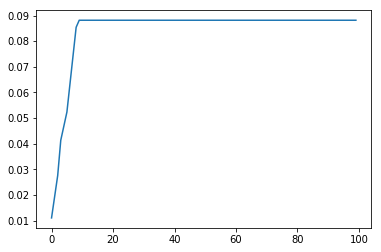

1 17
plt


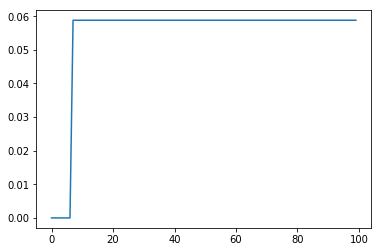

1 159
2 159
3 159
plt


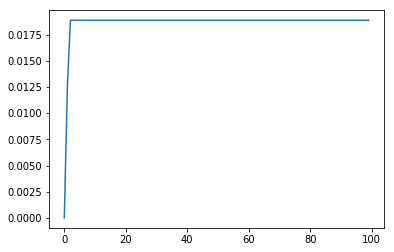

1 95
plt


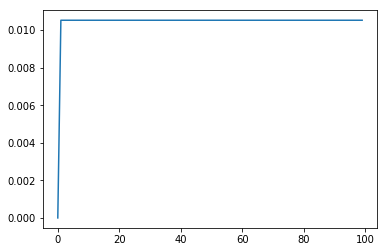

1 364
2 364
3 364
4 364
5 364
6 364
7 364
8 364
9 364
10 364
11 364
12 364
13 364
14 364
15 364
16 364
17 364
18 364
19 364
20 364
21 364
22 364
23 364
24 364
25 364
26 364
27 364
plt


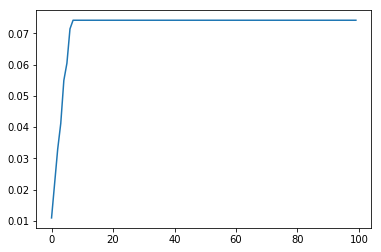

1 83
plt


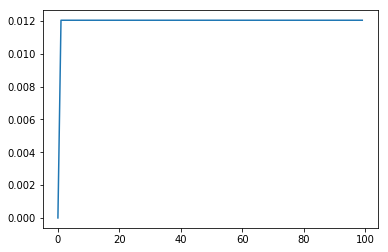

1 54
2 54
3 54
plt


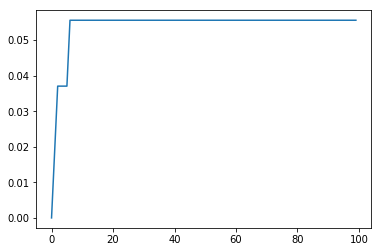

1 36
plt


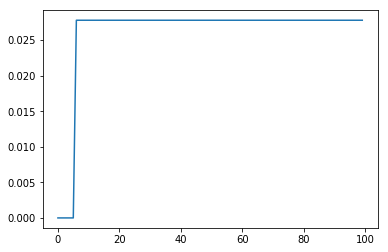

1 58
plt


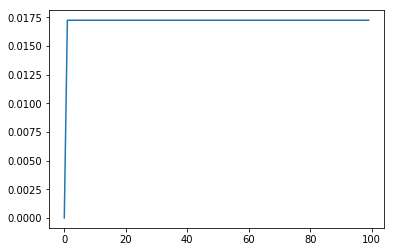

1 359
2 359
3 359
4 359
5 359
6 359
7 359
8 359
9 359
10 359
11 359
12 359
13 359
14 359
15 359
16 359
17 359
18 359
19 359
20 359
21 359
22 359
23 359
24 359
25 359
26 359
27 359
28 359
29 359
30 359
31 359
32 359
plt


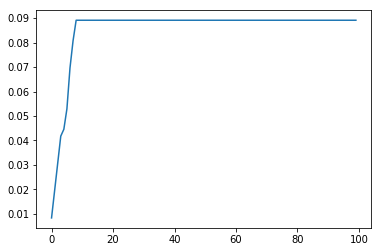

1 42
plt


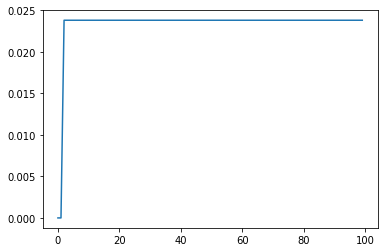

1 43
2 43
plt


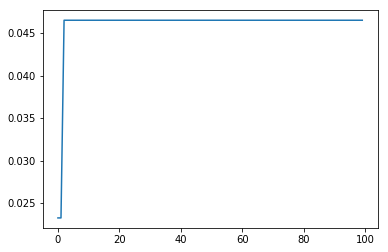

1 141
plt


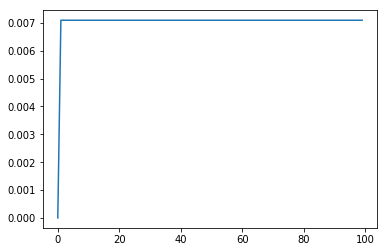

1 138
plt


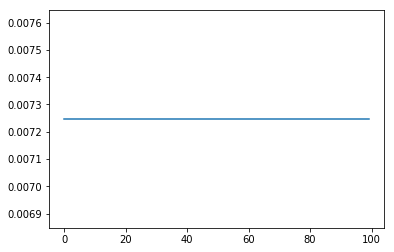

1 69
2 69
3 69
4 69
5 69
plt


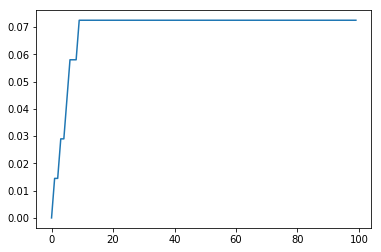

1 21
2 21
plt


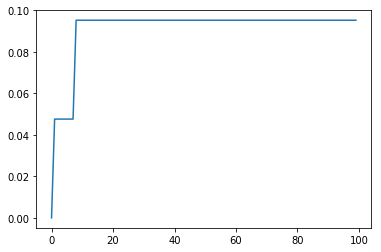

1 230
plt


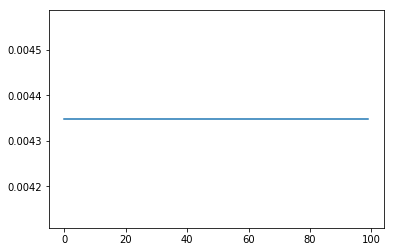

1 50
plt


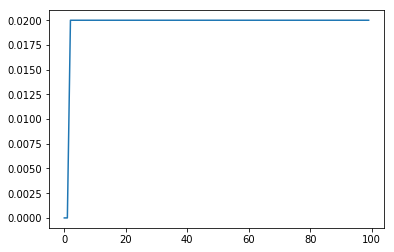

1 45
plt


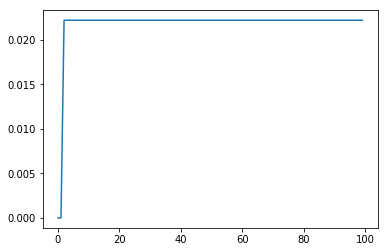

1 34
2 34
plt


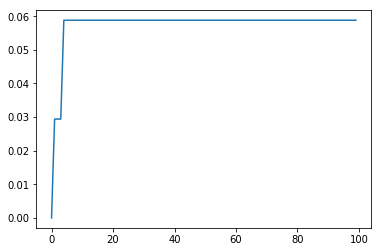

1 87
plt


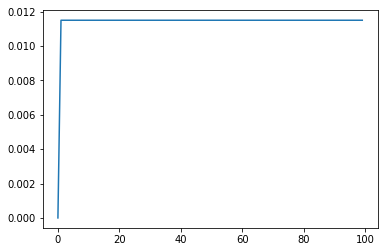

1 120
2 120
3 120
plt


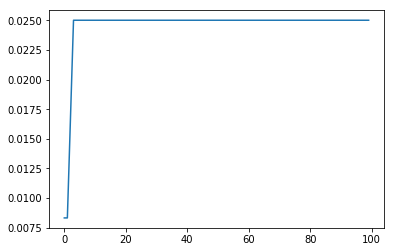

1 79
plt


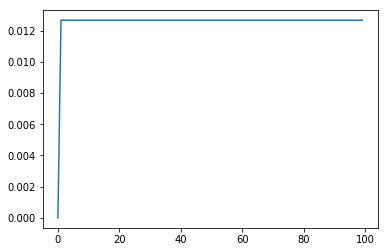

1 42
plt


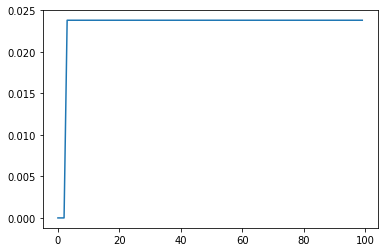

1 150
2 150
3 150
4 150
plt


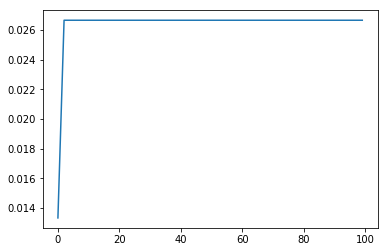

1 65
2 65
3 65
4 65
plt


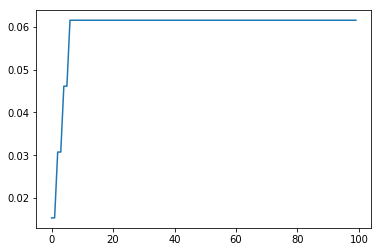

1 83
2 83
3 83
plt


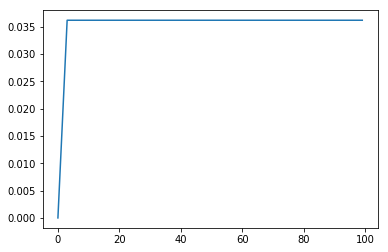

1 149
2 149
plt


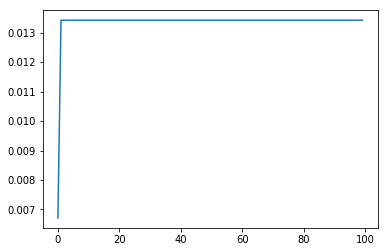

1 77
plt


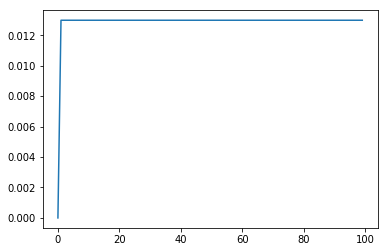

1 37
2 37
plt


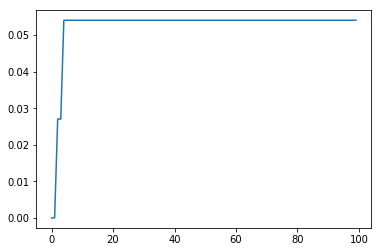

1 38
2 38
3 38
4 38
plt


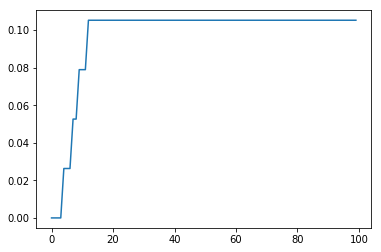

1 97
2 97
plt


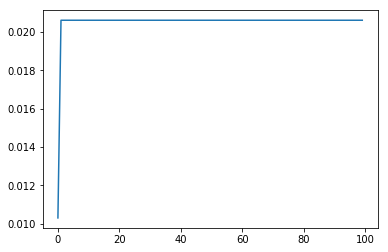

1 17
plt


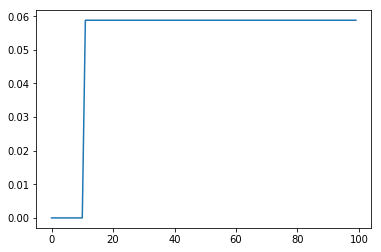

1 345
plt


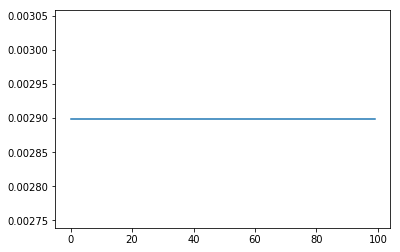

1 44
2 44
3 44
plt


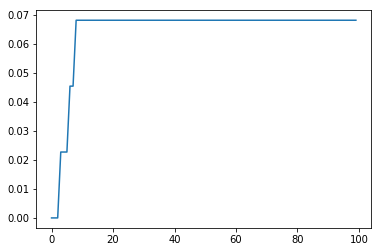

1 73
2 73
plt


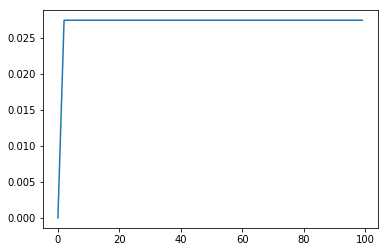

1 54
plt


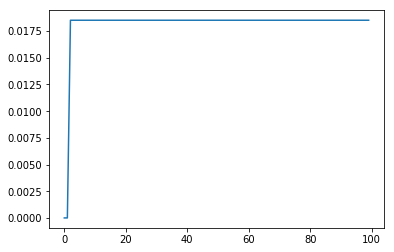

1 73
2 73
3 73
4 73
plt


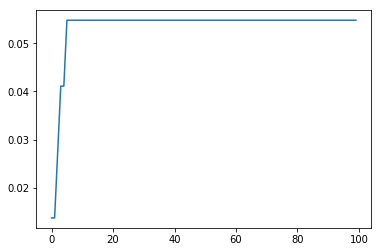

1 105
plt


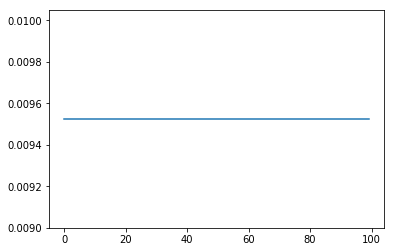

1 86
plt


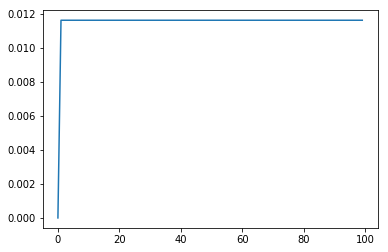

1 219
2 219
3 219
4 219
5 219
6 219
plt


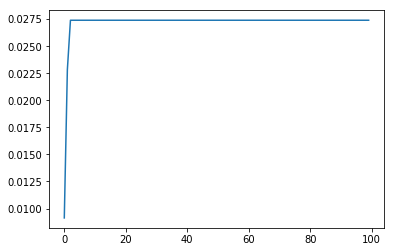

1 153
plt


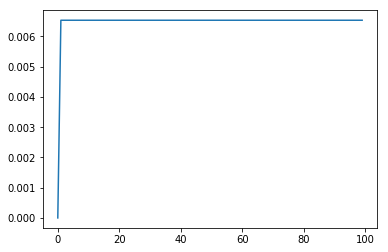

1 61
plt


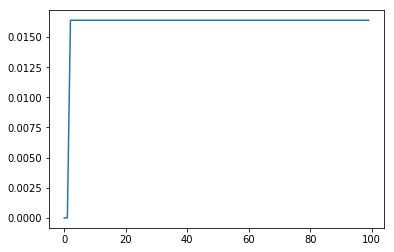

1 54
2 54
3 54
4 54
5 54
6 54
plt


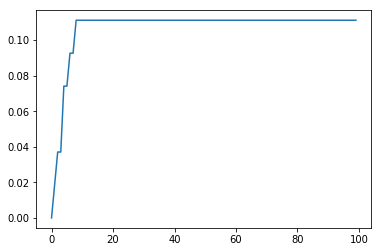

1 169
2 169
3 169
4 169
plt


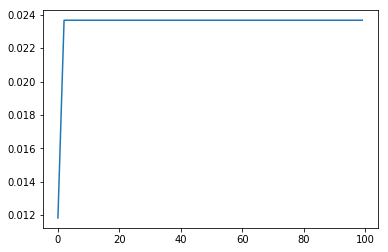

1 94
plt


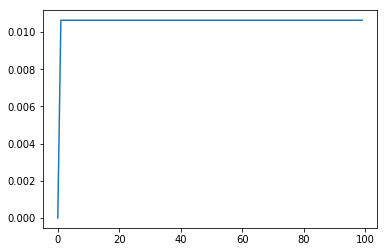

1 23
plt


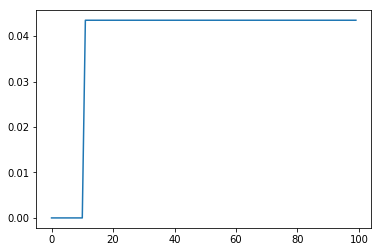

1 58
plt


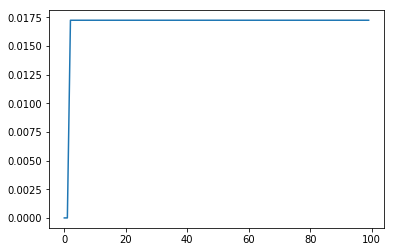

1 141
2 141
plt


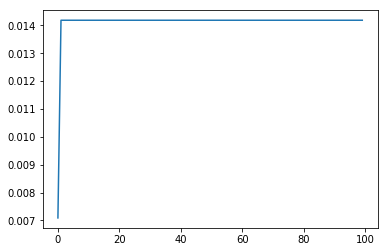

1 33
plt


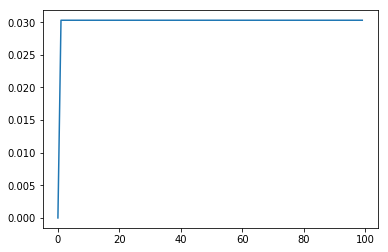

1 22
plt


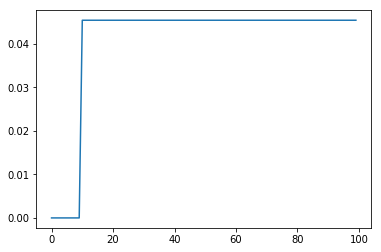

1 37
2 37
3 37
plt


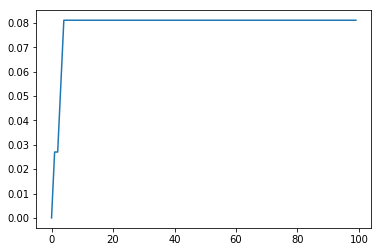

1 1600
2 1600
plt


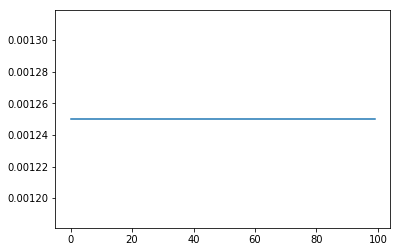

1 68
plt


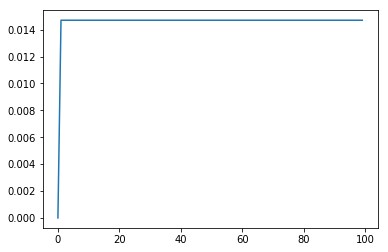

1 354
2 354
3 354
4 354
5 354
6 354
7 354
8 354
9 354
10 354
plt


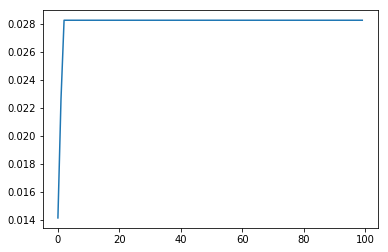

1 40
plt


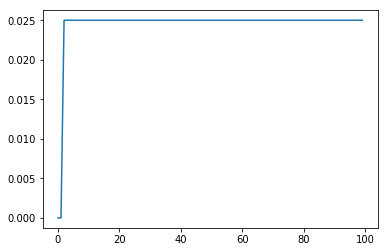

1 140
plt


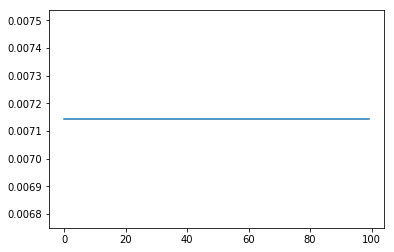

1 1074
plt


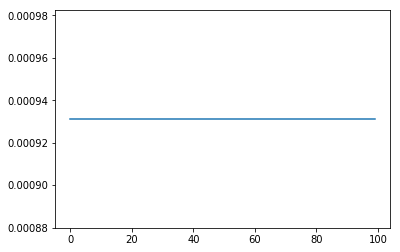

1 48
plt


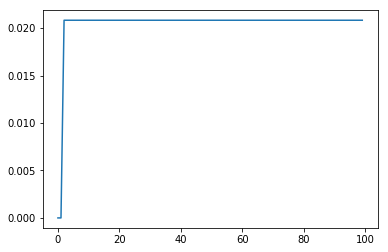

1 38
2 38
3 38
4 38
plt


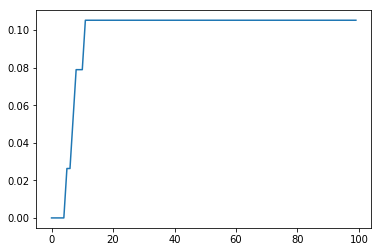

1 37
plt


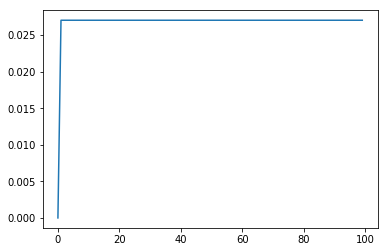

1 57
2 57
plt


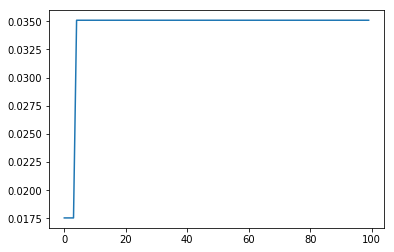

1 203
2 203
3 203
4 203
5 203
6 203
7 203
8 203
9 203
10 203
11 203
12 203
13 203
14 203
plt


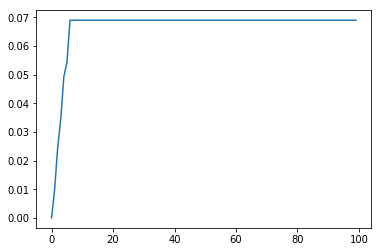

1 61
2 61
plt


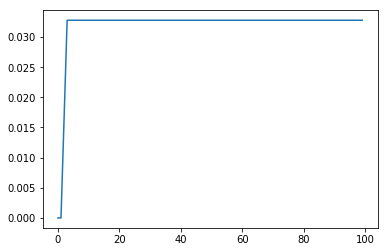

1 77
plt


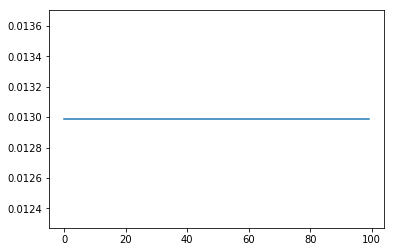

1 323
2 323
3 323
4 323
5 323
6 323
7 323
8 323
9 323
10 323
11 323
12 323
13 323
14 323
15 323
16 323
17 323
18 323
19 323
plt


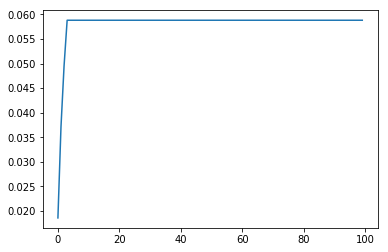

1 38
plt


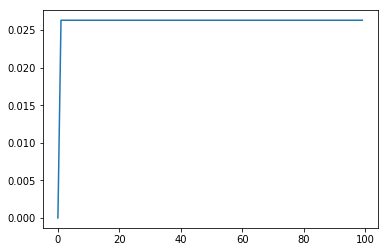

1 46
2 46
plt


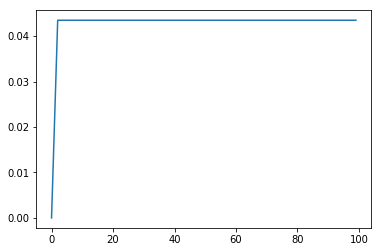

1 36
2 36
3 36
4 36
plt


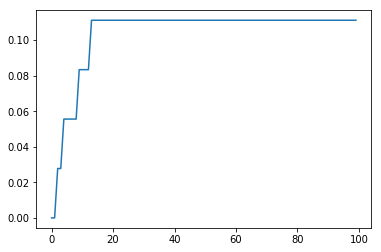

1 40
2 40
plt


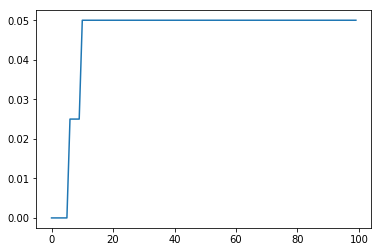

1 45
2 45
plt


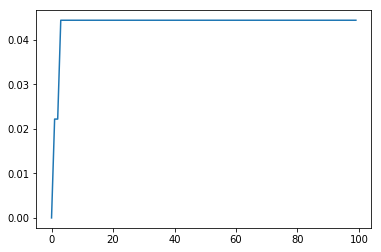

1 112
plt


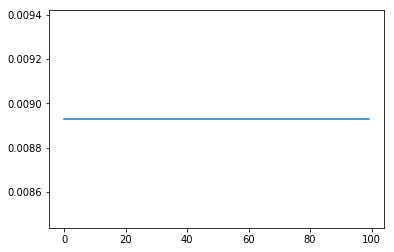

1 39
plt


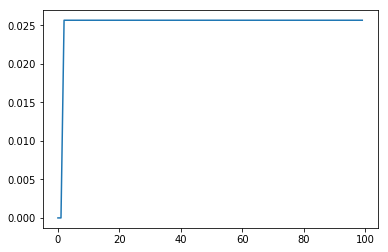

1 175
plt


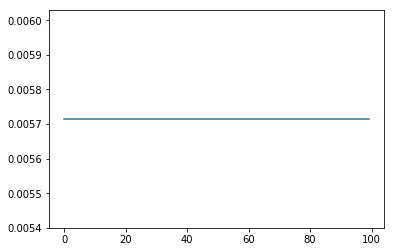

1 105
2 105
plt


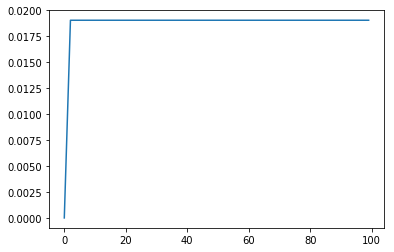

1 107
2 107
3 107
4 107
5 107
6 107
plt


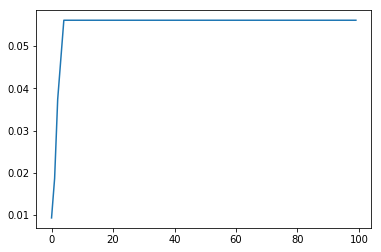

1 170
plt


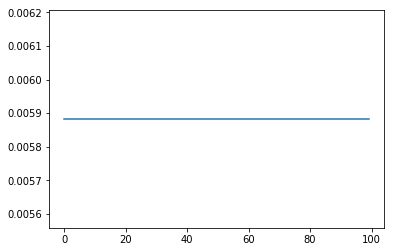

1 70
plt


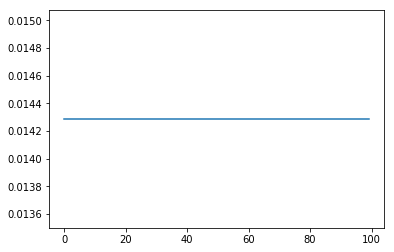

1 76
plt


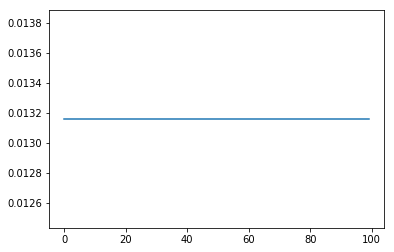

1 100
2 100
3 100
plt


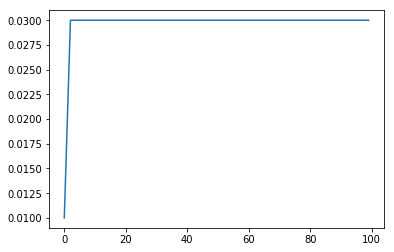

1 175
plt


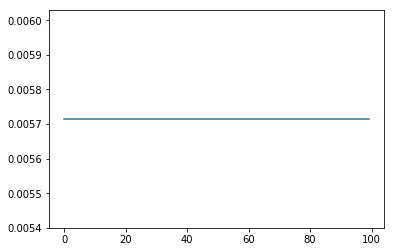

1 39
plt


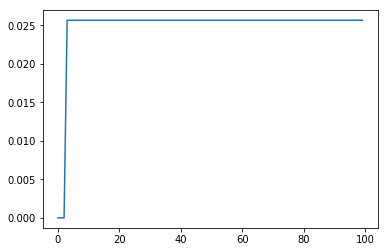

1 211
2 211
3 211
4 211
5 211
6 211
7 211
8 211
9 211
10 211
plt


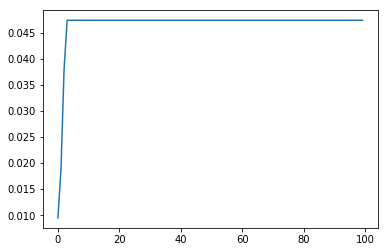

1 13
plt


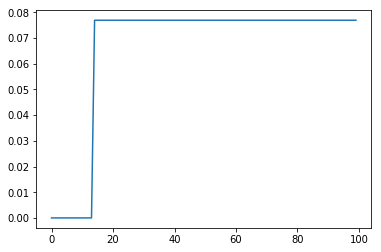

1 95
2 95
plt


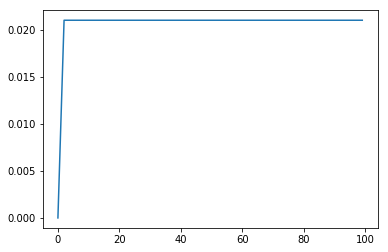

1 60
2 60
3 60
4 60
plt


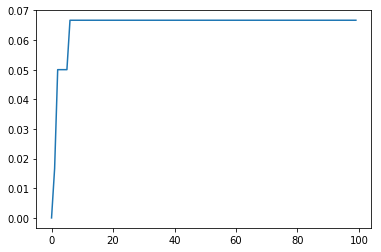

1 200
2 200
3 200
4 200
5 200
6 200
plt


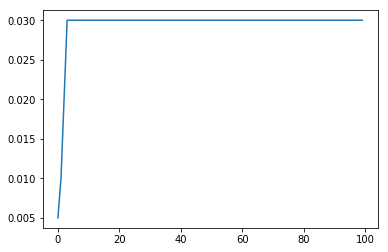

1 65
plt


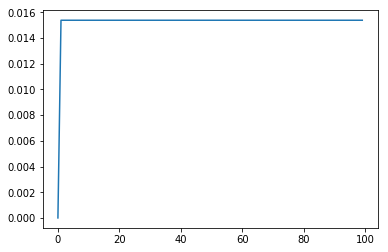

1 27
2 27
3 27
plt


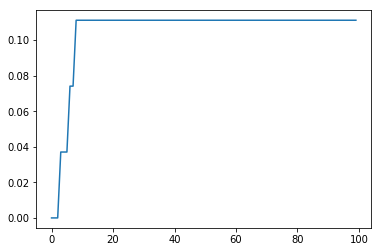

1 93
2 93
plt


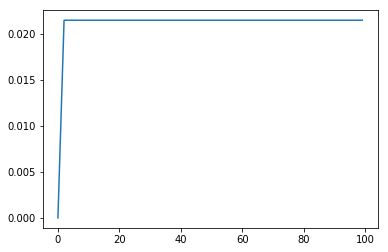

1 61
plt


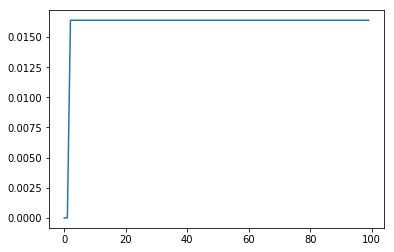

1 85
2 85
3 85
4 85
5 85
6 85
7 85
8 85
9 85
10 85
11 85
12 85
13 85
14 85
15 85
16 85
17 85
18 85
19 85
20 85
21 85
22 85
23 85
24 85
25 85
26 85
27 85
28 85
plt


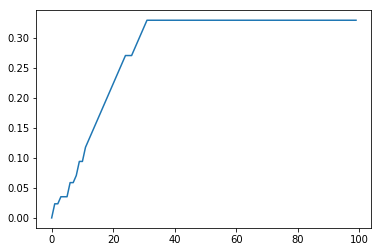

1 68
plt


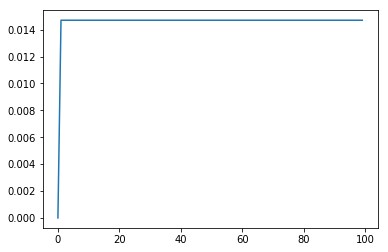

1 276
plt


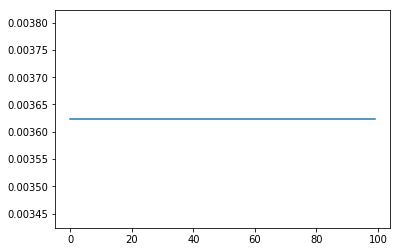

1 55
plt


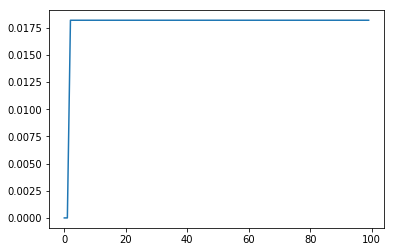

1 44
plt


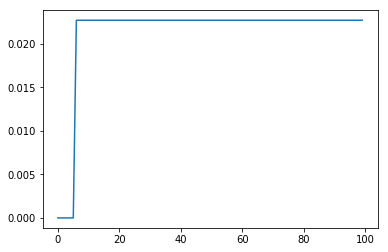

1 78
plt


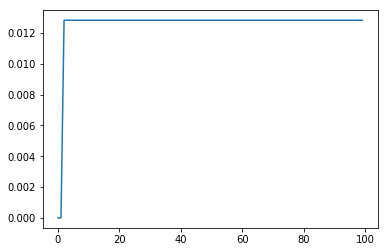

1 98
plt


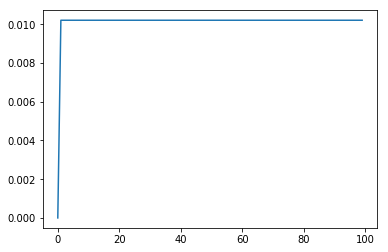

1 167
2 167
plt


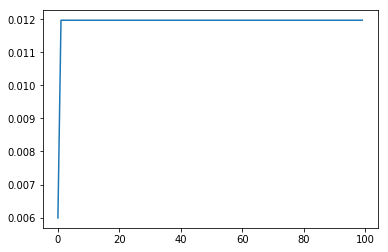

1 40
plt


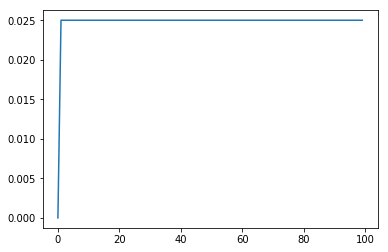

1 44
plt


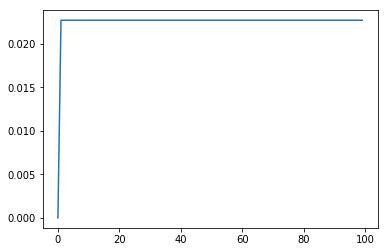

1 372
plt


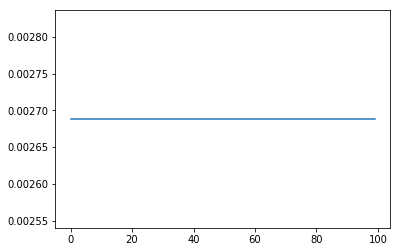

1 178
2 178
plt


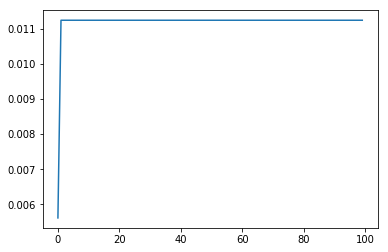

1 43
2 43
3 43
4 43
5 43
6 43
7 43
8 43
9 43
10 43
11 43
12 43
13 43
14 43
15 43
16 43
17 43
18 43
19 43
20 43
21 43
22 43
23 43
24 43
25 43
26 43
27 43
28 43
29 43
plt


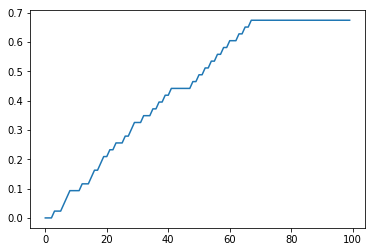

1 24
2 24
plt


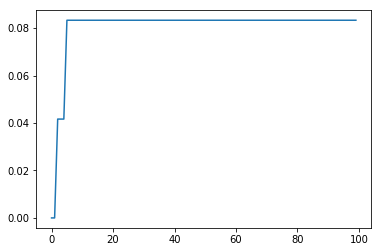

1 71
plt


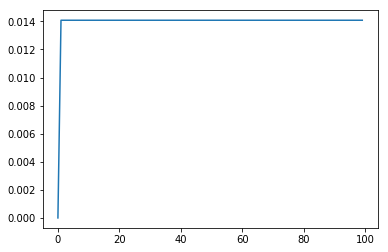

1 85
2 85
3 85
4 85
5 85
6 85
7 85
8 85
9 85
10 85
11 85
12 85
13 85
14 85
15 85
16 85
17 85
18 85
19 85
20 85
21 85
22 85
23 85
24 85
25 85
26 85
27 85
28 85
29 85
30 85
31 85
32 85
33 85
34 85
35 85
36 85
37 85
38 85
39 85
40 85
41 85
42 85
43 85
44 85
45 85
46 85
47 85
48 85
plt


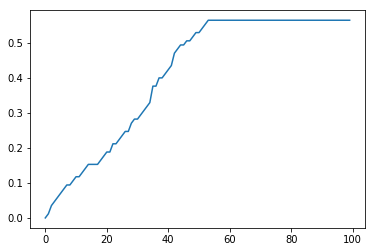

1 28
plt


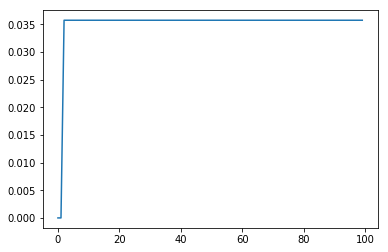

1 41
plt


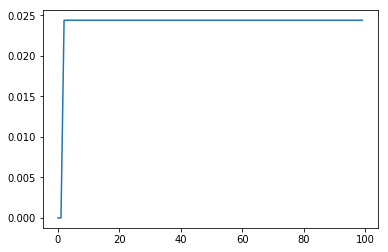

1 295
2 295
3 295
4 295
5 295
6 295
7 295
8 295
9 295
10 295
11 295
12 295
13 295
plt


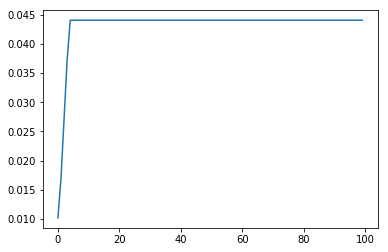

1 72
plt


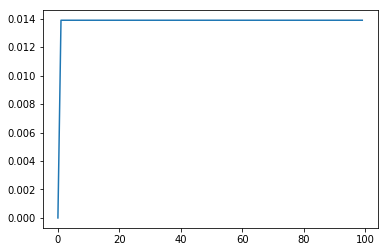

1 43
plt


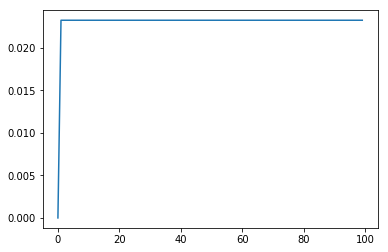

1 26
plt


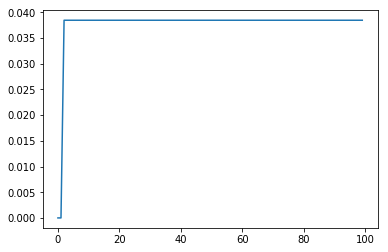

1 41
2 41
plt


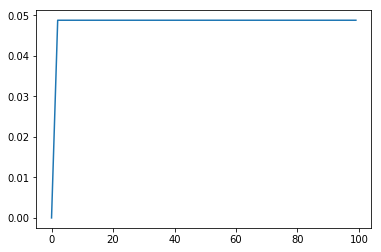

1 40
2 40
3 40
plt


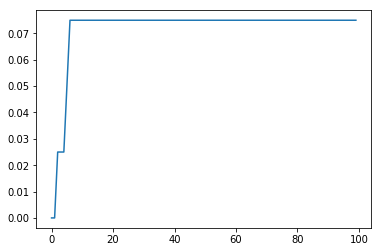

1 17
2 17
3 17
4 17
5 17
6 17
7 17
8 17
9 17
10 17
11 17
12 17
plt


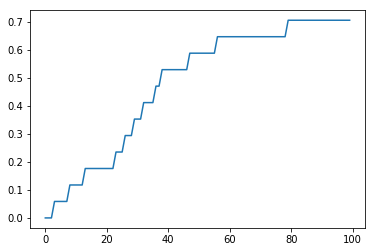

1 98
plt


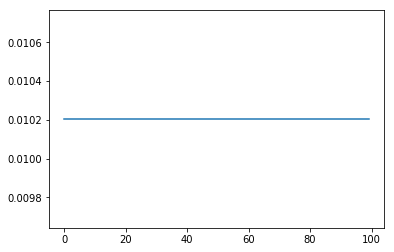

1 48
2 48
3 48
plt


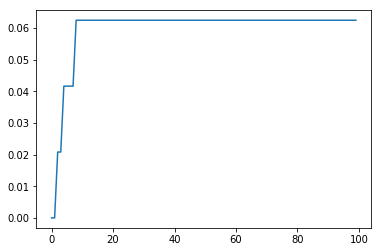

1 33
2 33
plt


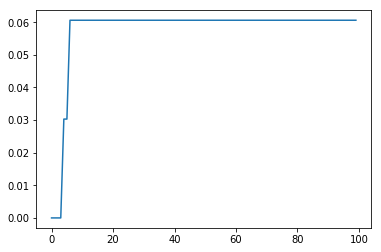

1 93
plt


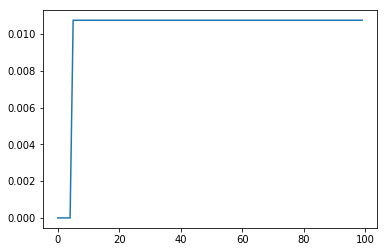

1 89
plt


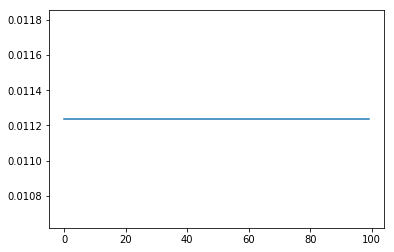

1 30
plt


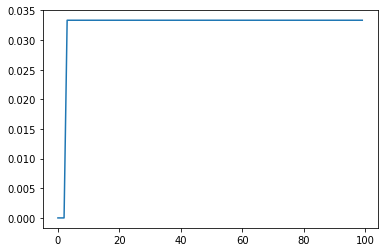

1 20
plt


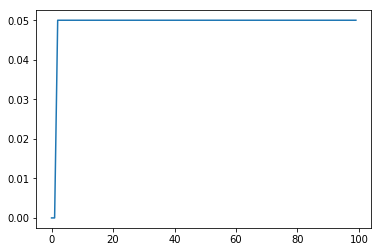

1 52
plt


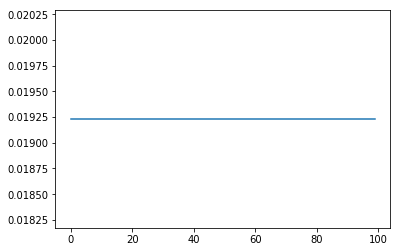

1 55
plt


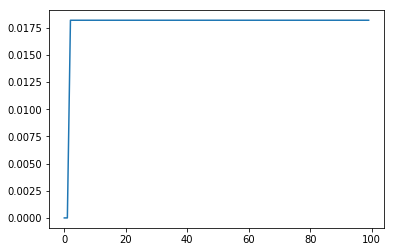

1 65
2 65
3 65
4 65
plt


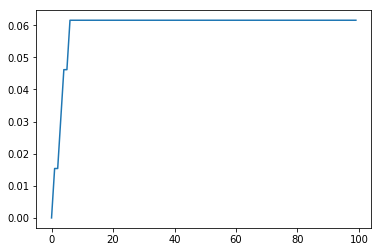

1 106
2 106
3 106
4 106
plt


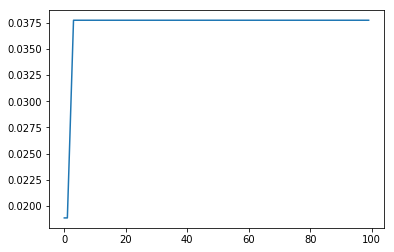

1 75
plt


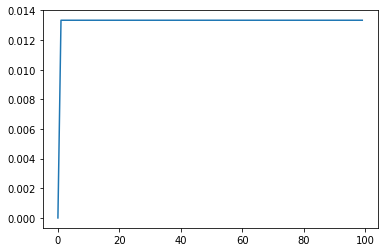

1 135
2 135
plt


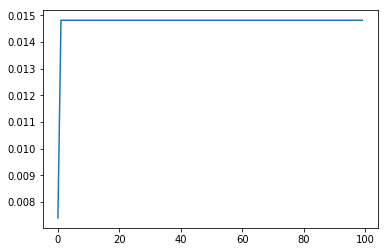

1 39
plt


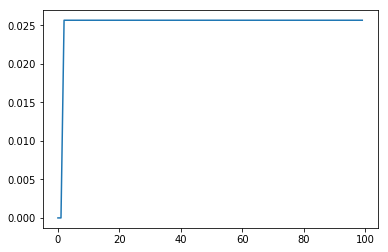

1 160
2 160
3 160
4 160
5 160
6 160
7 160
plt


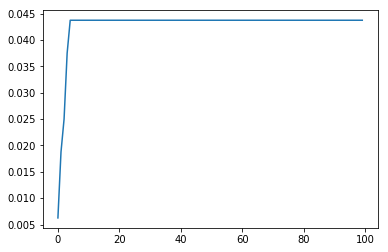

1 49
2 49
3 49
4 49
5 49
6 49
7 49
8 49
9 49
10 49
11 49
12 49
13 49
14 49
15 49
16 49
17 49
plt


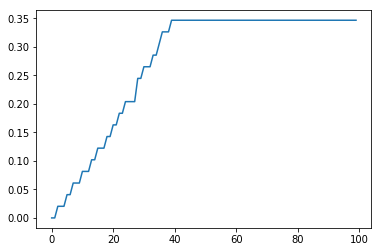

1 33
2 33
3 33
4 33
plt


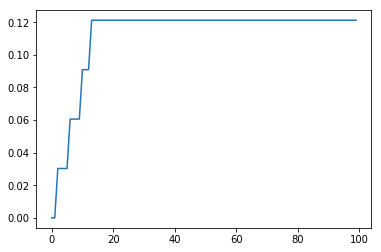

1 76
2 76
3 76
4 76
5 76
6 76
7 76
8 76
9 76
10 76
11 76
12 76
13 76
14 76
15 76
16 76
17 76
18 76
19 76
20 76
21 76
22 76
23 76
24 76
25 76
26 76
27 76
28 76
29 76
30 76
31 76
32 76
33 76
34 76
35 76
36 76
37 76
38 76
39 76
40 76
41 76
42 76
43 76
44 76
45 76
46 76
plt


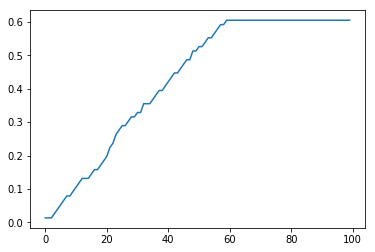

1 48
plt


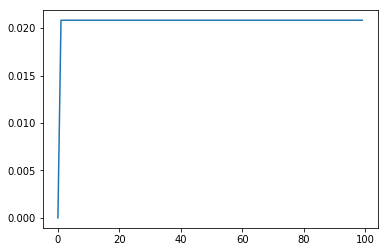

1 80
plt


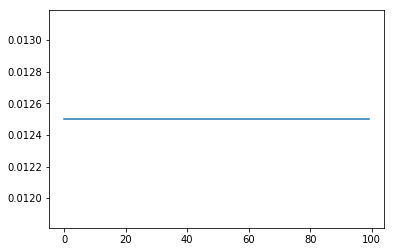

1 73
2 73
3 73
plt


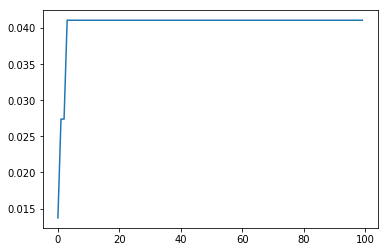

1 35
2 35
3 35
4 35
5 35
6 35
7 35
8 35
9 35
10 35
11 35
12 35
13 35
14 35
15 35
plt


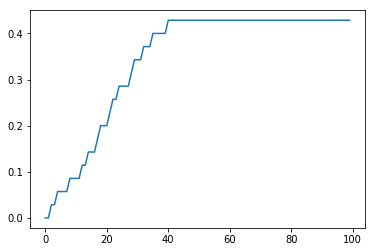

1 37
plt


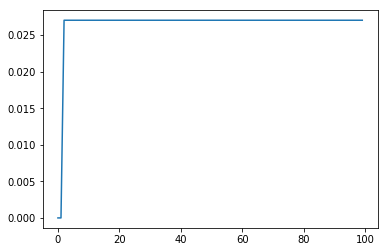

1 33
plt


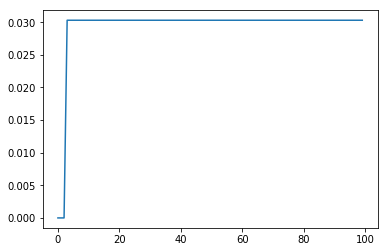

1 62
plt


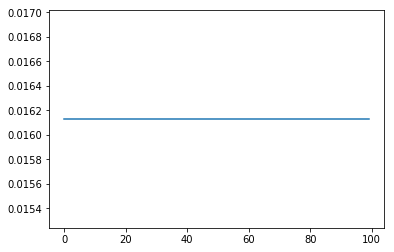

1 24
2 24
3 24
4 24
5 24
6 24
7 24
8 24
plt


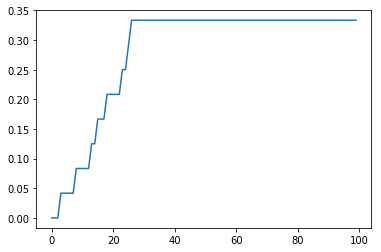

1 67
2 67
plt


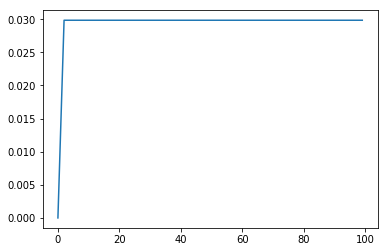

1 80
2 80
3 80
plt


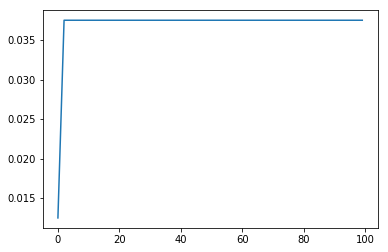

1 30
plt


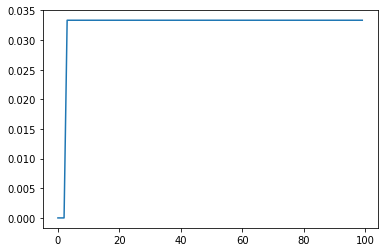

1 24
2 24
plt


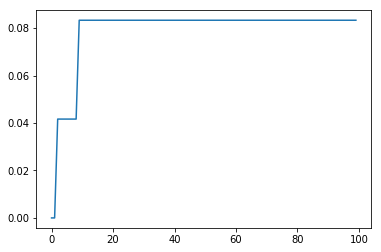

1 167
2 167
3 167
4 167
5 167
6 167
7 167
8 167
9 167
10 167
11 167
12 167
13 167
14 167
15 167
16 167
17 167
18 167
19 167
20 167
21 167
22 167
23 167
24 167
25 167
26 167
27 167
28 167
29 167
30 167
31 167
32 167
33 167
34 167
35 167
36 167
37 167
38 167
39 167
40 167
41 167
plt


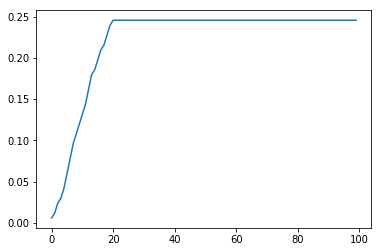

1 25
plt


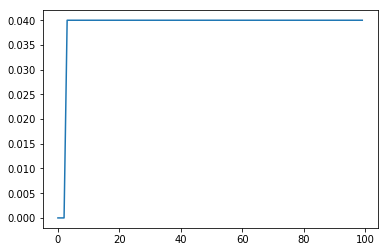

1 52
plt


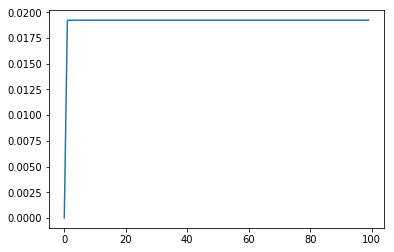

1 34
2 34
3 34
4 34
5 34
6 34
7 34
8 34
9 34
10 34
11 34
12 34
13 34
14 34
15 34
16 34
17 34
18 34
19 34
20 34
21 34
22 34
23 34
24 34
25 34
26 34
27 34
28 34
29 34
30 34
31 34
32 34
33 34
plt


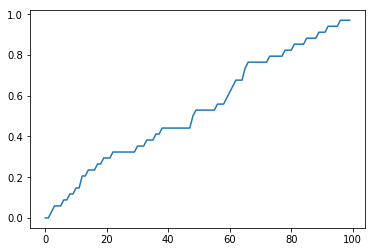

1 46
2 46
3 46
4 46
5 46
6 46
7 46
8 46
9 46
10 46
11 46
12 46
13 46
14 46
15 46
plt


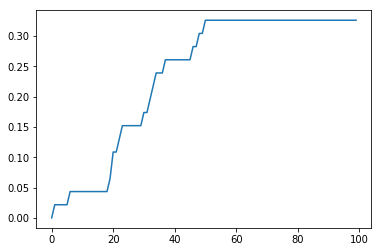

1 145
plt


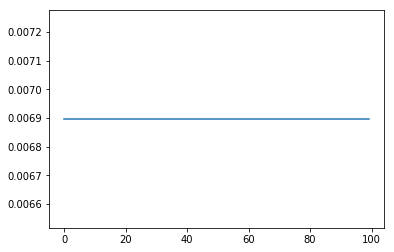

1 36
plt


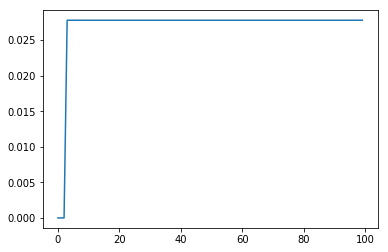

1 61
2 61
3 61
4 61
5 61
plt


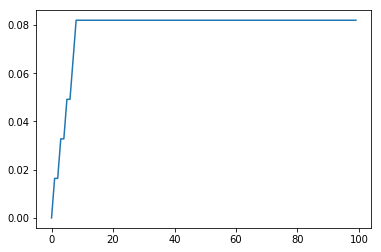

1 58
plt


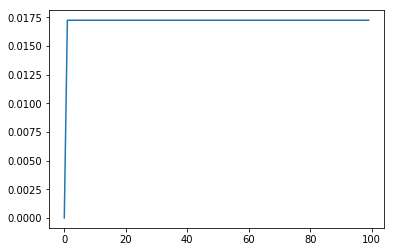

1 44
2 44
3 44
4 44
5 44
6 44
7 44
8 44
9 44
10 44
11 44
12 44
13 44
14 44
15 44
16 44
17 44
18 44
19 44
20 44
21 44
22 44
23 44
24 44
25 44
plt


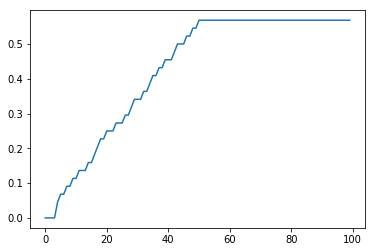

1 45
plt


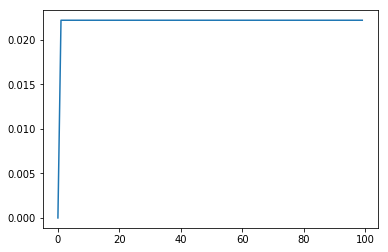

1 54
2 54
3 54
4 54
5 54
6 54
7 54
plt


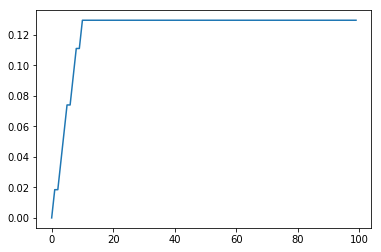

1 31
plt


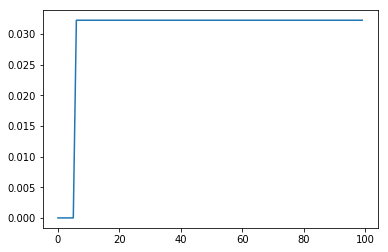

1 97
plt


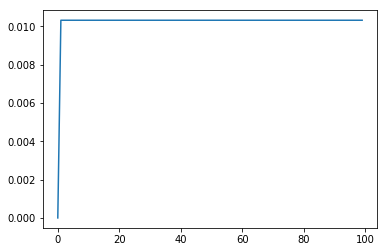

1 38
2 38
3 38
plt


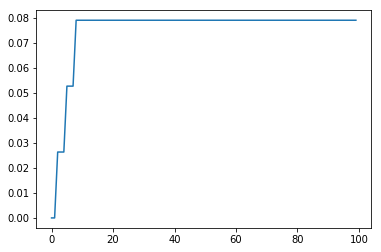

1 261
plt


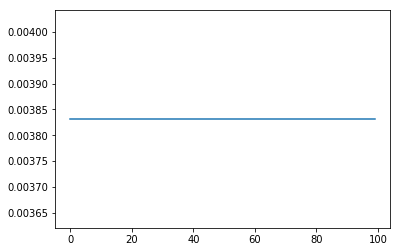

1 75
2 75
3 75
plt


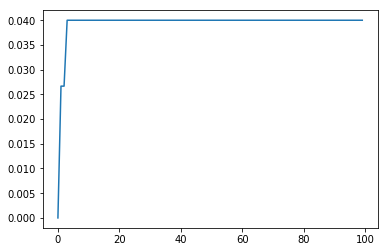

1 73
2 73
plt


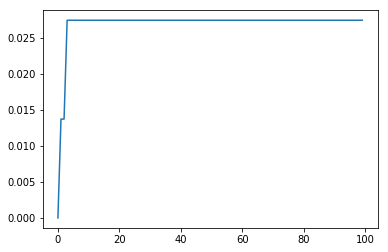

1 92
2 92
plt


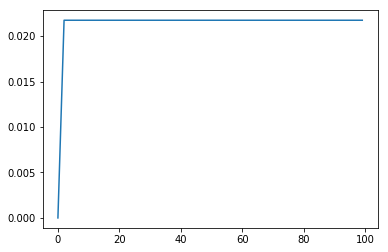

1 30
2 30
plt


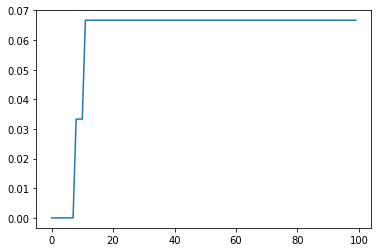

1 229
plt


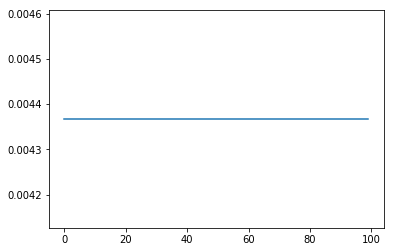

1 112
2 112
3 112
4 112
5 112
6 112
plt


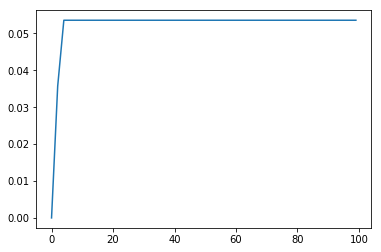

1 9
2 9
3 9
4 9
plt


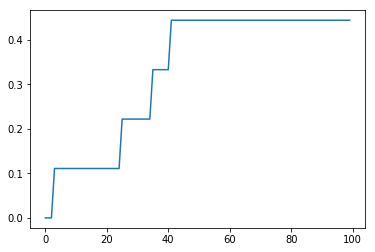

1 121
2 121
plt


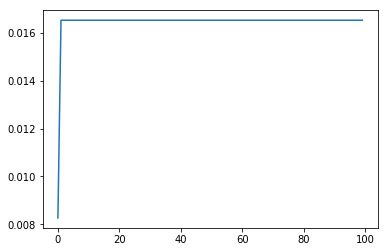

1 95
plt


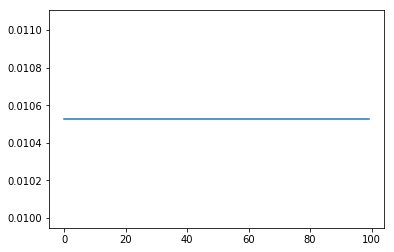

1 35
2 35
3 35
plt


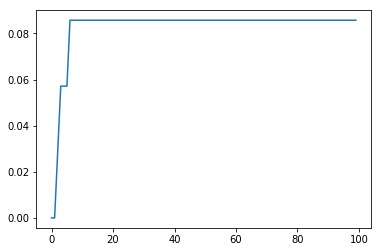

1 93
2 93
3 93
4 93
5 93
plt


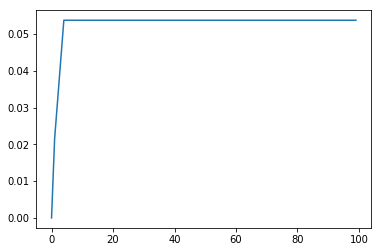

1 136
plt


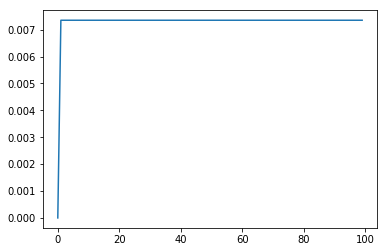

1 31
plt


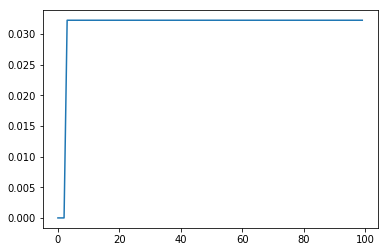

1 40
plt


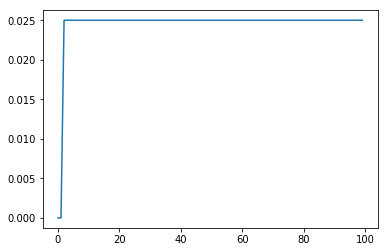

1 54
2 54
plt


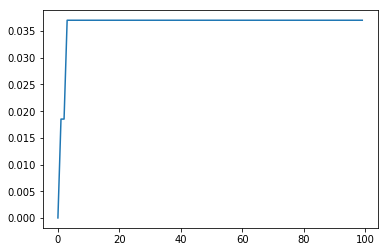

1 109
plt


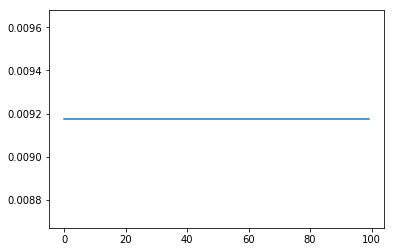

1 28
2 28
plt


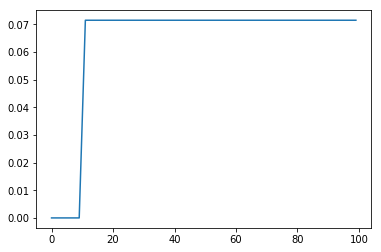

1 76
plt


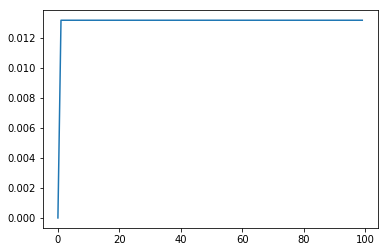

1 36
2 36
3 36
plt


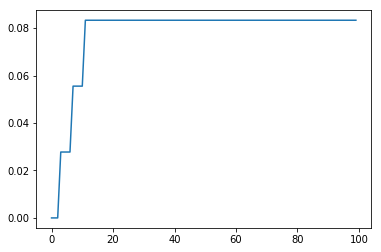

1 50
plt


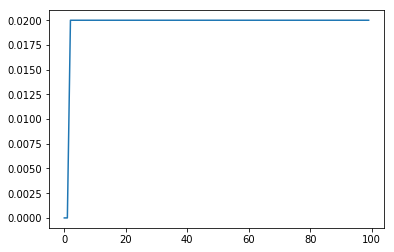

1 54
plt


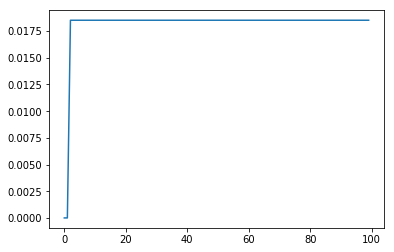

1 49
2 49
3 49
4 49
plt


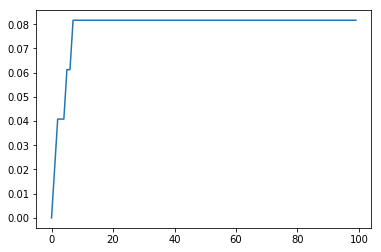

1 55
plt


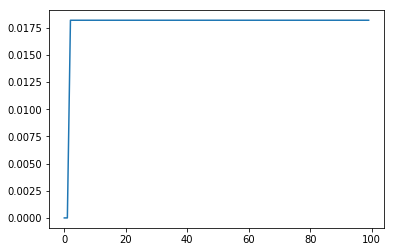

1 112
2 112
3 112
plt


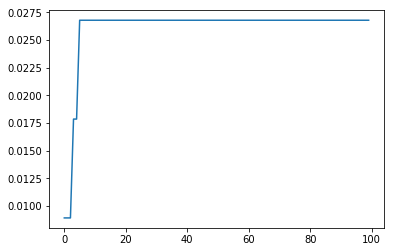

1 43
plt


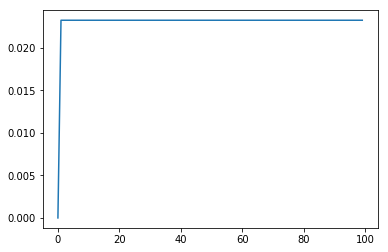

1 11
2 11
3 11
4 11
plt


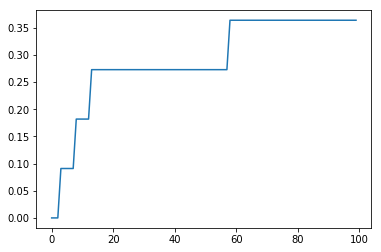

1 142
2 142
3 142
4 142
plt


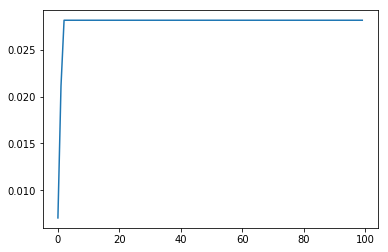

1 123
2 123
3 123
plt


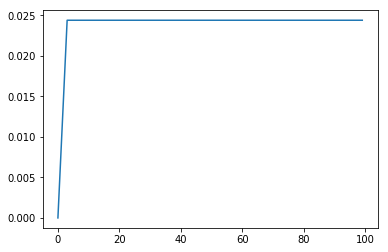

1 89
2 89
3 89
4 89
5 89
6 89
plt


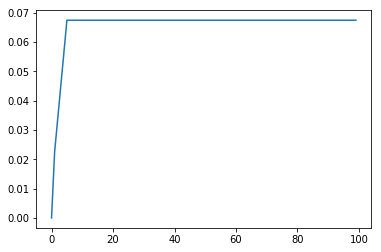

1 54
plt


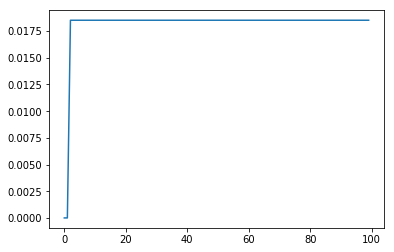

1 33
plt


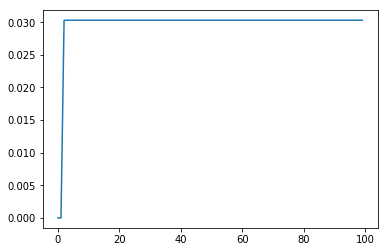

1 376
plt


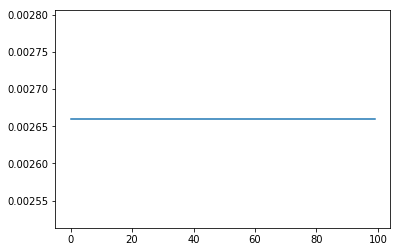

1 104
2 104
3 104
4 104
5 104
6 104
7 104
plt


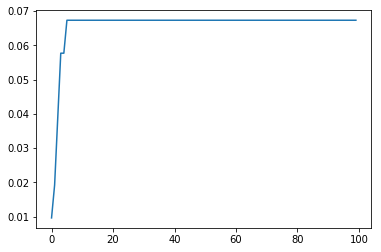

1 60
plt


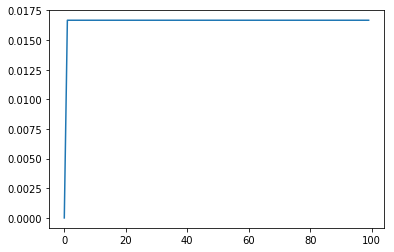

1 129
2 129
plt


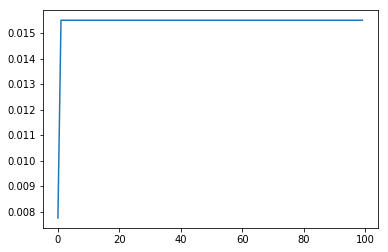

1 137
2 137
plt


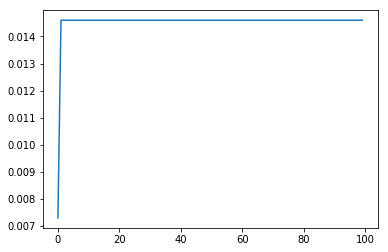

1 37
2 37
plt


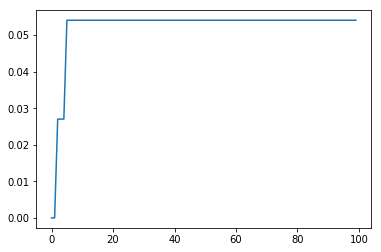

1 446
plt


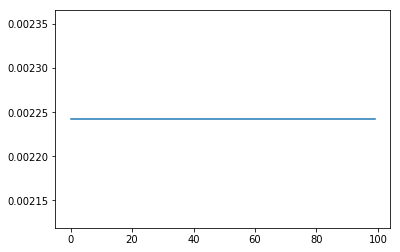

1 57
2 57
3 57
4 57
plt


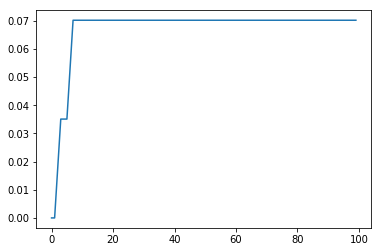

1 153
2 153
3 153
plt


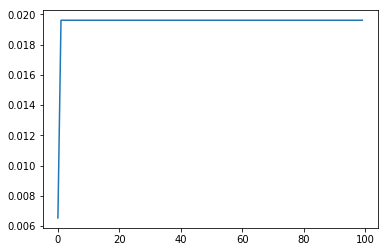

1 38
2 38
3 38
4 38
5 38
plt


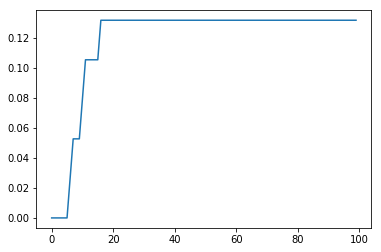

1 465
plt


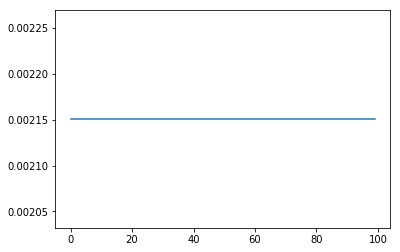

1 118
plt


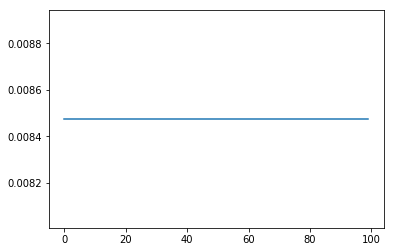

1 27
2 27
plt


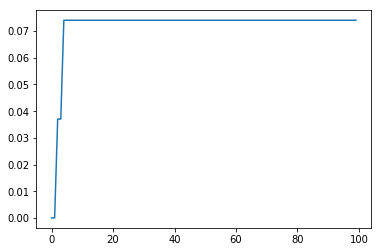

1 129
plt


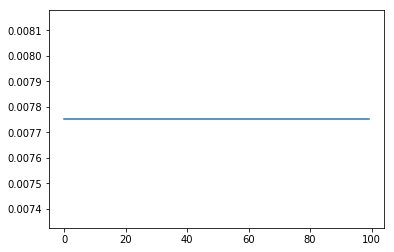

1 54
plt


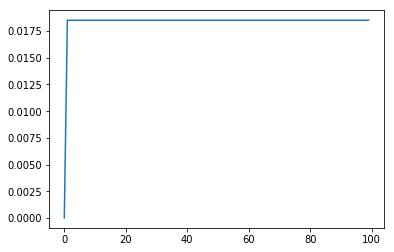

1 68
plt


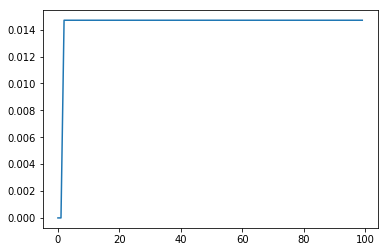

1 230
2 230
plt


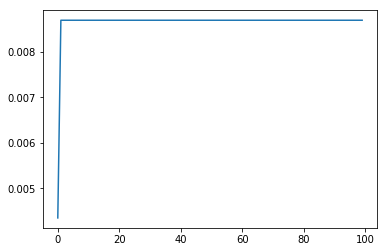

1 72
plt


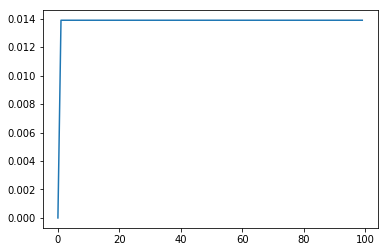

1 45
2 45
3 45
plt


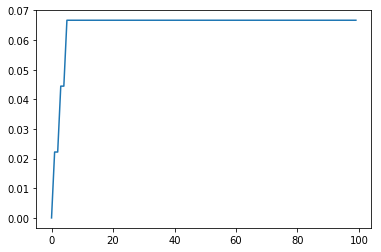

1 17
plt


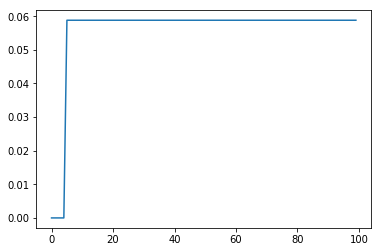

1 38
plt


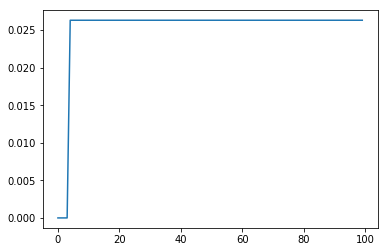

1 147
2 147
plt


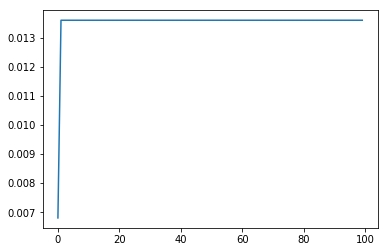

1 81
2 81
plt


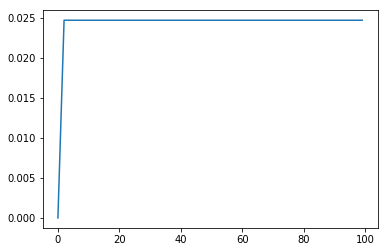

1 37
plt


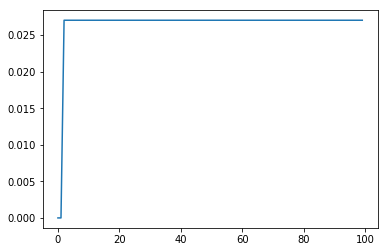

1 98
2 98
3 98
4 98
5 98
6 98
7 98
8 98
9 98
10 98
11 98
12 98
13 98
14 98
15 98
16 98
17 98
18 98
19 98
20 98
21 98
22 98
23 98
24 98
25 98
26 98
27 98
28 98
29 98
30 98
31 98
32 98
33 98
34 98
35 98
36 98
37 98
38 98
39 98
40 98
41 98
42 98
43 98
44 98
45 98
46 98
47 98
48 98
49 98
50 98
51 98
52 98
53 98
54 98
55 98
56 98
57 98
58 98
59 98
60 98
61 98
62 98
63 98
64 98
65 98
66 98
67 98
68 98
69 98
70 98
71 98
72 98
73 98
74 98
75 98
76 98
77 98
78 98
79 98
80 98
81 98
82 98
83 98
84 98
85 98
86 98
87 98
88 98
89 98
90 98
91 98
92 98
93 98
plt


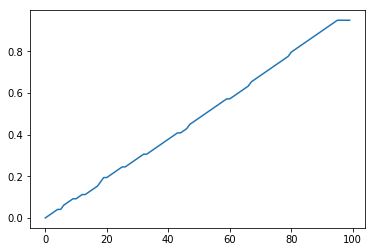

1 27
plt


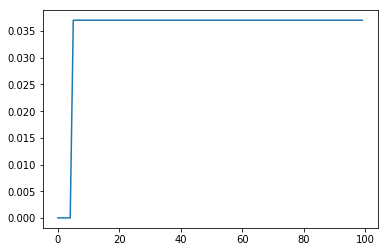

1 84
2 84
plt


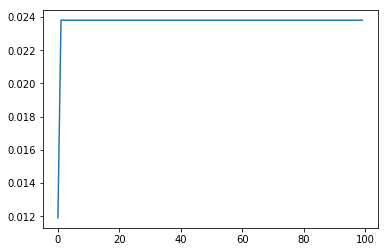

1 83
2 83
3 83
4 83
5 83
6 83
7 83
8 83
9 83
10 83
11 83
12 83
13 83
14 83
15 83
plt


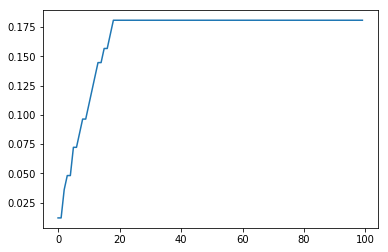

1 277
2 277
3 277
4 277
5 277
6 277
7 277
plt


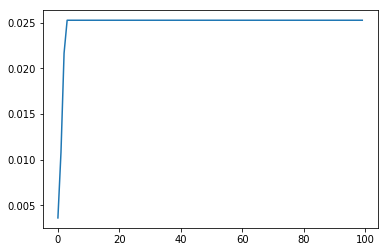

1 42
plt


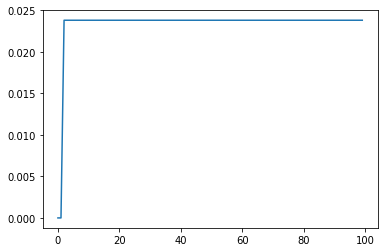

1 29
2 29
plt


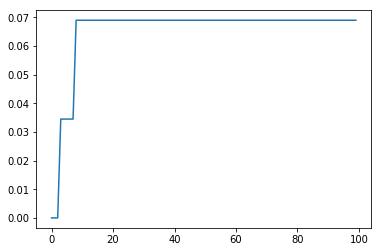

1 219
2 219
3 219
4 219
5 219
6 219
7 219
8 219
9 219
10 219
11 219
12 219
13 219
14 219
15 219
16 219
17 219
18 219
19 219
20 219
21 219
plt


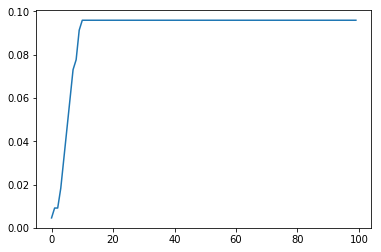

1 61
plt


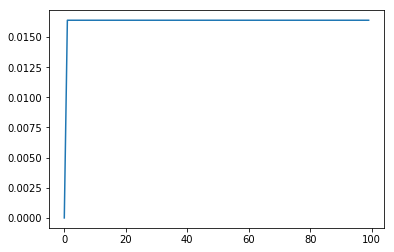

1 71
plt


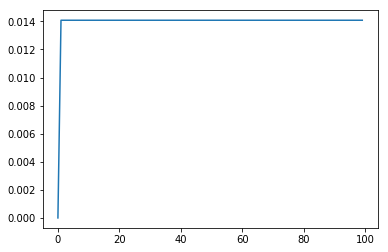

1 88
2 88
3 88
4 88
5 88
plt


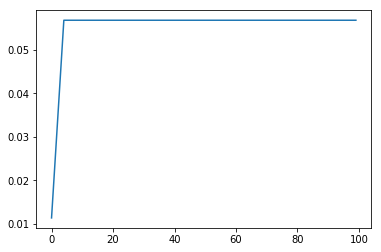

1 36
2 36
3 36
4 36
5 36
plt


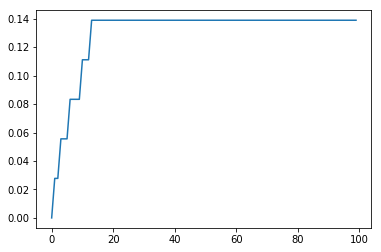

1 75
plt


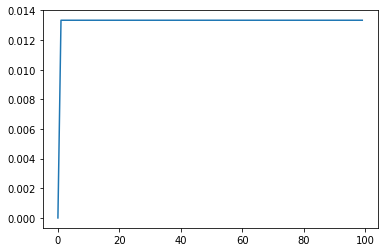

1 62
2 62
plt


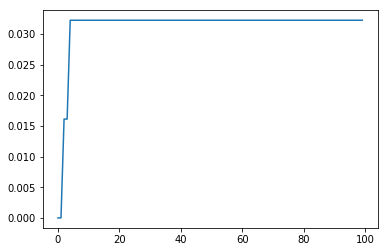

1 47
plt


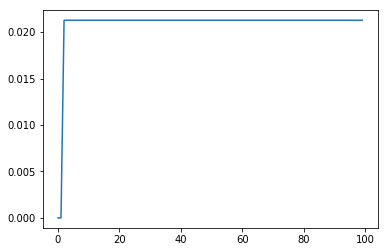

1 67
plt


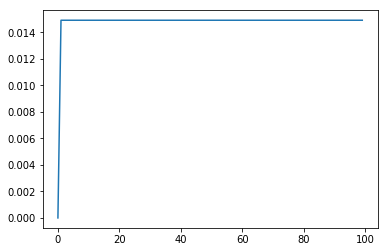

1 57
plt


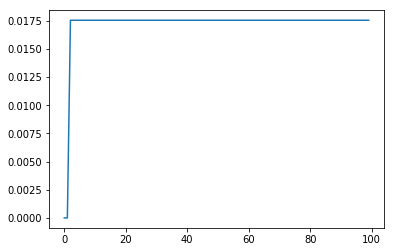

1 486
2 486
3 486
4 486
5 486
6 486
7 486
plt


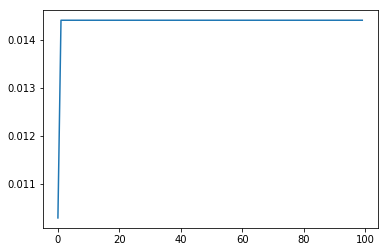

1 127
2 127
3 127
4 127
5 127
6 127
7 127
8 127
9 127
10 127
11 127
12 127
13 127
14 127
15 127
16 127
17 127
18 127
19 127
plt


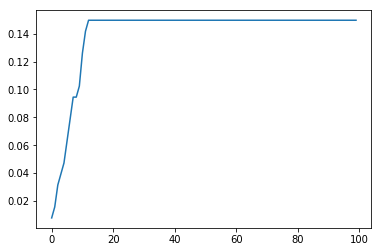

1 58
2 58
3 58
4 58
5 58
6 58
plt


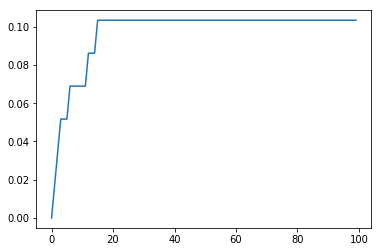

1 29
plt


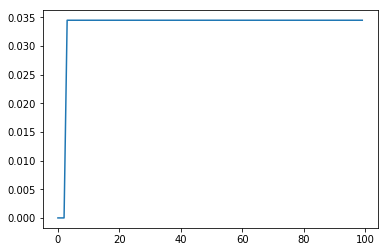

1 119
plt


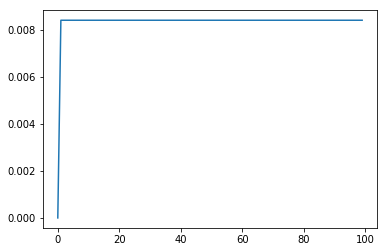

1 52
plt


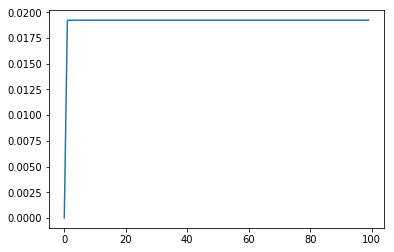

1 33
2 33
3 33
4 33
5 33
6 33
7 33
8 33
9 33
10 33
11 33
12 33
13 33
14 33
15 33
16 33
17 33
18 33
19 33
20 33
21 33
22 33
23 33
24 33
25 33
26 33
27 33
28 33
29 33
30 33
31 33
plt


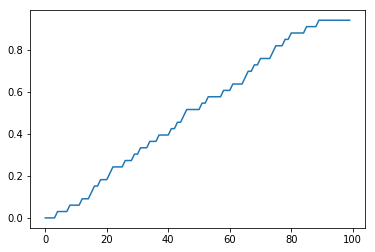

1 57
plt


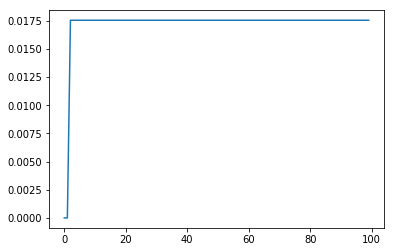

1 77
plt


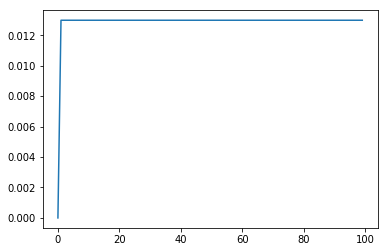

1 225
plt


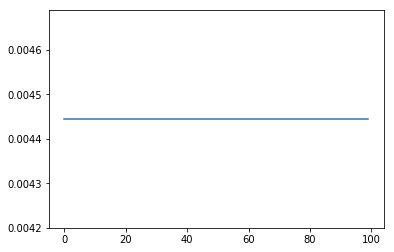

1 84
2 84
3 84
4 84
5 84
6 84
7 84
8 84
9 84
10 84
11 84
12 84
13 84
14 84
15 84
16 84
17 84
18 84
19 84
20 84
21 84
22 84
23 84
24 84
25 84
26 84
27 84
28 84
29 84
30 84
31 84
32 84
33 84
34 84
35 84
36 84
37 84
38 84
39 84
40 84
41 84
42 84
43 84
plt


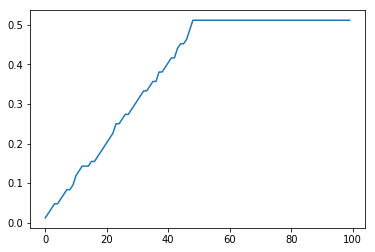

1 51
2 51
plt


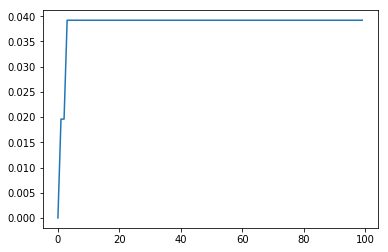

1 61
2 61
3 61
4 61
5 61
6 61
7 61
8 61
9 61
10 61
11 61
12 61
13 61
plt


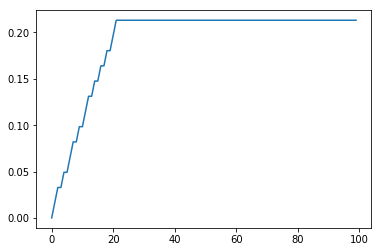

1 89
2 89
3 89
plt


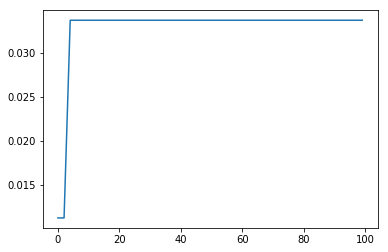

1 38
plt


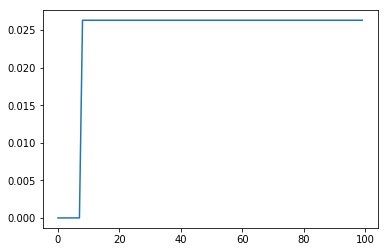

1 57
plt


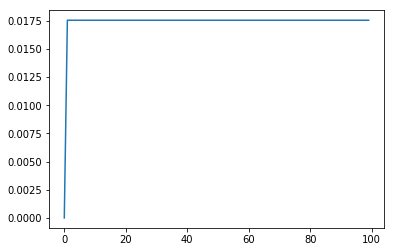

1 43
plt


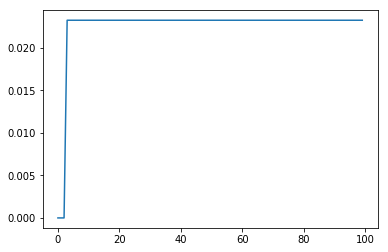

1 102
2 102
3 102
plt


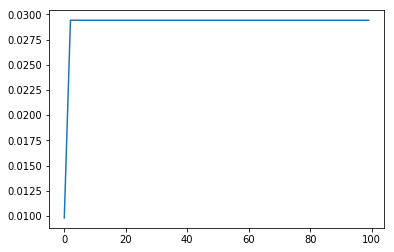

1 114
2 114
3 114
4 114
5 114
6 114
7 114
8 114
9 114
10 114
11 114
12 114
13 114
14 114
15 114
16 114
plt


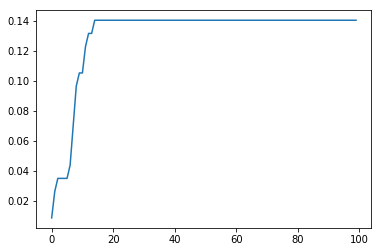

1 63
plt


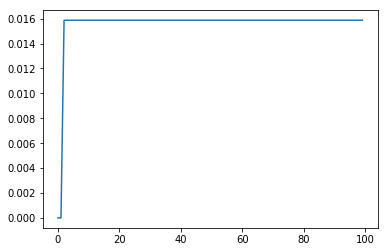

1 53
plt


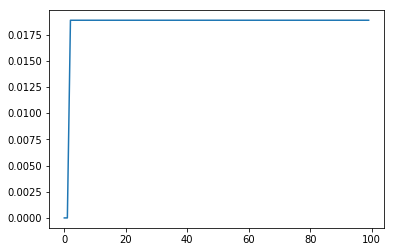

1 14
plt


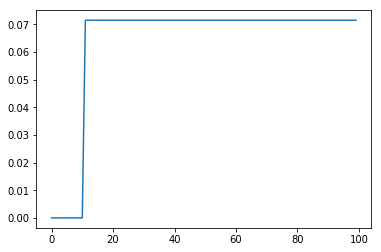

1 79
2 79
plt


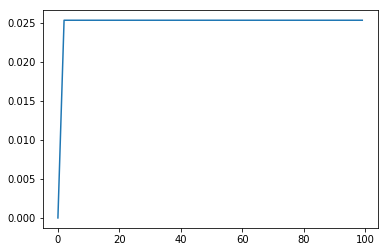

1 57
plt


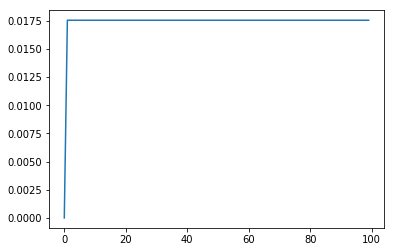

1 117
2 117
3 117
4 117
5 117
6 117
plt


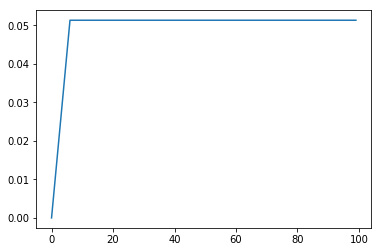

1 50
2 50
3 50
4 50
5 50
6 50
7 50
plt


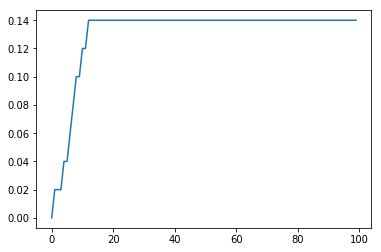

1 109
2 109
plt


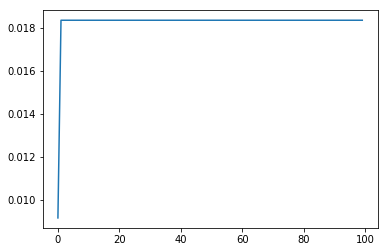

1 70
2 70
3 70
4 70
5 70
6 70
7 70
8 70
9 70
10 70
11 70
12 70
13 70
14 70
15 70
16 70
17 70
18 70
19 70
20 70
plt


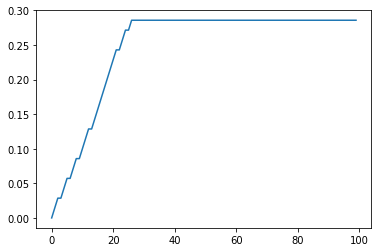

1 205
2 205
plt


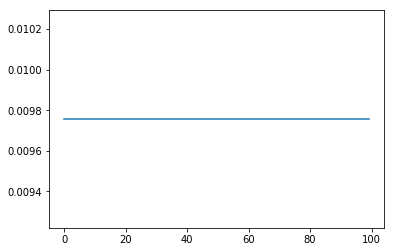

1 67
plt


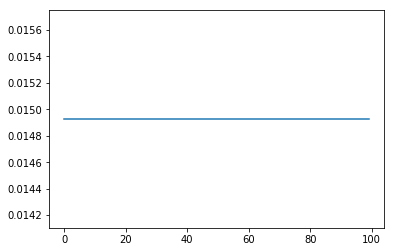

1 128
plt


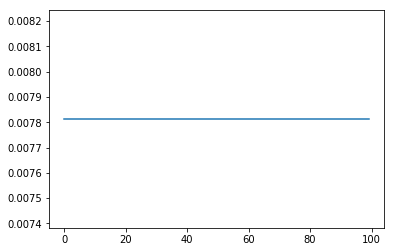

1 44
plt


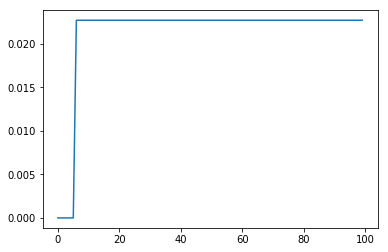

1 107
2 107
3 107
4 107
5 107
6 107
7 107
8 107
9 107
10 107
11 107
plt


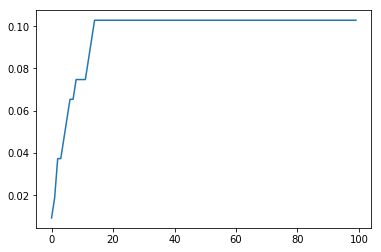

1 53
plt


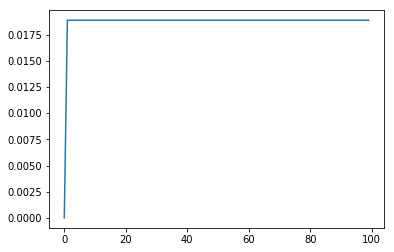

1 54
2 54
3 54
4 54
plt


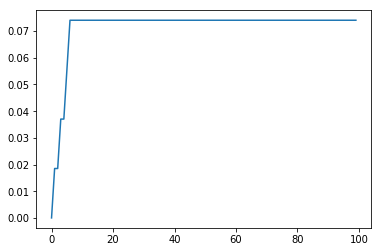

1 42
2 42
3 42
4 42
5 42
6 42
7 42
8 42
9 42
10 42
11 42
12 42
plt


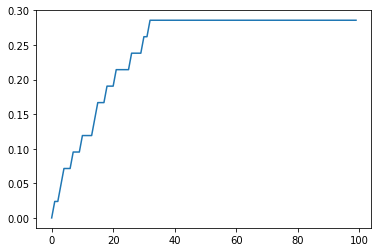

1 50
2 50
plt


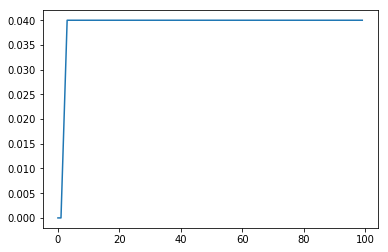

1 68
2 68
plt


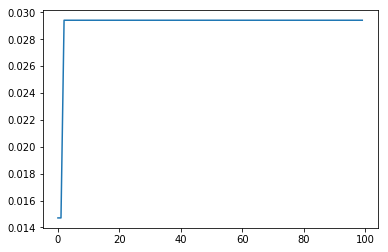

1 42
plt


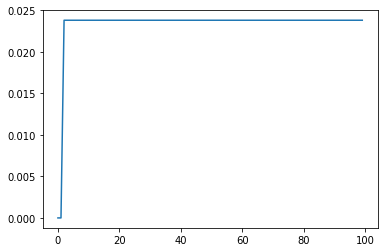

1 49
plt


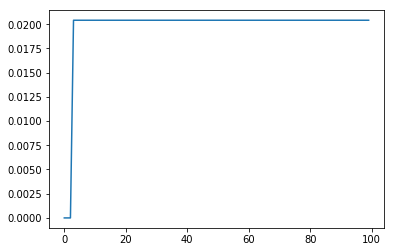

1 34
plt


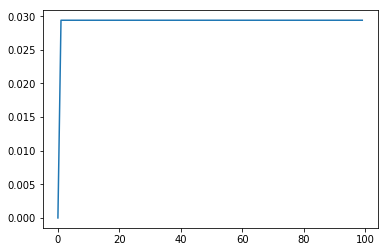

1 52
plt


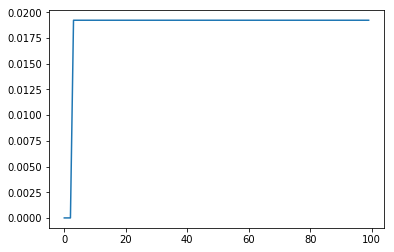

1 62
2 62
plt


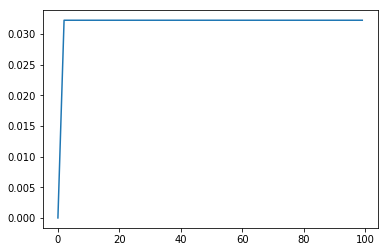

1 29
plt


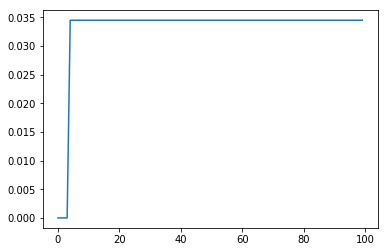

1 43
plt


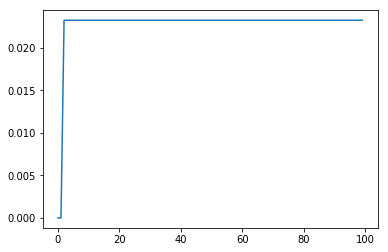

1 37
plt


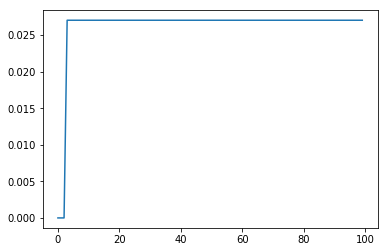

1 126
2 126
plt


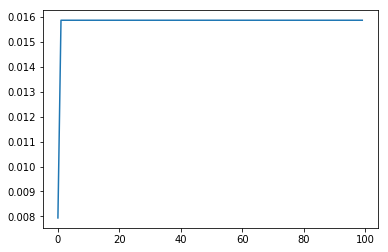

1 46
2 46
3 46
4 46
5 46
6 46
7 46
8 46
9 46
plt


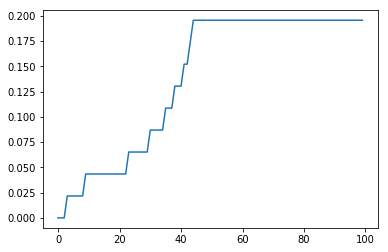

1 71
plt


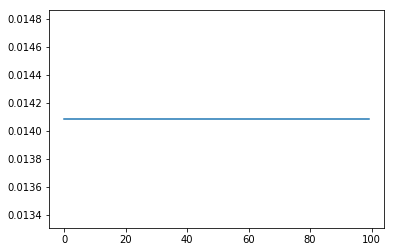

1 24
2 24
3 24
4 24
plt


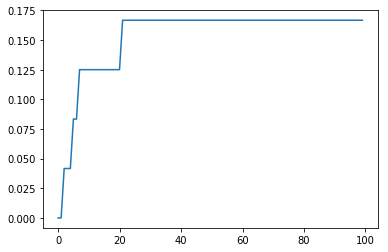

1 178
2 178
plt


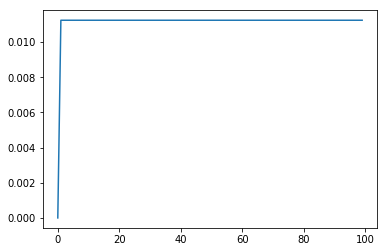

1 71
2 71
plt


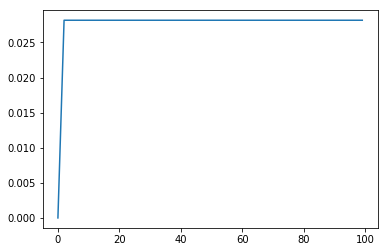

1 70
2 70
3 70
4 70
5 70
6 70
7 70
8 70
9 70
10 70
11 70
plt


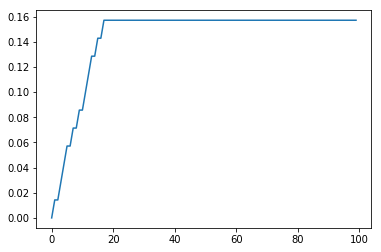

1 60
plt


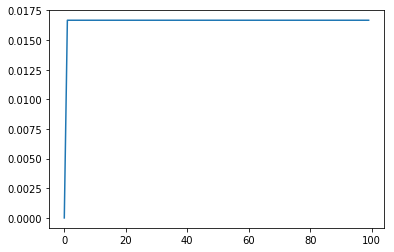

1 297
2 297
3 297
4 297
5 297
plt


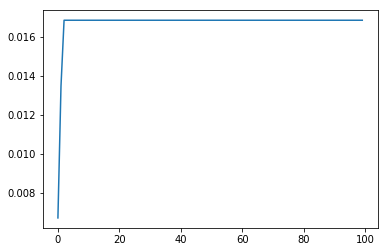

1 107
plt


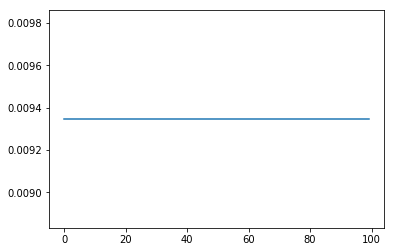

1 33
2 33
plt


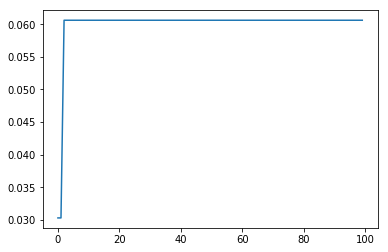

1 96
plt


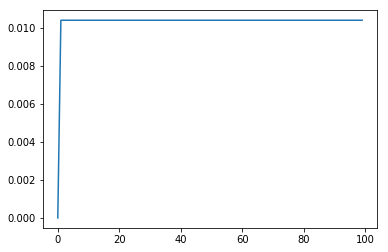

1 176
plt


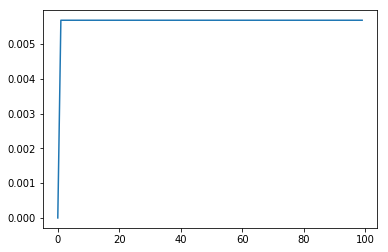

1 46
2 46
plt


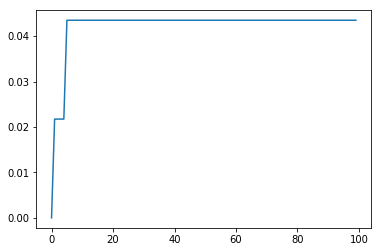

1 761
2 761
3 761
4 761
5 761
6 761
7 761
8 761
9 761
10 761
11 761
12 761
13 761
14 761
15 761
16 761
17 761
18 761
19 761
20 761
21 761
22 761
23 761
24 761
25 761
26 761
27 761
28 761
29 761
30 761
31 761
32 761
33 761
34 761
35 761
36 761
37 761
38 761
39 761
40 761
41 761
42 761
43 761
44 761
45 761
46 761
47 761
48 761
49 761
50 761
51 761
52 761
53 761
54 761
plt


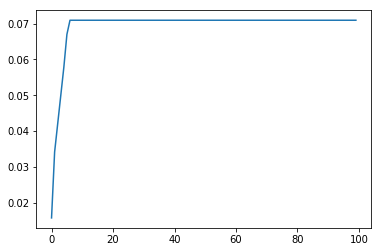

1 145
2 145
3 145
4 145
5 145
6 145
plt


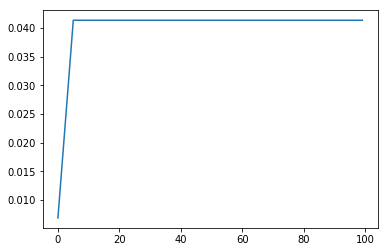

1 134
plt


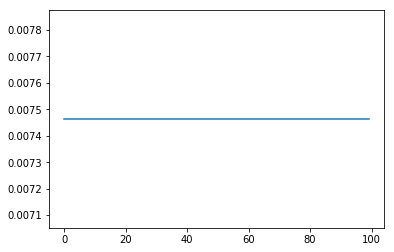

1 60
plt


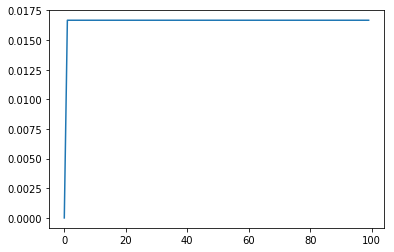

1 50
plt


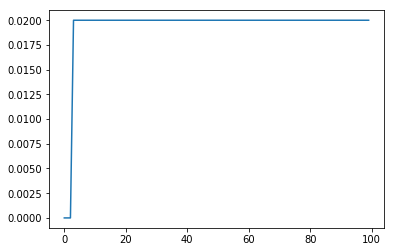

1 136
2 136
plt


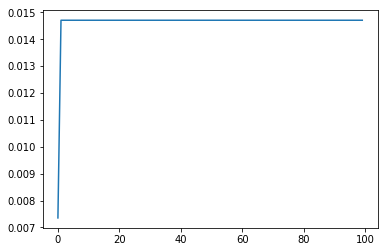

1 52
2 52
3 52
4 52
5 52
plt


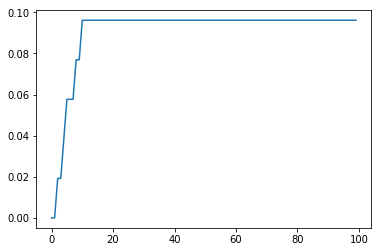

1 152
2 152
3 152
4 152
5 152
6 152
7 152
8 152
9 152
10 152
11 152
12 152
13 152
14 152
15 152
16 152
17 152
18 152
19 152
20 152
21 152
plt


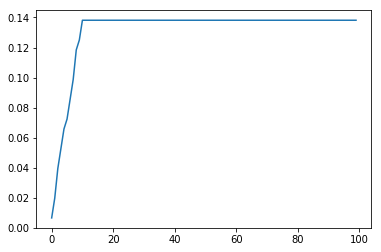

1 104
plt


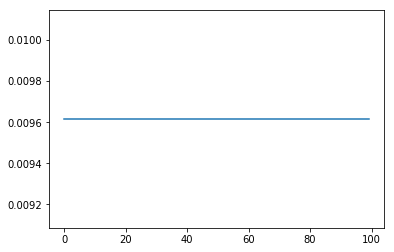

1 57
plt


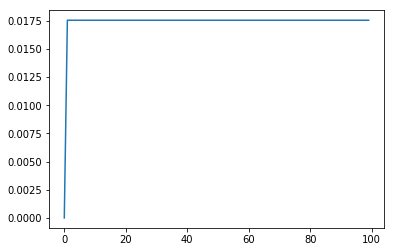

1 43
2 43
3 43
4 43
plt


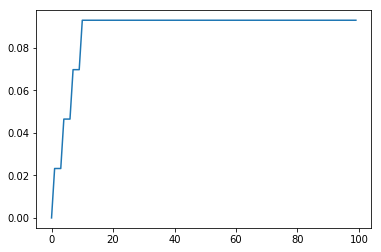

1 39
2 39
3 39
plt


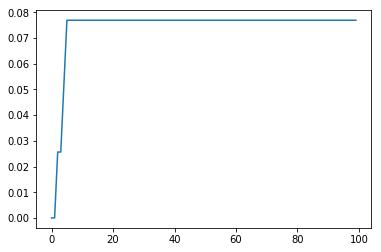

1 86
2 86
3 86
plt


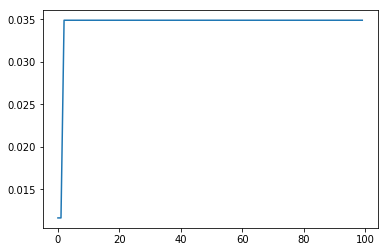

1 25
2 25
3 25
4 25
5 25
6 25
plt


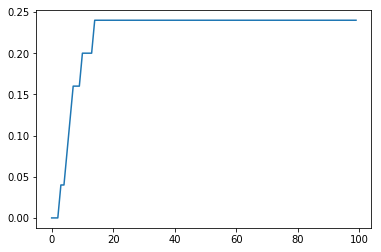

1 55
2 55
3 55
4 55
5 55
6 55
7 55
8 55
9 55
10 55
plt


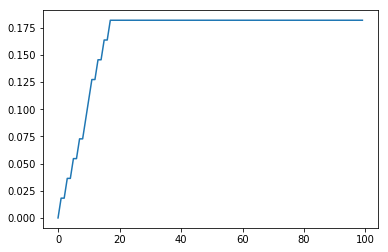

1 440
2 440
plt


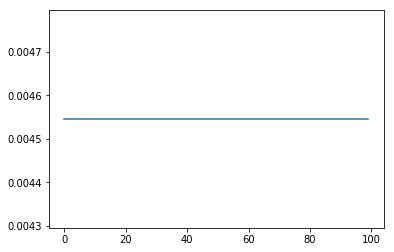

1 77
plt


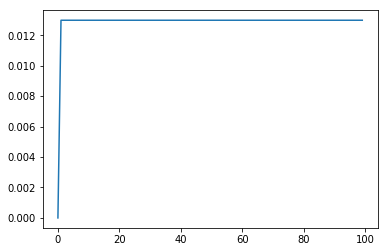

1 147
2 147
3 147
4 147
plt


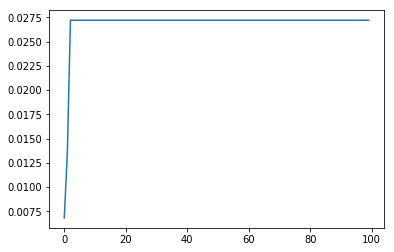

1 29
2 29
3 29
4 29
5 29
6 29
7 29
8 29
9 29
10 29
11 29
plt


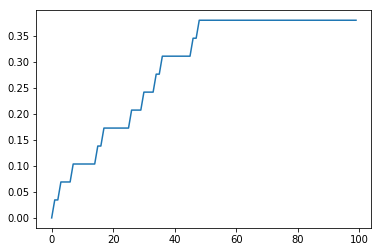

1 52
2 52
plt


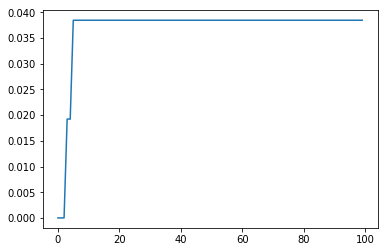

1 90
2 90
3 90
plt


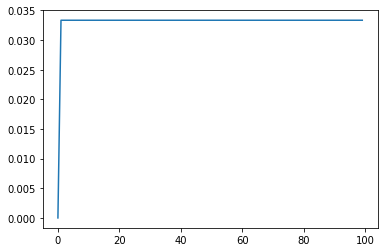

1 49
2 49
3 49
4 49
5 49
6 49
7 49
8 49
9 49
10 49
11 49
12 49
13 49
14 49
15 49
16 49
plt


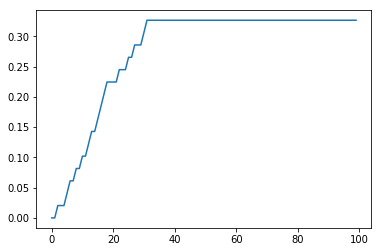

1 76
2 76
3 76
4 76
plt


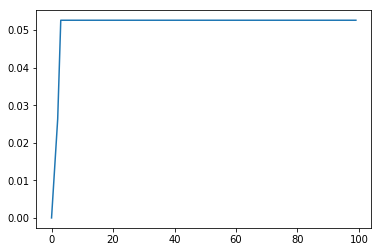

1 553
2 553
3 553
4 553
5 553
6 553
7 553
8 553
9 553
10 553
11 553
12 553
13 553
14 553
15 553
16 553
17 553
18 553
19 553
20 553
plt


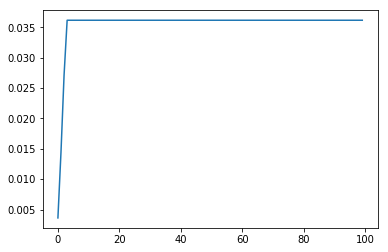

1 43
2 43
plt


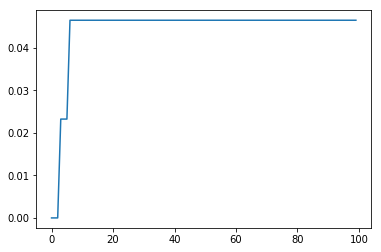

1 314
2 314
3 314
plt


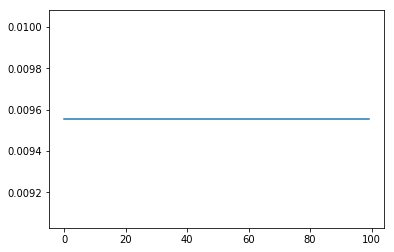

1 37
2 37
3 37
4 37
5 37
6 37
7 37
8 37
9 37
10 37
11 37
12 37
13 37
14 37
15 37
16 37
17 37
18 37
plt


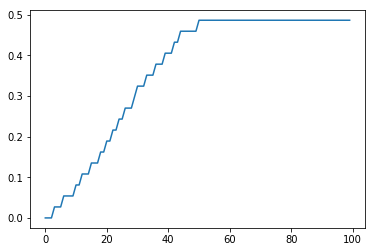

1 58
2 58
plt


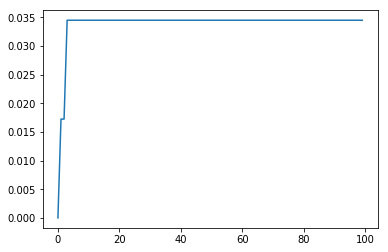

1 40
2 40
plt


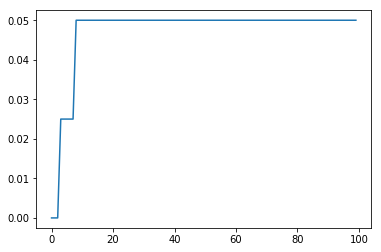

1 71
2 71
3 71
4 71
5 71
plt


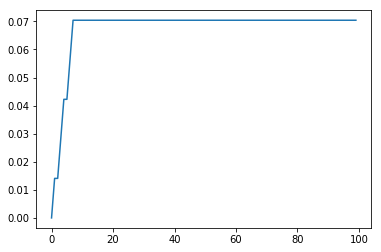

1 111
2 111
plt


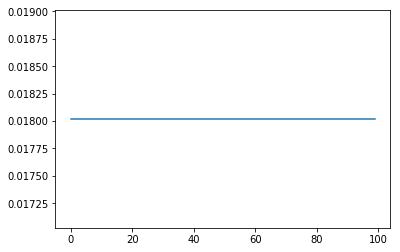

1 54
2 54
3 54
4 54
5 54
6 54
7 54
8 54
9 54
10 54
11 54
12 54
13 54
14 54
15 54
16 54
17 54
plt


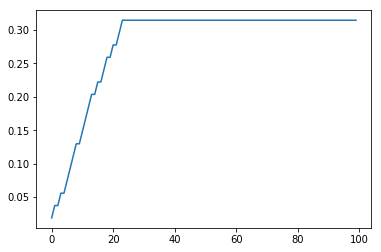

1 66
2 66
3 66
4 66
5 66
6 66
7 66
8 66
9 66
10 66
11 66
12 66
13 66
14 66
15 66
plt


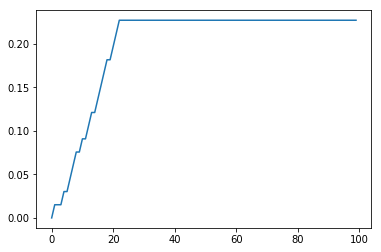

1 93
plt


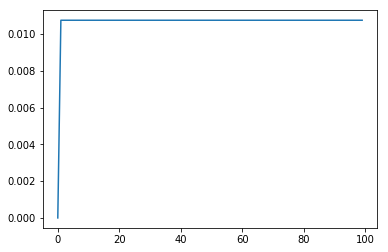

1 37
plt


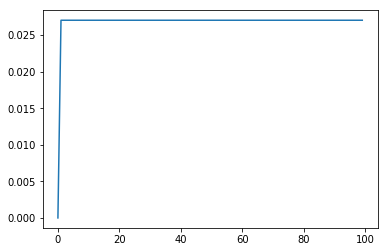

1 43
plt


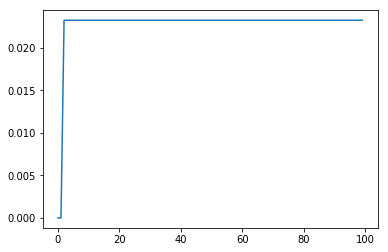

1 65
2 65
3 65
plt


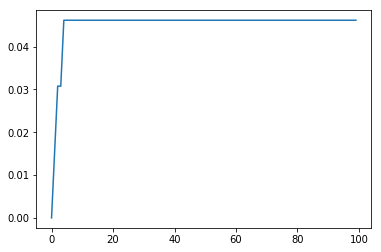

1 256
2 256
3 256
4 256
5 256
plt


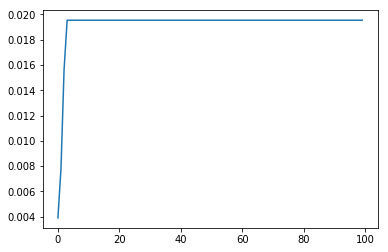

1 45
plt


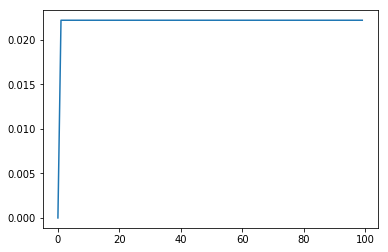

1 42
plt


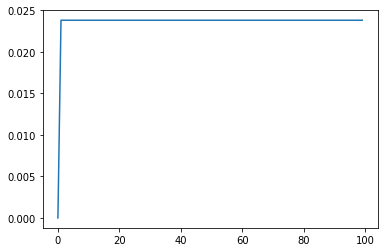

1 29
plt


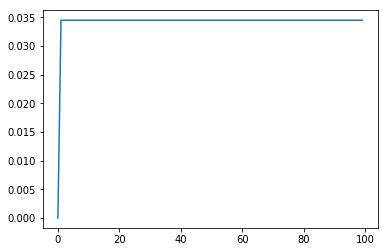

1 62
2 62
3 62
4 62
5 62
6 62
7 62
8 62
9 62
10 62
11 62
12 62
13 62
14 62
15 62
plt


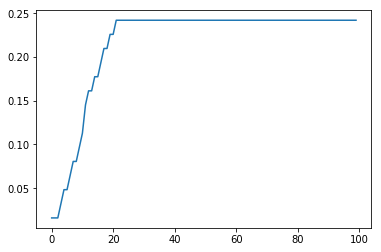

1 41
2 41
3 41
plt


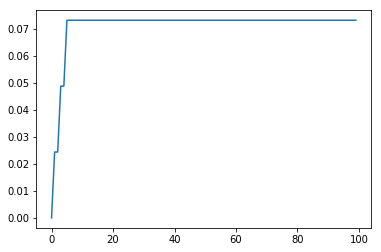

1 45
plt


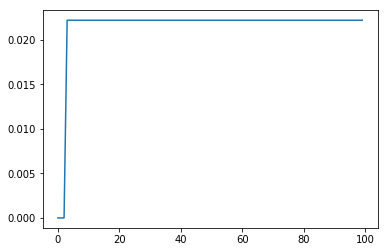

1 237
2 237
3 237
plt


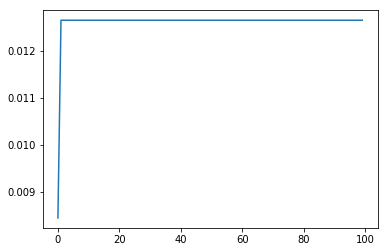

1 71
2 71
3 71
plt


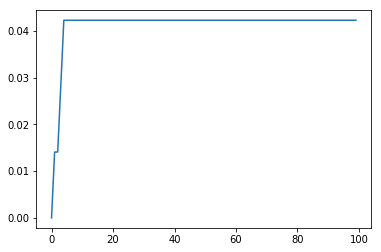

1 48
plt


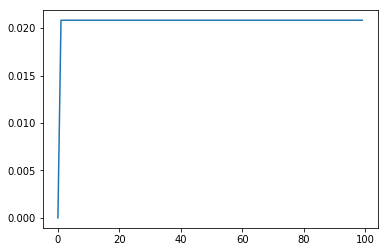

1 53
2 53
3 53
4 53
5 53
6 53
7 53
8 53
plt


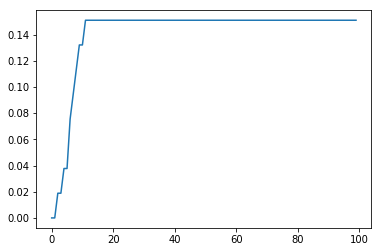

1 67
2 67
plt


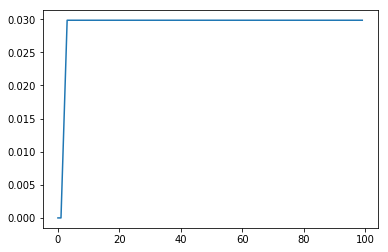

1 60
plt


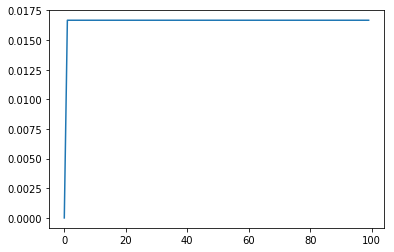

1 83
2 83
3 83
4 83
plt


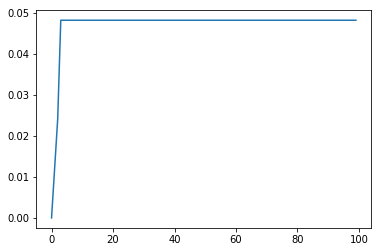

1 47
plt


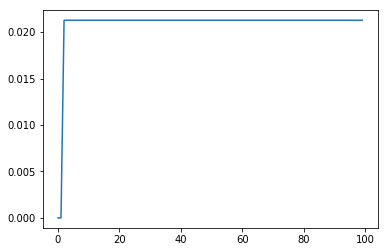

1 63
2 63
3 63
4 63
5 63
6 63
7 63
8 63
9 63
10 63
11 63
12 63
13 63
14 63
15 63
16 63
17 63
18 63
19 63
20 63
21 63
22 63
23 63
24 63
25 63
26 63
27 63
plt


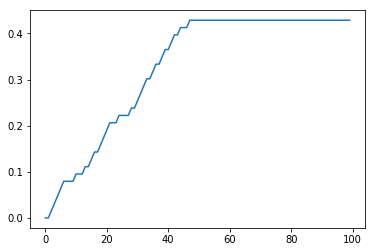

1 66
plt


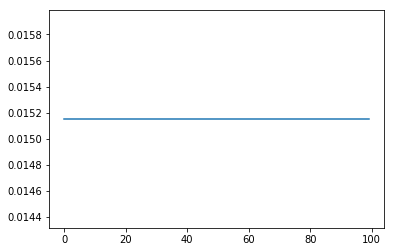

1 51
plt


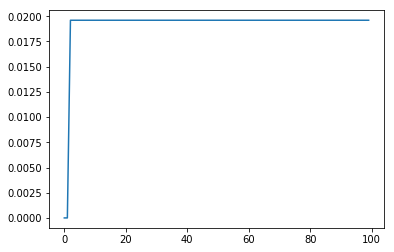

1 54
2 54
3 54
4 54
5 54
6 54
7 54
8 54
9 54
10 54
11 54
12 54
13 54
14 54
15 54
16 54
17 54
18 54
19 54
20 54
21 54
22 54
23 54
24 54
25 54
26 54
27 54
28 54
29 54
30 54
31 54
32 54
33 54
34 54
35 54
36 54
37 54
38 54
39 54
plt


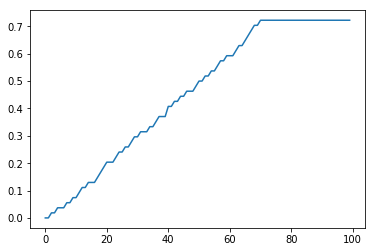

1 48
plt


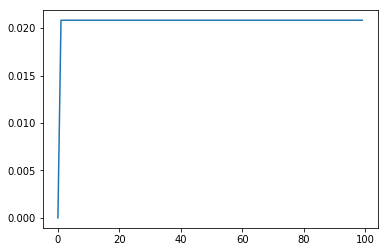

1 185
2 185
3 185
4 185
5 185
6 185
7 185
plt


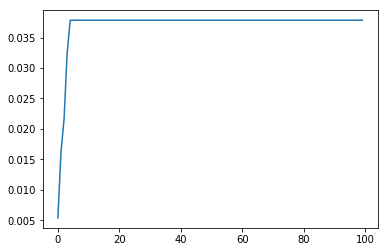

1 35
2 35
plt


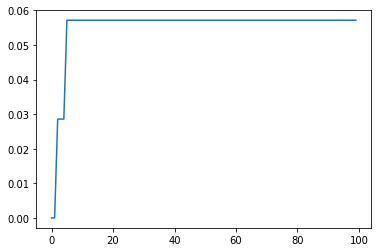

1 38
plt


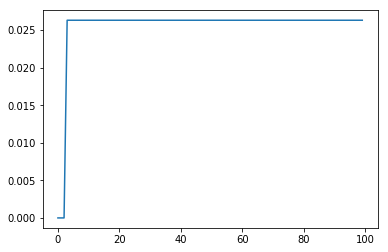

1 117
plt


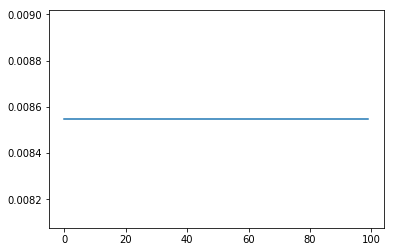

1 43
2 43
3 43
4 43
5 43
6 43
7 43
8 43
9 43
plt


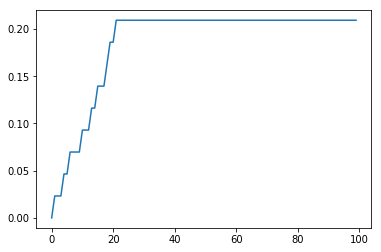

1 67
2 67
3 67
4 67
5 67
6 67
7 67
8 67
9 67
10 67
plt


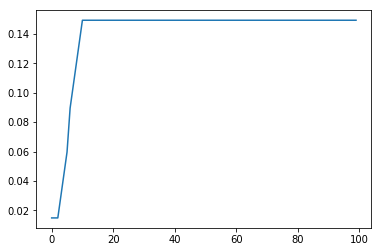

1 50
2 50
3 50
4 50
5 50
6 50
7 50
8 50
9 50
10 50
11 50
12 50
13 50
14 50
15 50
16 50
17 50
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
plt


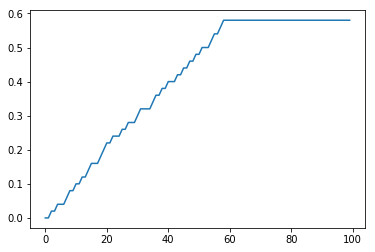

1 51
2 51
3 51
4 51
plt


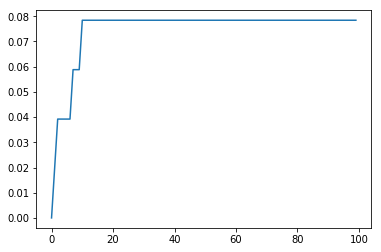

1 49
2 49
3 49
4 49
5 49
6 49
7 49
8 49
9 49
10 49
11 49
12 49
13 49
14 49
15 49
16 49
17 49
18 49
19 49
20 49
21 49
22 49
23 49
24 49
25 49
26 49
27 49
28 49
29 49
30 49
31 49
32 49
33 49
34 49
plt


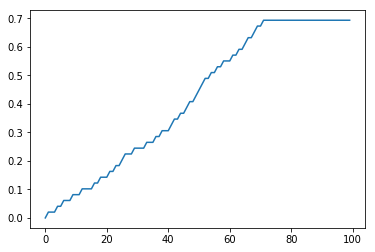

1 26
plt


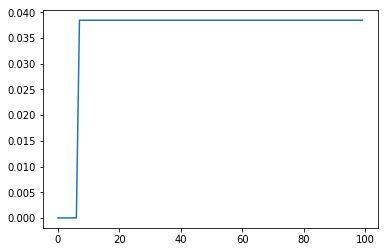

1 463
plt


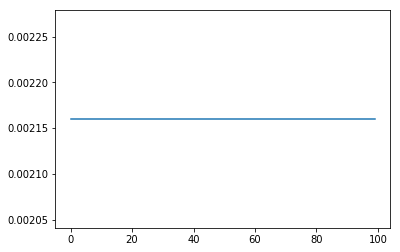

1 23
2 23
3 23
4 23
5 23
6 23
7 23
8 23
9 23
10 23
11 23
12 23
13 23
14 23
15 23
16 23
plt


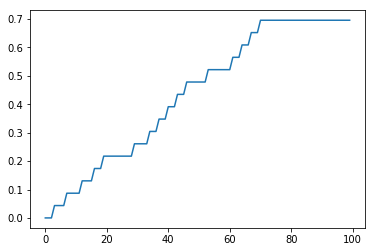

1 58
plt


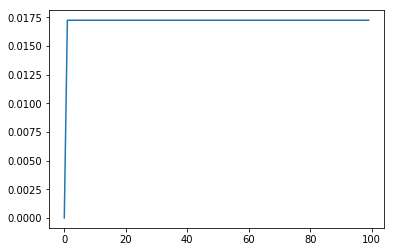

1 131
plt


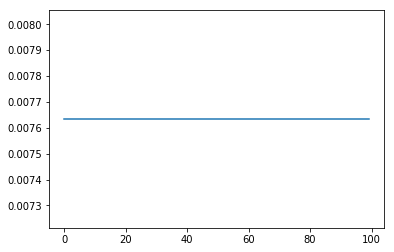

1 113
2 113
plt


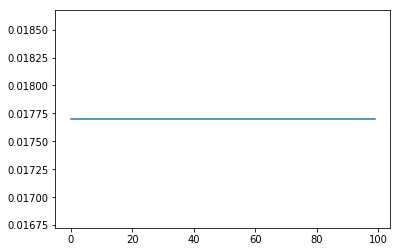

1 100
plt


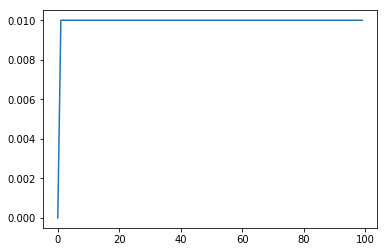

1 55
2 55
plt


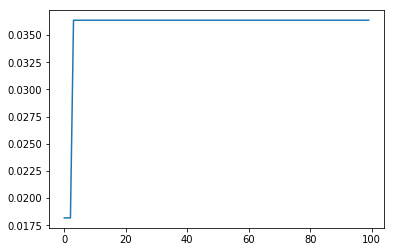

1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
plt


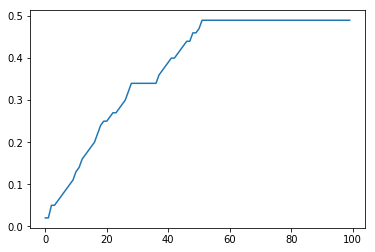

1 6
2 6
plt


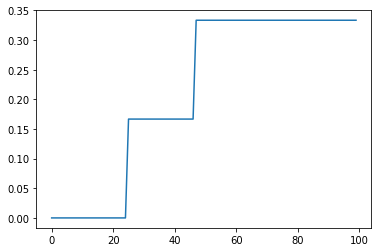

1 33
plt


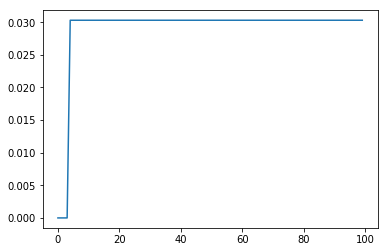

1 91
plt


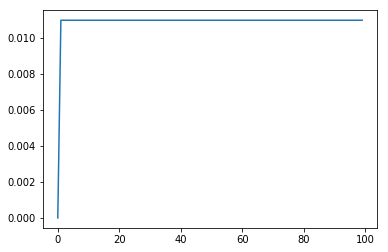

1 20
2 20
3 20
plt


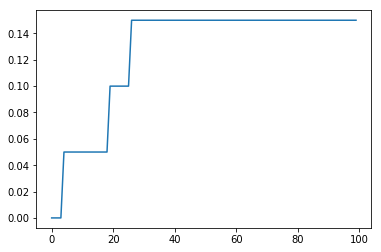

1 24
2 24
plt


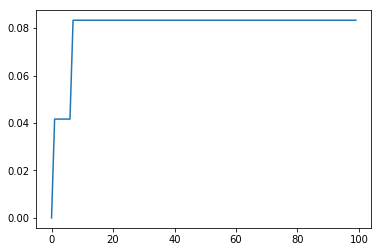

1 48
2 48
3 48
plt


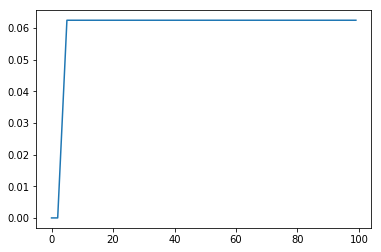

1 39
plt


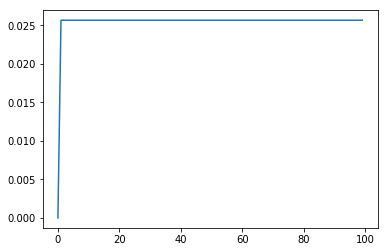

1 38
2 38
3 38
4 38
5 38
6 38
7 38
plt


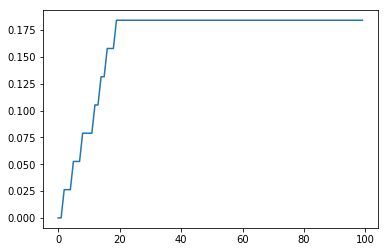

1 22
2 22
plt


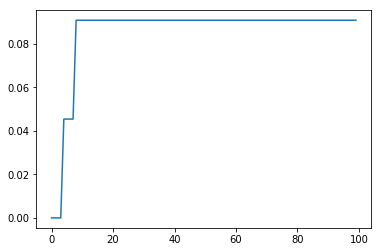

1 121
plt


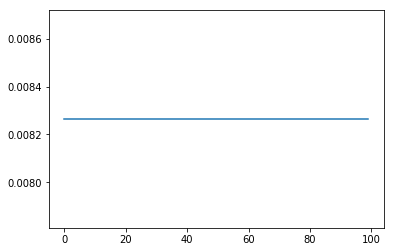

1 181
2 181
3 181
4 181
5 181
6 181
7 181
8 181
9 181
10 181
11 181
12 181
13 181
plt


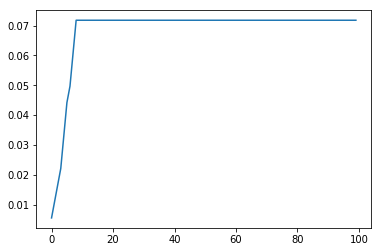

1 63
2 63
3 63
4 63
5 63
6 63
plt


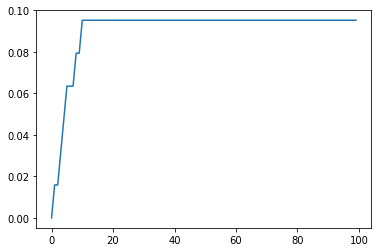

1 63
2 63
3 63
plt


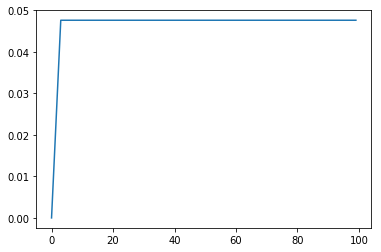

1 36
2 36
3 36
4 36
plt


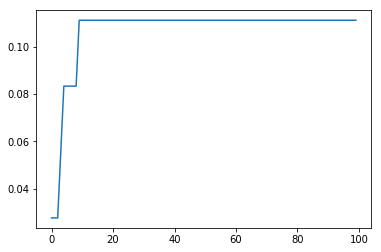

1 55
plt


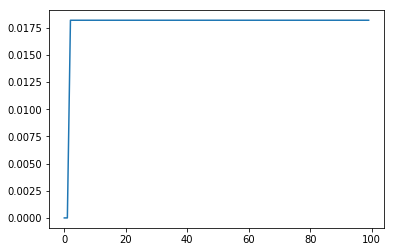

1 51
2 51
3 51
4 51
5 51
plt


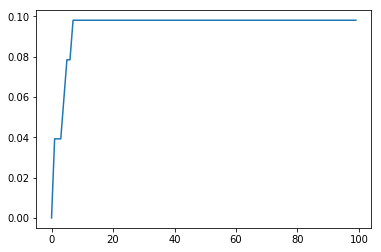

1 67
2 67
3 67
4 67
5 67
6 67
7 67
plt


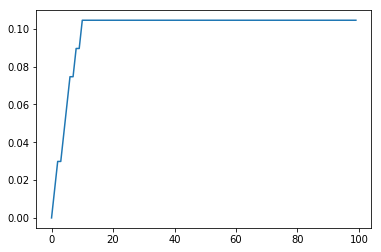

1 117
plt


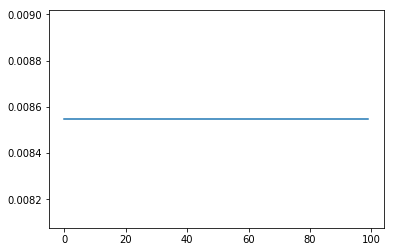

1 168
2 168
3 168
4 168
5 168
6 168
7 168
8 168
9 168
10 168
11 168
12 168
13 168
14 168
15 168
16 168
17 168
18 168
19 168
20 168
21 168
22 168
23 168
24 168
25 168
26 168
27 168
28 168
29 168
30 168
31 168
32 168
33 168
34 168
35 168
36 168
37 168
38 168
39 168
40 168
41 168
42 168
43 168
44 168
45 168
46 168
47 168
48 168
49 168
50 168
51 168
52 168
53 168
54 168
55 168
56 168
plt


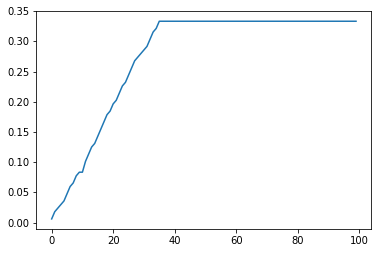

1 35
2 35
plt


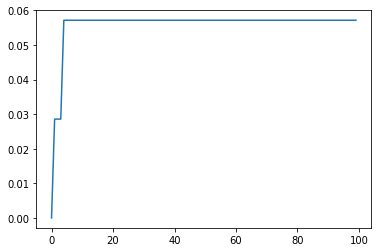

1 91
2 91
plt


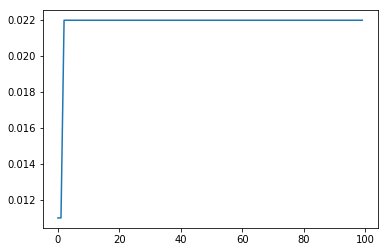

1 88
2 88
plt


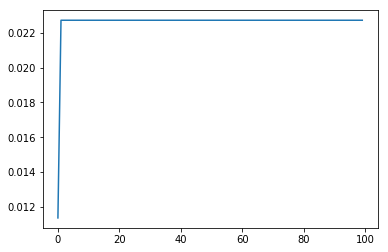

1 34
plt


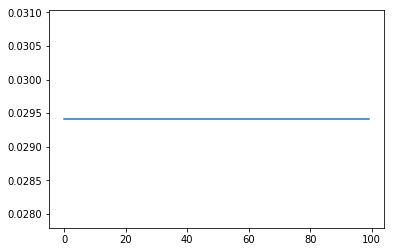

1 82
2 82
3 82
4 82
5 82
6 82
7 82
8 82
9 82
10 82
11 82
12 82
13 82
14 82
15 82
16 82
17 82
18 82
19 82
20 82
plt


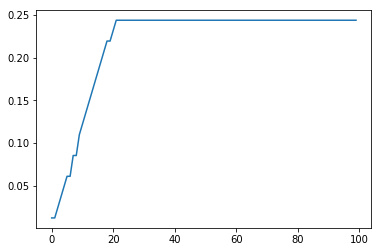

1 249
2 249
3 249
4 249
5 249
6 249
7 249
plt


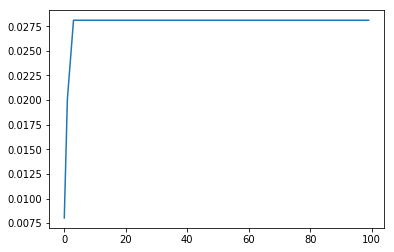

1 50
2 50
3 50
4 50
5 50
plt


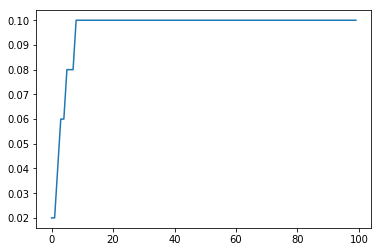

1 69
plt


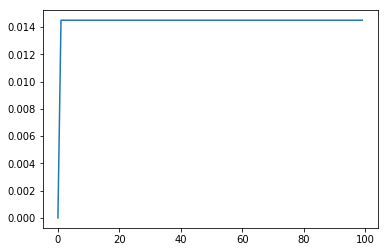

1 30
plt


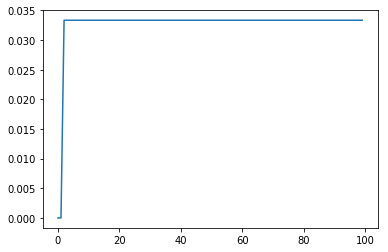

1 43
2 43
3 43
4 43
5 43
6 43
7 43
8 43
plt


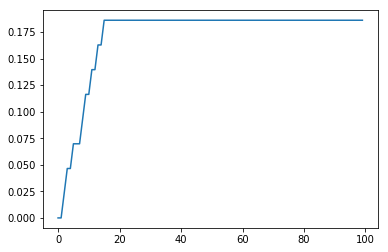

1 68
2 68
plt


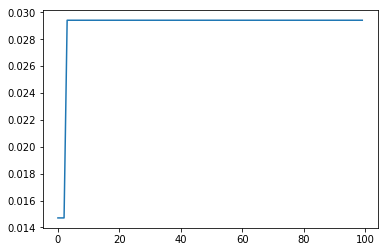

1 105
2 105
3 105
4 105
5 105
6 105
7 105
8 105
9 105
10 105
11 105
12 105
13 105
14 105
15 105
plt


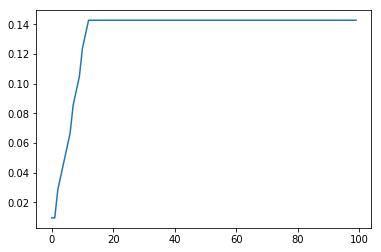

1 52
2 52
3 52
4 52
plt


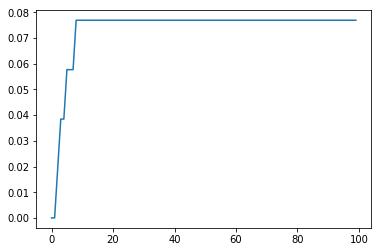

1 16
plt


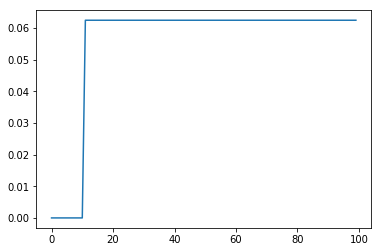

1 51
plt


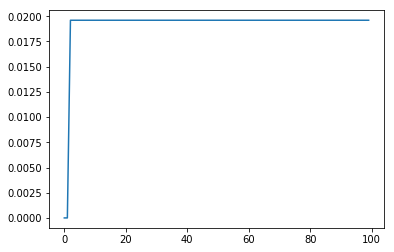

1 33
plt


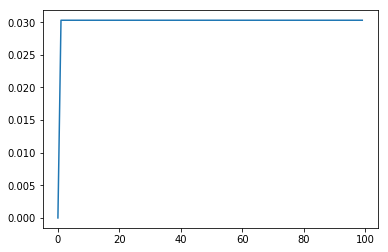

1 46
plt


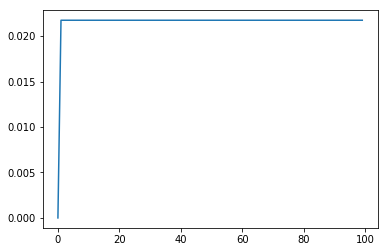

1 173
plt


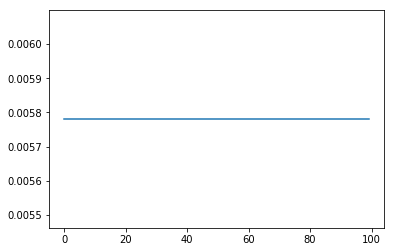

1 36
2 36
plt


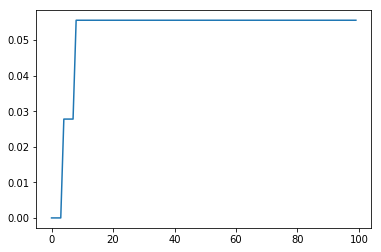

1 63
2 63
plt


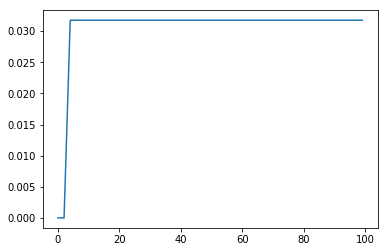

1 48
2 48
plt


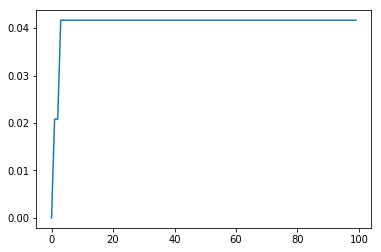

1 403
plt


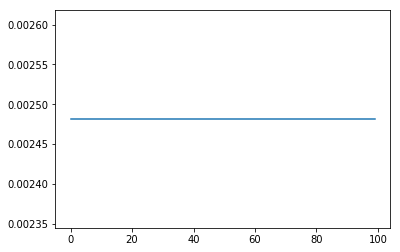

1 81
2 81
plt


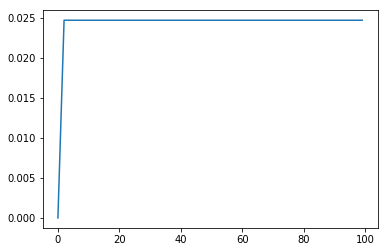

1 59
2 59
3 59
4 59
plt


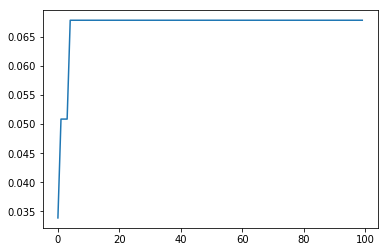

1 93
2 93
3 93
4 93
5 93
6 93
7 93
8 93
9 93
10 93
11 93
12 93
plt


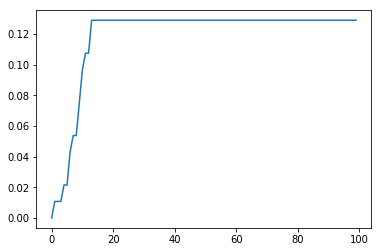

1 45
2 45
3 45
4 45
plt


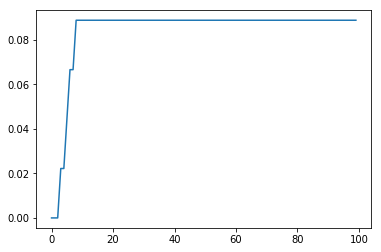

1 189
plt


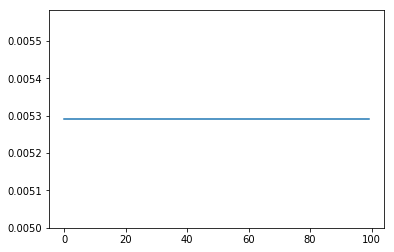

1 282
2 282
plt


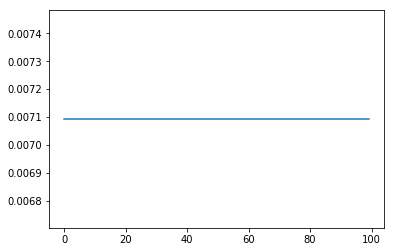

1 70
plt


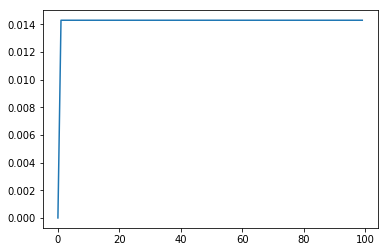

1 48
plt


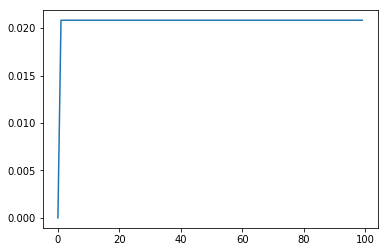

1 375
2 375
3 375
4 375
5 375
6 375
7 375
8 375
9 375
10 375
11 375
12 375
13 375
14 375
15 375
16 375
17 375
18 375
19 375
20 375
21 375
22 375
23 375
24 375
25 375
26 375
27 375
28 375
29 375
30 375
31 375
32 375
33 375
34 375
35 375
36 375
37 375
38 375
39 375
40 375
41 375
42 375
43 375
44 375
45 375
46 375
47 375
48 375
49 375
50 375
51 375
52 375
53 375
54 375
55 375
56 375
57 375
58 375
59 375
60 375
61 375
62 375
63 375
64 375
65 375
66 375
67 375
68 375
69 375
70 375
71 375
72 375
73 375
74 375
75 375
76 375
77 375
78 375
79 375
80 375
81 375
82 375
83 375
84 375
85 375
86 375
87 375
88 375
89 375
90 375
91 375
92 375
93 375
94 375
95 375
96 375
97 375
98 375
99 375
100 375
101 375
102 375
103 375
104 375
105 375
106 375
107 375
108 375
109 375
110 375
111 375
112 375
113 375
114 375
115 375
116 375
117 375
118 375
119 375
120 375
121 375
122 375
123 375
124 375
125 375
126 375
127 375
128 375
129 375
130 375
131 375
132 375
133 375
134 375
135 375
136 375
137 375
138 375
139 

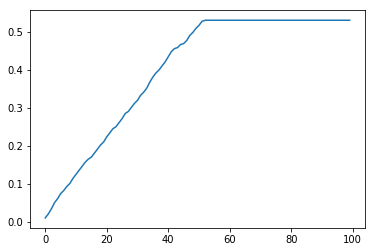

1 60
plt


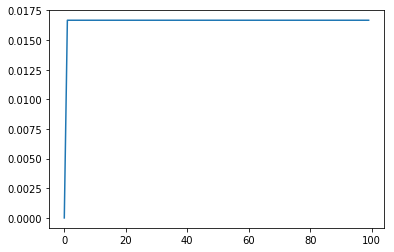

1 18
2 18
3 18
plt


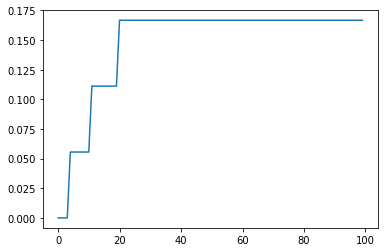

1 27
2 27
3 27
4 27
5 27
6 27
7 27
8 27
9 27
10 27
11 27
12 27
13 27
14 27
15 27
16 27
17 27
plt


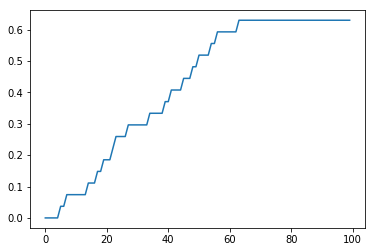

1 94
2 94
3 94
plt


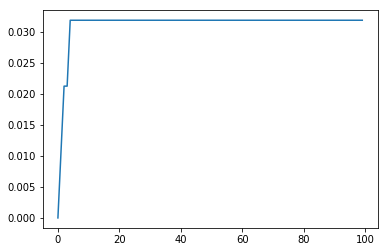

1 118
2 118
3 118
plt


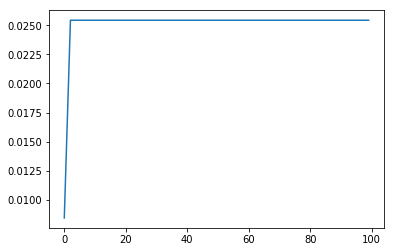

1 60
2 60
3 60
4 60
plt


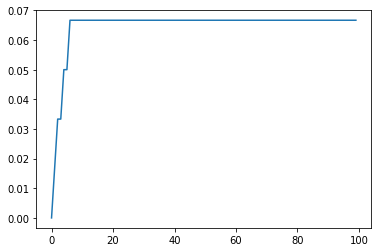

1 196
2 196
3 196
4 196
5 196
6 196
7 196
8 196
9 196
10 196
11 196
12 196
13 196
14 196
15 196
16 196
17 196
18 196
19 196
20 196
21 196
22 196
23 196
24 196
25 196
26 196
27 196
28 196
29 196
30 196
31 196
32 196
33 196
34 196
35 196
36 196
37 196
38 196
39 196
40 196
41 196
42 196
43 196
44 196
45 196
46 196
47 196
48 196
49 196
50 196
51 196
52 196
53 196
54 196
55 196
56 196
57 196
58 196
59 196
60 196
61 196
62 196
63 196
64 196
65 196
66 196
67 196
68 196
69 196
70 196
71 196
72 196
73 196
74 196
75 196
76 196
77 196
78 196
79 196
80 196
81 196
82 196
83 196
84 196
85 196
86 196
87 196
88 196
89 196
90 196
91 196
92 196
93 196
94 196
95 196
96 196
97 196
98 196
99 196
100 196
101 196
102 196
103 196
104 196
105 196
106 196
107 196
108 196
109 196
110 196
111 196
112 196
113 196
114 196
115 196
116 196
117 196
118 196
119 196
120 196
121 196
122 196
123 196
plt


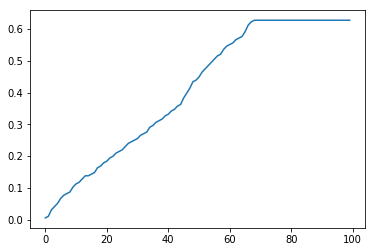

1 78
2 78
plt


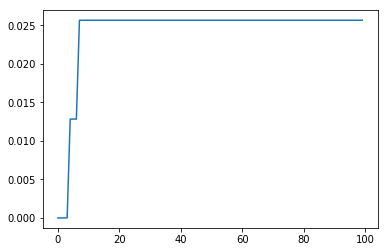

1 45
plt


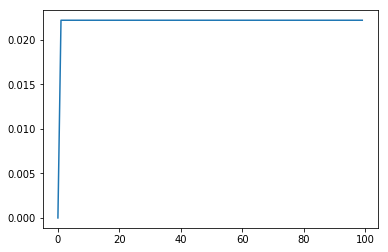

1 58
2 58
3 58
4 58
5 58
6 58
7 58
8 58
9 58
10 58
11 58
12 58
13 58
14 58
15 58
16 58
17 58
18 58
19 58
20 58
21 58
22 58
23 58
24 58
25 58
26 58
plt


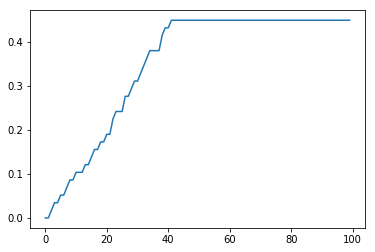

1 62
2 62
plt


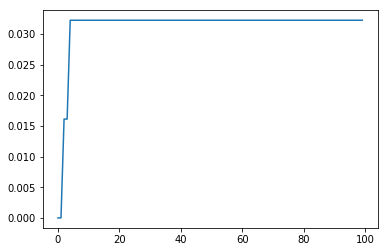

1 95
plt


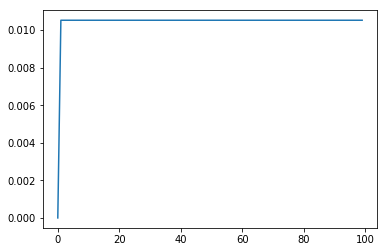

1 37
plt


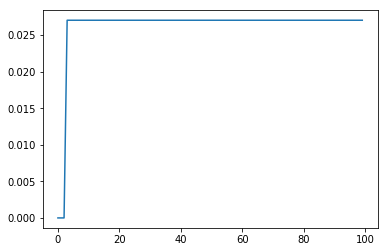

1 75
2 75
3 75
4 75
5 75
6 75
7 75
8 75
9 75
10 75
11 75
12 75
13 75
14 75
15 75
16 75
17 75
18 75
19 75
20 75
21 75
22 75
23 75
24 75
25 75
26 75
27 75
plt


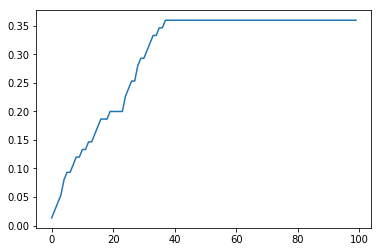

1 199
plt


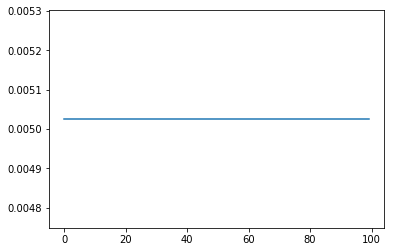

1 25
plt


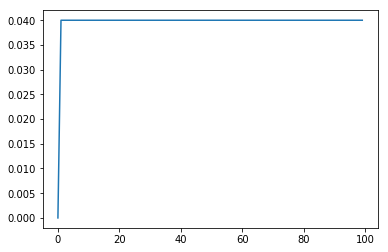

1 49
2 49
3 49
4 49
5 49
6 49
7 49
8 49
9 49
10 49
11 49
12 49
13 49
14 49
15 49
16 49
17 49
18 49
19 49
20 49
21 49
22 49
23 49
24 49
25 49
26 49
27 49
28 49
29 49
30 49
31 49
32 49
33 49
34 49
35 49
36 49
37 49
plt


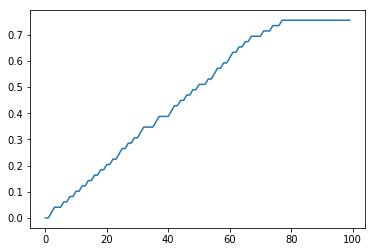

1 1216
plt


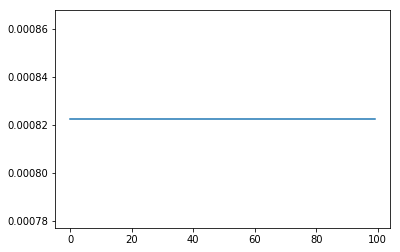

1 96
2 96
3 96
4 96
5 96
plt


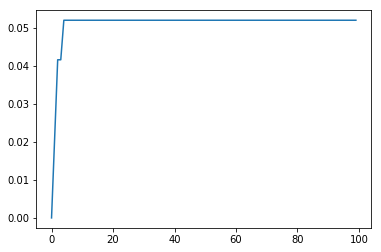

1 181
plt


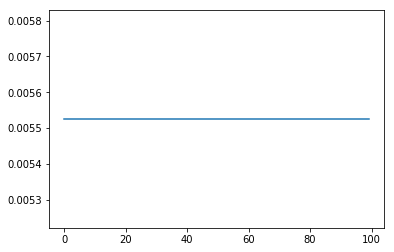

1 69
2 69
3 69
4 69
plt


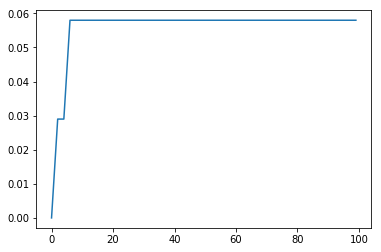

1 51
2 51
3 51
4 51
5 51
plt


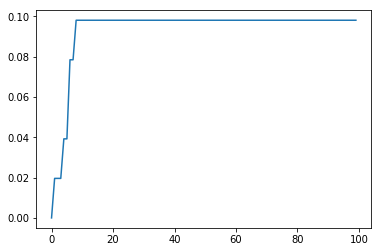

1 134
2 134
plt


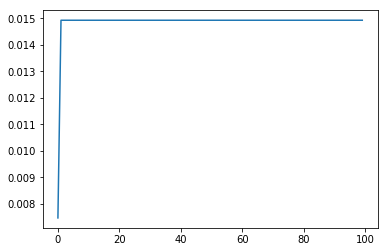

1 62
plt


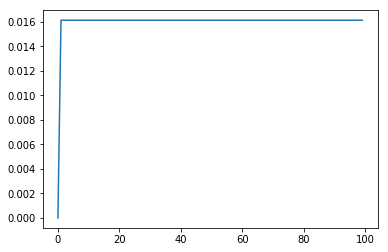

1 46
2 46
plt


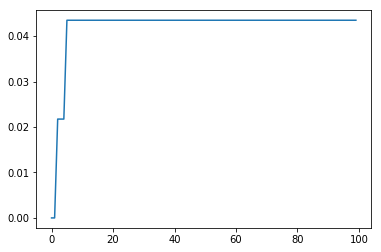

1 54
plt


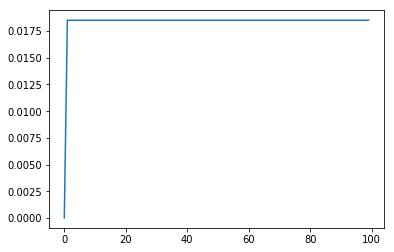

1 47
2 47
3 47
4 47
plt


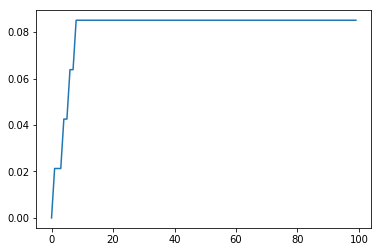

1 61
plt


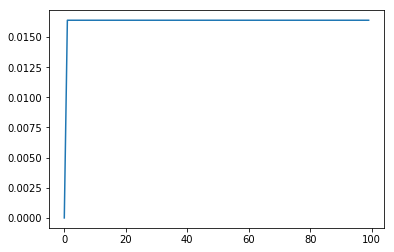

1 109
2 109
3 109
4 109
5 109
6 109
7 109
8 109
9 109
10 109
11 109
12 109
plt


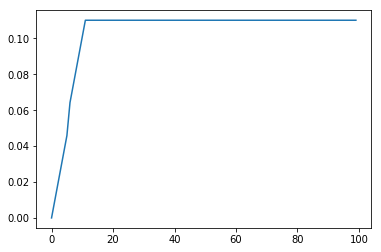

1 78
plt


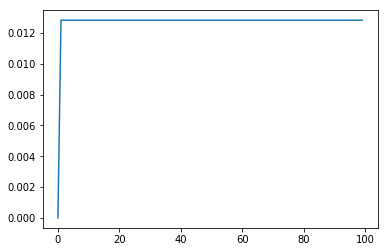

1 67
2 67
3 67
4 67
5 67
plt


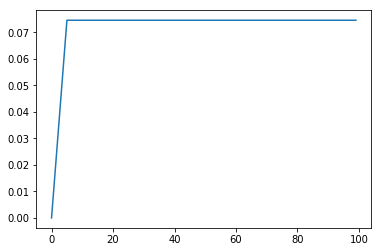

1 107
2 107
plt


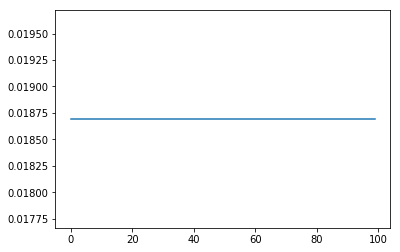

1 52
plt


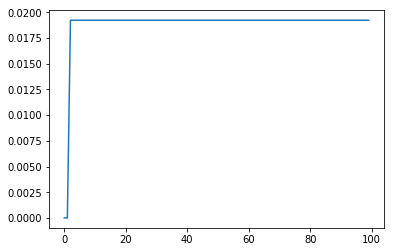

1 50
plt


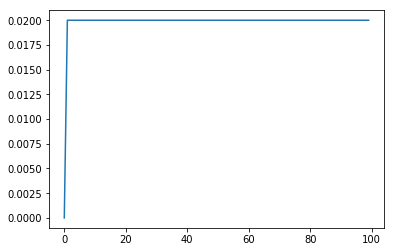

1 92
plt


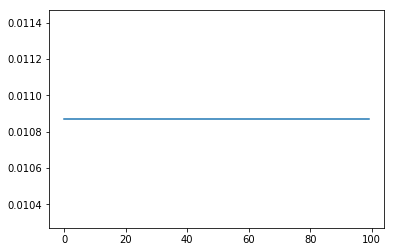

1 270
2 270
3 270
4 270
5 270
6 270
7 270
8 270
9 270
10 270
11 270
12 270
13 270
14 270
15 270
16 270
plt


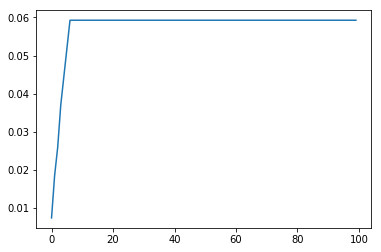

1 46
plt


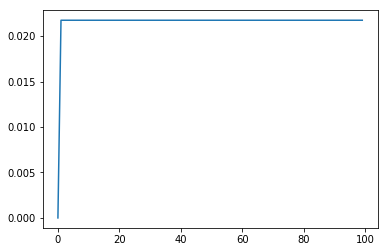

1 1192
2 1192
3 1192
4 1192
5 1192
6 1192
7 1192
8 1192
9 1192
10 1192
11 1192
12 1192
13 1192
14 1192
15 1192
16 1192
17 1192
18 1192
19 1192
20 1192
21 1192
22 1192
23 1192
24 1192
25 1192
26 1192
27 1192
28 1192
29 1192
30 1192
31 1192
32 1192
33 1192
34 1192
35 1192
36 1192
37 1192
38 1192
39 1192
40 1192
41 1192
42 1192
43 1192
44 1192
45 1192
46 1192
47 1192
48 1192
49 1192
50 1192
51 1192
52 1192
53 1192
54 1192
55 1192
56 1192
57 1192
58 1192
59 1192
60 1192
61 1192
62 1192
63 1192
64 1192
65 1192
66 1192
67 1192
68 1192
69 1192
70 1192
71 1192
72 1192
73 1192
74 1192
75 1192
76 1192
77 1192
78 1192
79 1192
80 1192
81 1192
82 1192
83 1192
84 1192
85 1192
86 1192
87 1192
88 1192
89 1192
90 1192
91 1192
92 1192
93 1192
94 1192
95 1192
96 1192
97 1192
98 1192
99 1192
100 1192
101 1192
102 1192
103 1192
104 1192
105 1192
106 1192
107 1192
108 1192
109 1192
110 1192
111 1192
112 1192
113 1192
114 1192
115 1192
116 1192
117 1192
118 1192
119 1192
120 1192
121 1192
122 1192
123 1192
1

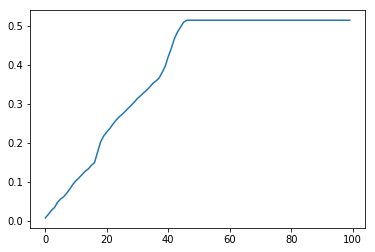

1 67
2 67
plt


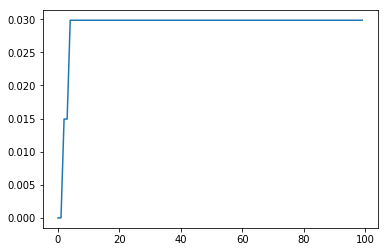

1 64
2 64
3 64
4 64
5 64
6 64
7 64
8 64
9 64
10 64
11 64
12 64
13 64
14 64
15 64
16 64
17 64
plt


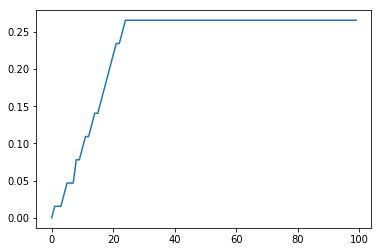

1 92
2 92
3 92
plt


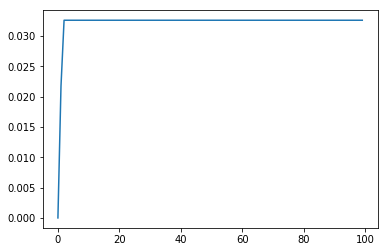

1 42
plt


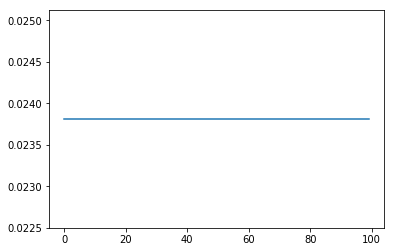

1 57
plt


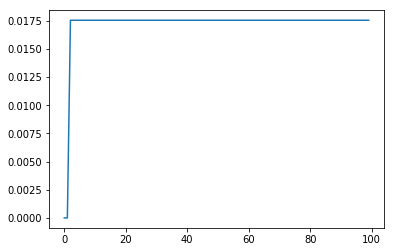

1 119
plt


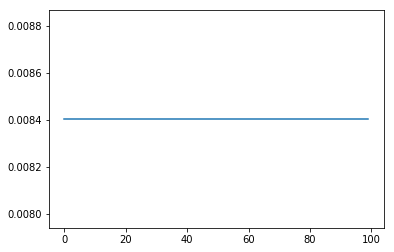

1 97
2 97
3 97
plt


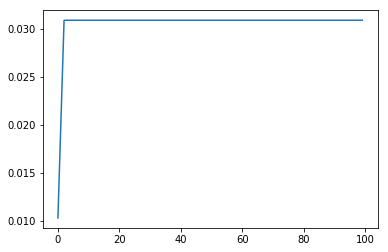

1 151
plt


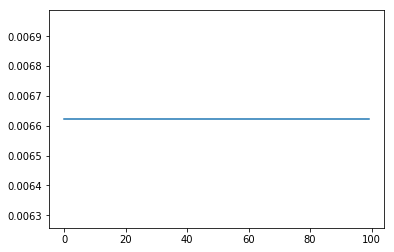

1 456
plt


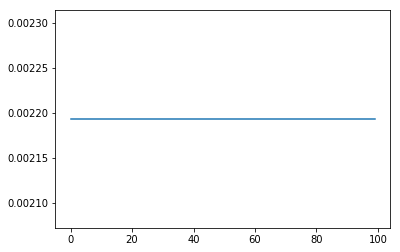

1 84
2 84
3 84
4 84
plt


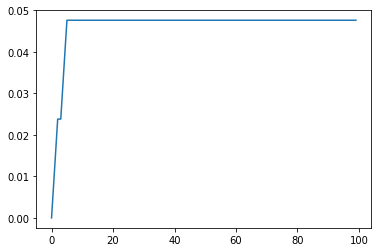

1 27
plt


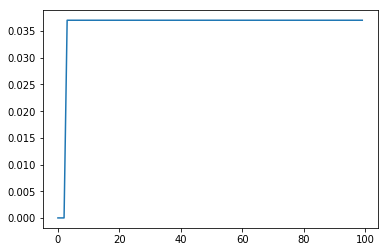

1 84
2 84
plt


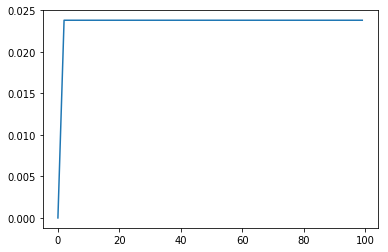

1 74
plt


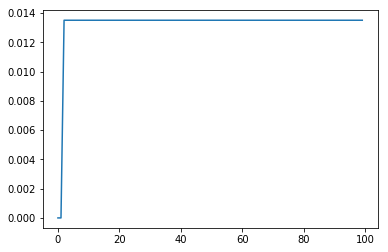

1 102
plt


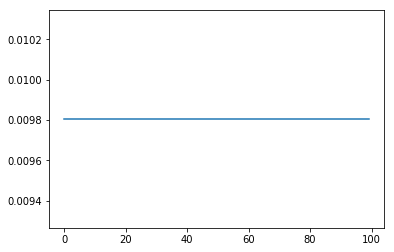

1 73
plt


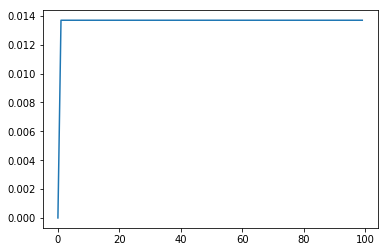

1 128
plt


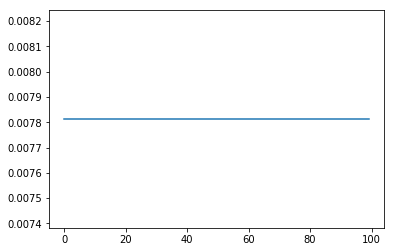

1 34
plt


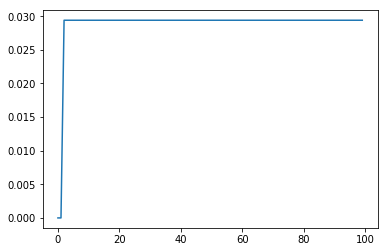

1 53
plt


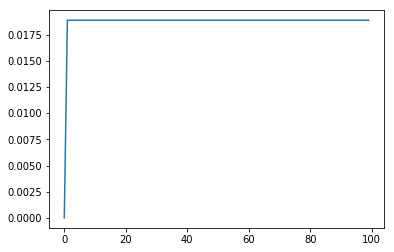

1 55
2 55
3 55
4 55
plt


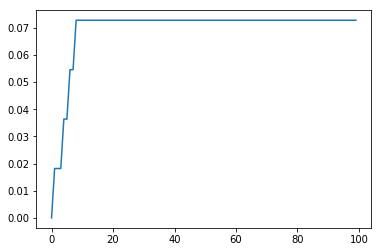

1 45
2 45
3 45
plt


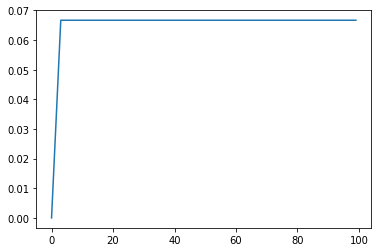

1 40
2 40
plt


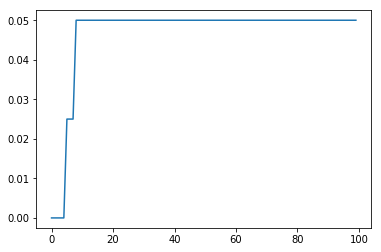

1 57
2 57
plt


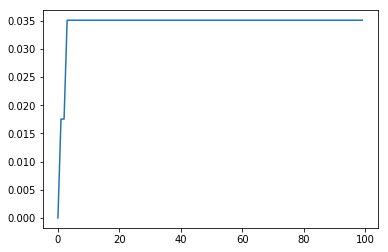

1 59
2 59
plt


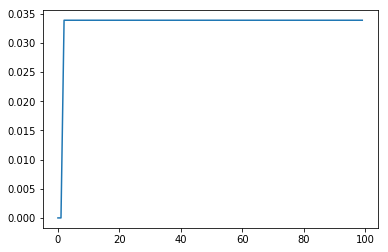

1 66
2 66
3 66
4 66
5 66
6 66
plt


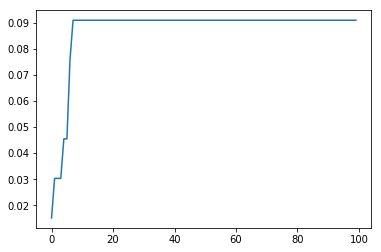

1 71
2 71
3 71
4 71
5 71
6 71
7 71
8 71
9 71
10 71
11 71
12 71
13 71
14 71
15 71
16 71
17 71
18 71
19 71
20 71
21 71
22 71
23 71
24 71
25 71
26 71
27 71
28 71
29 71
30 71
31 71
32 71
33 71
34 71
35 71
36 71
37 71
38 71
39 71
40 71
41 71
42 71
43 71
44 71
45 71
46 71
47 71
48 71
49 71
50 71
plt


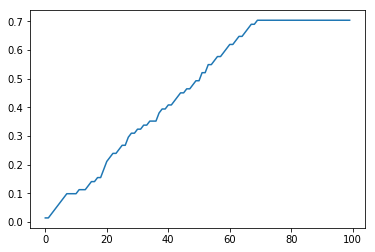

1 49
2 49
3 49
plt


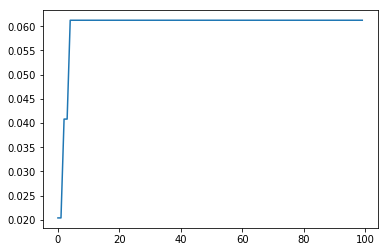

1 144
2 144
3 144
plt


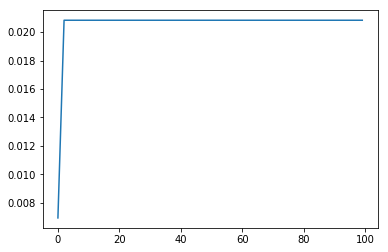

1 62
2 62
3 62
4 62
5 62
6 62
plt


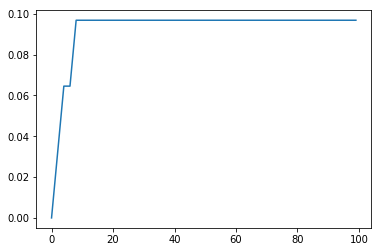

1 44
plt


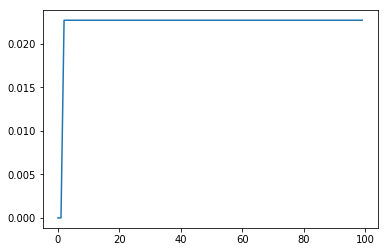

1 167
2 167
plt


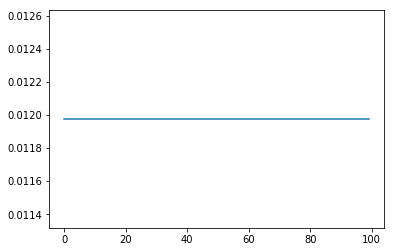

1 92
plt


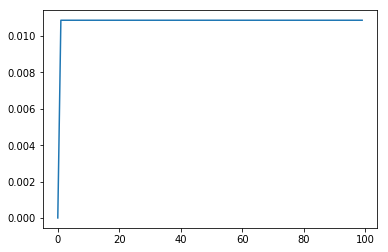

1 67
2 67
plt


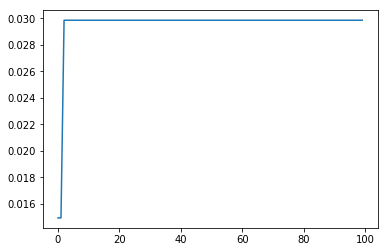

1 101
plt


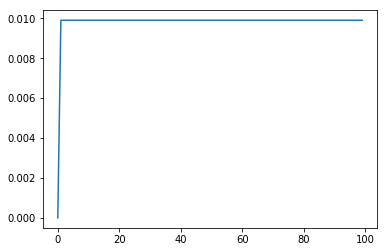

1 44
2 44
3 44
4 44
5 44
6 44
7 44
plt


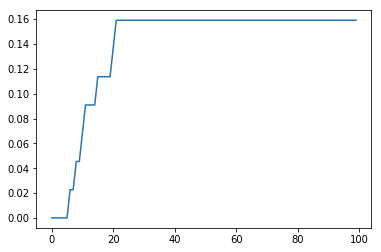

dest mpgravity.csv division by zero
1 171
plt


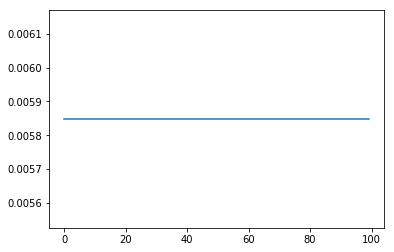

1 35
2 35
3 35
4 35
5 35
6 35
7 35
plt


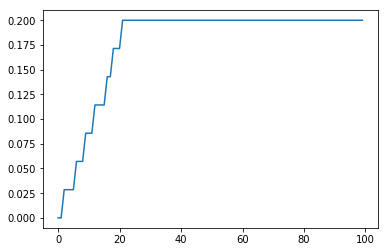

1 92
2 92
plt


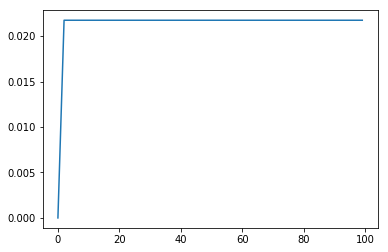

1 118
2 118
3 118
plt


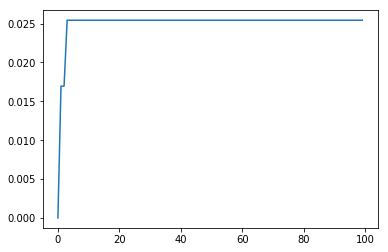

1 141
2 141
3 141
4 141
5 141
plt


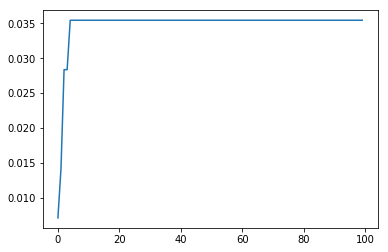

1 860
2 860
plt


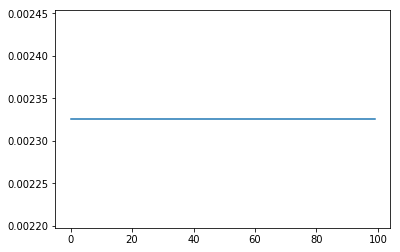

1 332
plt


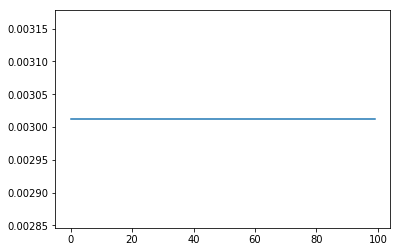

1 42
2 42
3 42
plt


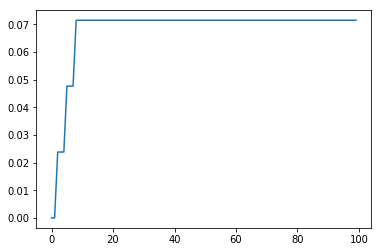

1 39
2 39
3 39
4 39
5 39
6 39
plt


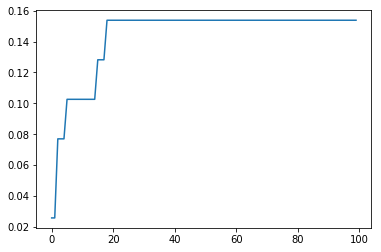

1 96
2 96
3 96
4 96
5 96
plt


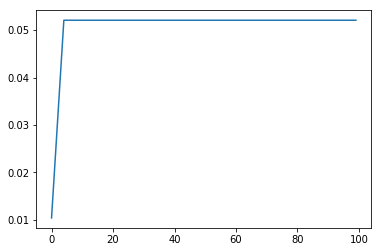

1 30
2 30
3 30
plt


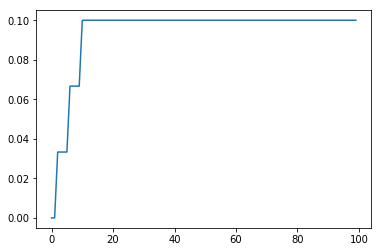

1 134
2 134
3 134
plt


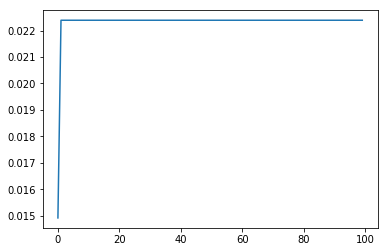

1 71
2 71
3 71
4 71
plt


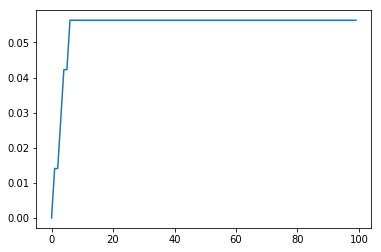

1 61
plt


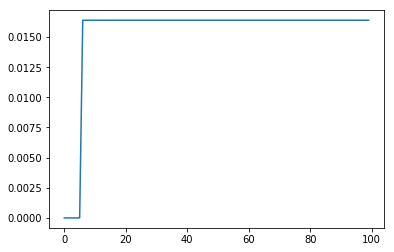

1 201
2 201
3 201
4 201
plt


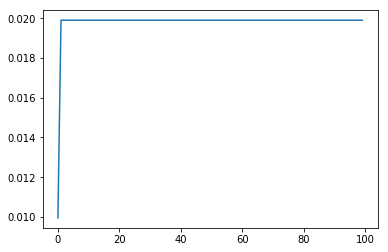

1 253
2 253
3 253
4 253
5 253
6 253
7 253
8 253
9 253
10 253
11 253
12 253
13 253
14 253
15 253
16 253
17 253
18 253
19 253
20 253
21 253
22 253
23 253
24 253
25 253
26 253
27 253
28 253
29 253
30 253
31 253
32 253
33 253
34 253
35 253
36 253
37 253
38 253
39 253
40 253
41 253
42 253
43 253
44 253
45 253
46 253
47 253
48 253
49 253
50 253
51 253
52 253
53 253
54 253
55 253
56 253
57 253
58 253
59 253
60 253
61 253
62 253
63 253
64 253
65 253
66 253
67 253
68 253
69 253
70 253
71 253
72 253
plt


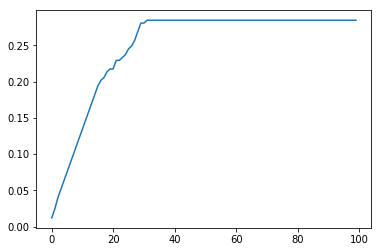

1 63
2 63
3 63
4 63
5 63
6 63
7 63
plt


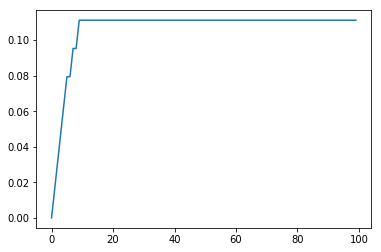

1 338
2 338
3 338
4 338
5 338
6 338
7 338
8 338
9 338
10 338
11 338
plt


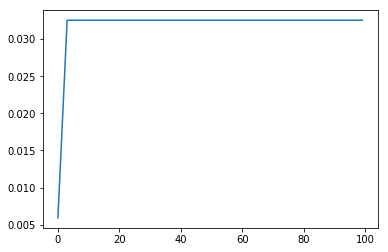

1 196
plt


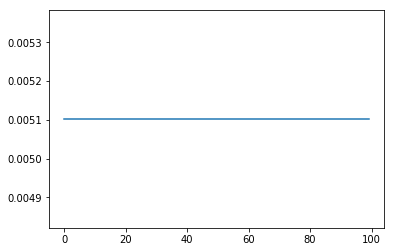

1 140
plt


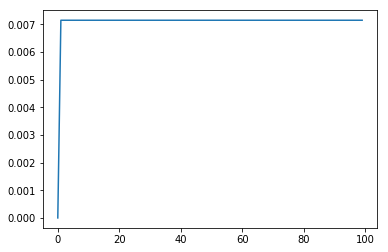

1 32
2 32
plt


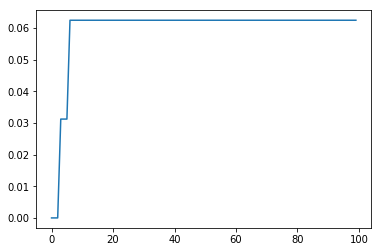

1 75
plt


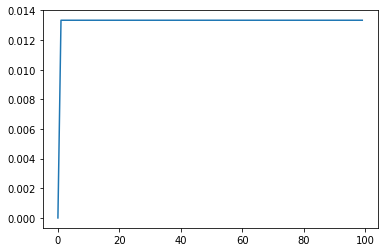

1 168
2 168
3 168
4 168
5 168
6 168
7 168
8 168
9 168
10 168
11 168
12 168
13 168
14 168
15 168
16 168
17 168
18 168
19 168
20 168
21 168
22 168
23 168
24 168
25 168
26 168
27 168
28 168
29 168
30 168
31 168
32 168
33 168
34 168
35 168
36 168
37 168
38 168
39 168
plt


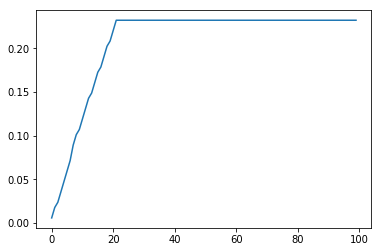

1 53
2 53
3 53
4 53
5 53
6 53
7 53
8 53
9 53
10 53
11 53
12 53
13 53
14 53
15 53
16 53
17 53
18 53
19 53
20 53
21 53
22 53
23 53
24 53
25 53
26 53
27 53
28 53
plt


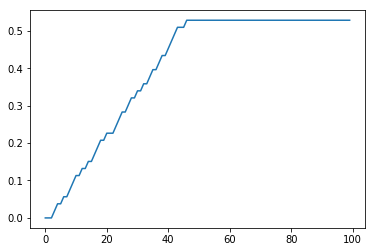

1 103
2 103
3 103
4 103
5 103
6 103
7 103
8 103
9 103
10 103
11 103
12 103
13 103
14 103
15 103
16 103
17 103
18 103
19 103
20 103
21 103
22 103
23 103
24 103
25 103
26 103
27 103
28 103
29 103
30 103
31 103
32 103
33 103
34 103
35 103
36 103
37 103
38 103
39 103
40 103
41 103
42 103
43 103
44 103
45 103
46 103
47 103
48 103
49 103
50 103
51 103
52 103
53 103
54 103
55 103
56 103
57 103
58 103
59 103
60 103
61 103
62 103
63 103
64 103
65 103
66 103
67 103
68 103
69 103
70 103
71 103
72 103
73 103
74 103
75 103
76 103
77 103
78 103
79 103
80 103
81 103
82 103
83 103
84 103
85 103
86 103
plt


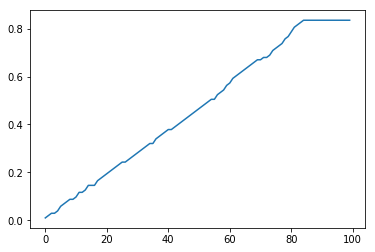

1 33
2 33
3 33
4 33
5 33
plt


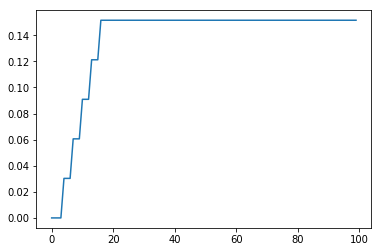

1 298
plt


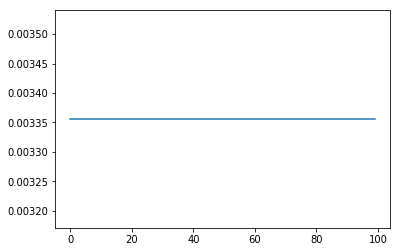

1 130
2 130
3 130
4 130
plt


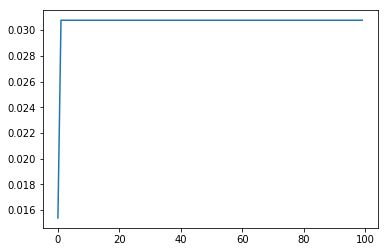

1 39
2 39
3 39
4 39
5 39
6 39
7 39
8 39
9 39
10 39
plt


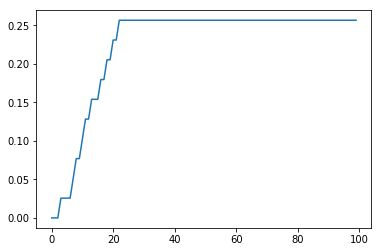

1 69
2 69
3 69
plt


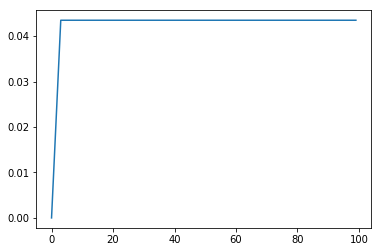

1 36
2 36
3 36
4 36
plt


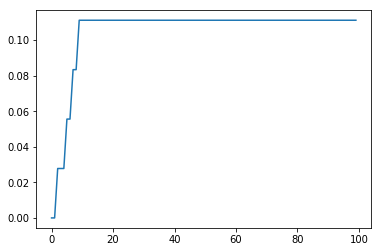

1 77
2 77
3 77
4 77
5 77
6 77
7 77
8 77
9 77
10 77
11 77
12 77
13 77
14 77
15 77
plt


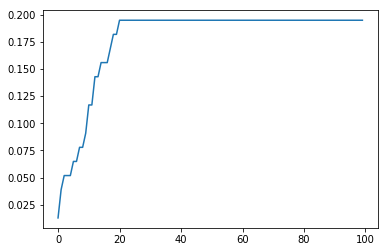

1 305
2 305
plt


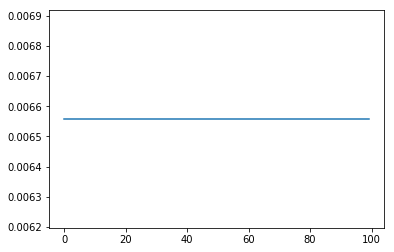

1 32
plt


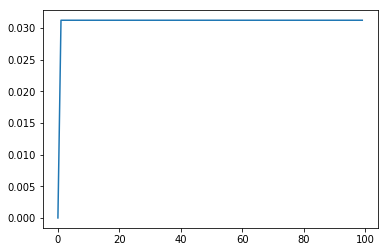

1 44
plt


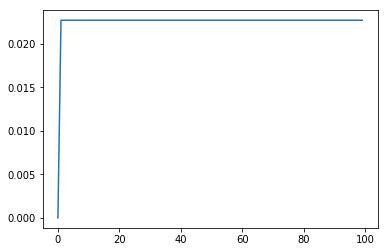

1 48
2 48
3 48
4 48
5 48
6 48
7 48
8 48
9 48
10 48
11 48
12 48
13 48
14 48
15 48
16 48
plt


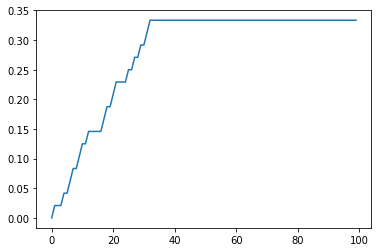

1 51
2 51
plt


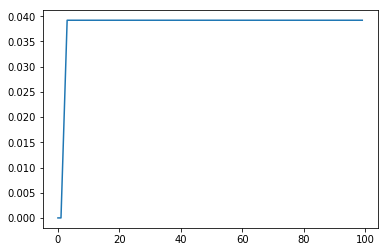

1 62
2 62
plt


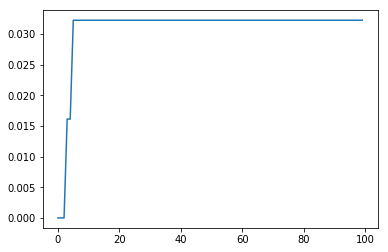

1 62
2 62
3 62
4 62
plt


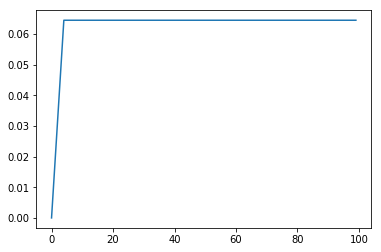

1 181
2 181
3 181
4 181
plt


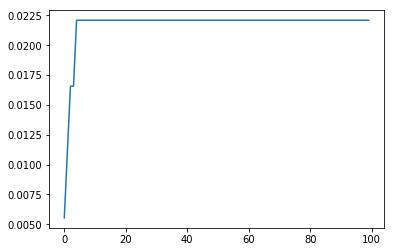

1 39
2 39
3 39
4 39
5 39
6 39
7 39
8 39
9 39
10 39
11 39
12 39
13 39
14 39
15 39
16 39
17 39
18 39
plt


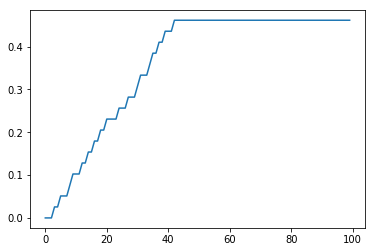

1 21
plt


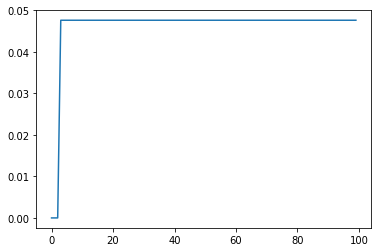

1 63
2 63
plt


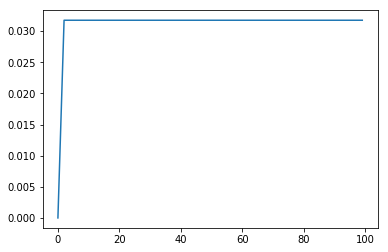

1 70
2 70
3 70
4 70
5 70
6 70
7 70
8 70
9 70
10 70
11 70
12 70
13 70
14 70
15 70
16 70
17 70
18 70
19 70
20 70
21 70
22 70
23 70
24 70
25 70
26 70
27 70
28 70
29 70
30 70
31 70
32 70
33 70
34 70
35 70
36 70
37 70
38 70
39 70
40 70
41 70
42 70
43 70
44 70
45 70
46 70
47 70
48 70
49 70
50 70
51 70
plt


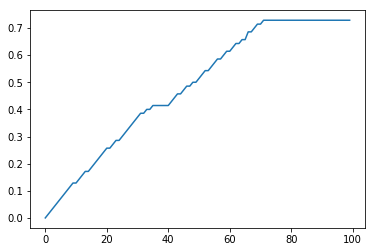

1 166
plt


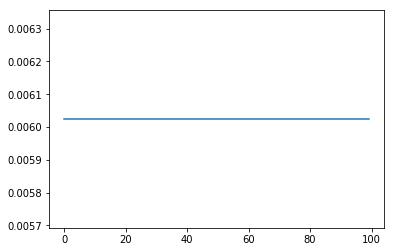

1 41
2 41
3 41
4 41
5 41
6 41
7 41
8 41
9 41
10 41
11 41
12 41
13 41
14 41
15 41
16 41
17 41
18 41
19 41
20 41
21 41
22 41
23 41
24 41
25 41
26 41
27 41
28 41
29 41
30 41
31 41
32 41
33 41
34 41
35 41
36 41
plt


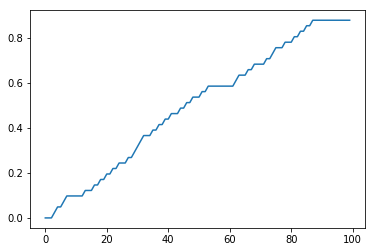

1 75
2 75
3 75
4 75
5 75
6 75
7 75
8 75
9 75
10 75
11 75
plt


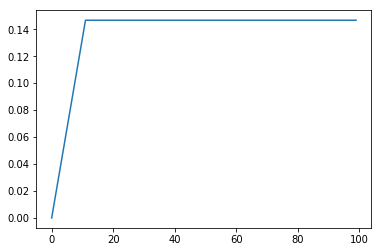

1 22
plt


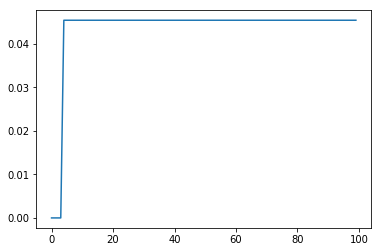

In [4]:
for i in range(1):
    print(i)
    path = '/Users/suvodeepmajumder/Documents/AI4SE/bellwether_comminity/data/1385/converted'
    data_source1 = '/Users/suvodeepmajumder/Documents/AI4SE/bellwether_comminity/src/data/1385/exp2/2/fold_' + str(i)
    data_source2 = '/Users/suvodeepmajumder/Documents/AI4SE/bellwether_comminity/src/data/1385/exp2/0/cdom/fold_' + str(i)
    if platform.system() == 'Darwin' or platform.system() == 'Linux':
        _dir = path + '/'
    else:
        _dir = path + '\\'

    projects = [f for f in listdir(_dir) if isfile(join(_dir, f))]
    #print(projects)
    find_bellwether(data_source1,data_source2,projects,path,i)
    